### Answer 2

In [25]:
# Importing the necessary packages
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from scipy.stats import multivariate_normal
from sklearn.model_selection import KFold
from mpl_toolkits.mplot3d import Axes3D
import keras

Using TensorFlow backend.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

In [3]:
mean1 = [-18, -8]
mean2 = [0, 0]
mean3 = [18, 8]
cov_eig_val = np.array([[3.2**2, 0], [0, 0.6**2]])
cov_eig_vec1 = np.array([[1, -1], [1, 1]])/math.sqrt(2)
cov_eig_vec2 = np.array([[1, 0], [0, 1]])
cov_eig_vec3 = np.array([[1, -1], [1, 1]])/math.sqrt(2)
cov1 = np.matmul(cov_eig_vec1, np.matmul(cov_eig_val, cov_eig_vec1.T))
cov2 = np.matmul(cov_eig_vec2, np.matmul(cov_eig_val, cov_eig_vec2.T))
cov3 = np.matmul(cov_eig_vec3, np.matmul(cov_eig_val, cov_eig_vec3.T))
p1 = 0.33
p2 = 0.34
p3 = 0.33

In [4]:
data_dist = np.random.uniform(0, 1, 1000)
data1 = np.matmul(np.matmul(cov_eig_vec1,(cov_eig_val**0.5)),np.random.randn(2, len(data_dist[np.where(data_dist<=p1)]))) + np.array(mean1)[:, None]
data2 = np.matmul(np.matmul(cov_eig_vec2,(cov_eig_val**0.5)),np.random.randn(2, len([x for x in data_dist if x<=(p1+p2) and x>p1]))) + np.array(mean2)[:, None]
data3 = np.matmul(np.matmul(cov_eig_vec3,(cov_eig_val**0.5)),np.random.randn(2, len(data_dist[np.where(data_dist>(p1+p2))]))) + np.array(mean3)[:, None]

In [5]:
data1 = data1.T
data2 = data2.T
data3 = data3.T
train_dataset = np.vstack([data1, data2, data3])

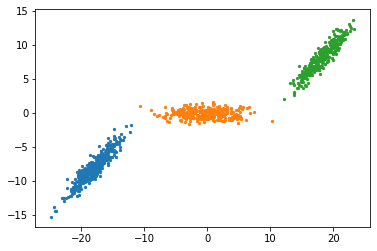

In [6]:
plt.scatter(data1[:, 0], data1[:, 1], label='Class 1', s=5)
plt.scatter(data2[:, 0], data2[:, 1], label='Class 2', s=5)
plt.scatter(data3[:, 0], data3[:, 1], label='Class 3', s=5)

### Test dataset

In [7]:
test_data_dist = np.random.uniform(0, 1, 10000)
test_data1 = np.matmul(np.matmul(cov_eig_vec1,(cov_eig_val**0.5)),np.random.randn(2, len(test_data_dist[np.where(test_data_dist<=p1)]))) + np.array(mean1)[:, None]
test_data2 = np.matmul(np.matmul(cov_eig_vec2,(cov_eig_val**0.5)),np.random.randn(2, len([x for x in test_data_dist if x<=(p1+p2) and x>p1]))) + np.array(mean2)[:, None]
test_data3 = np.matmul(np.matmul(cov_eig_vec3,(cov_eig_val**0.5)),np.random.randn(2, len(test_data_dist[np.where(test_data_dist>(p1+p2))]))) + np.array(mean3)[:, None]

In [8]:
test_data1 = test_data1.T
test_data2 = test_data2.T
test_data3 = test_data3.T
test_dataset = np.vstack([test_data1, test_data2, test_data3])

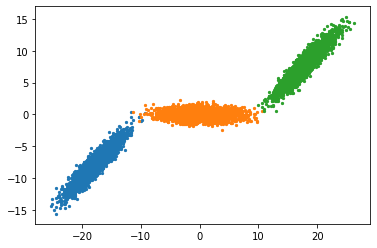

In [9]:
plt.scatter(test_data1[:, 0], test_data1[:, 1], label='Class 1', s=5)
plt.scatter(test_data2[:, 0], test_data2[:, 1], label='Class 2', s=5)
plt.scatter(test_data3[:, 0], test_data3[:, 1], label='Class 3', s=5)

### Neural Network

In [16]:
activations = ['sigmoid', 'softplus']
hidd_layer_param_list = [4, 9, 11, 14]

In [17]:
print(train_dataset.shape)

(1000, 2)


In [18]:
X=train_dataset[:,0]
Y=train_dataset[:,1]

In [19]:
print(X.shape)
print(Y.shape)

(1000,)
(1000,)


In [20]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

In [21]:
def create_model(nodes,activation):
    model = Sequential()
    model.add(Dense(nodes, input_dim=1,activation=activation))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

In [26]:
model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model,nodes='nodes',activation='activation')

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {'nodes':[4,6,10,14,18,22,26,30,34,38],'activation':['softplus','sigmoid']}
model_GridSearchCV = GridSearchCV(model, parameters, cv=10,scoring='neg_mean_squared_error')
model_GridSearchCV

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x1a311787b8>,
             iid='warn', n_jobs=None,
             param_grid={'activation': ['softplus', 'sigmoid'],
                         'nodes': [4, 6, 10, 14, 18, 22, 26, 30, 34, 38]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
#es = EarlyStopping(monitor='mse', mode='min', verbose=1, patience=10,min_delta=.1)
#grid_result=model_GridSearchCV.fit(X, Y, epochs=1000, batch_size=len(X), verbose=1,callbacks=[es])
grid_result=model_GridSearchCV.fit(X, Y, epochs=1000, batch_size=len(X), verbose=1)

Train on 900 samples
Epoch 1/1000
900/900 [==============================] - 0s 400us/sample - loss: 58.8024 - mse: 58.8024
Epoch 2/1000
900/900 [==============================] - 0s 2us/sample - loss: 58.4030 - mse: 58.4030
Epoch 3/1000
900/900 [==============================] - 0s 2us/sample - loss: 58.0063 - mse: 58.0063
Epoch 4/1000
900/900 [==============================] - 0s 2us/sample - loss: 57.6124 - mse: 57.6124
Epoch 5/1000
900/900 [==============================] - 0s 2us/sample - loss: 57.2213 - mse: 57.2213
Epoch 6/1000
900/900 [==============================] - 0s 2us/sample - loss: 56.8329 - mse: 56.8329
Epoch 7/1000
900/900 [==============================] - 0s 2us/sample - loss: 56.4474 - mse: 56.4474
Epoch 8/1000
900/900 [==============================] - 0s 2us/sample - loss: 56.0648 - mse: 56.0648
Epoch 9/1000
900/900 [==============================] - 0s 2us/sample - loss: 55.6850 - mse: 55.6850
Epoch 10/1000
900/900 [==============================] - 0s 2us/samp

Epoch 82/1000
900/900 [==============================] - 0s 3us/sample - loss: 35.1811 - mse: 35.1811
Epoch 83/1000
900/900 [==============================] - 0s 2us/sample - loss: 34.9774 - mse: 34.9774
Epoch 84/1000
900/900 [==============================] - 0s 3us/sample - loss: 34.7753 - mse: 34.7753
Epoch 85/1000
900/900 [==============================] - 0s 4us/sample - loss: 34.5746 - mse: 34.5746
Epoch 86/1000
900/900 [==============================] - 0s 3us/sample - loss: 34.3753 - mse: 34.3753
Epoch 87/1000
900/900 [==============================] - 0s 4us/sample - loss: 34.1775 - mse: 34.1775
Epoch 88/1000
900/900 [==============================] - 0s 3us/sample - loss: 33.9810 - mse: 33.9810
Epoch 89/1000
900/900 [==============================] - 0s 3us/sample - loss: 33.7859 - mse: 33.7859
Epoch 90/1000
900/900 [==============================] - 0s 3us/sample - loss: 33.5921 - mse: 33.5921
Epoch 91/1000
900/900 [==============================] - 0s 4us/sample - loss: 33.

Epoch 162/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.2832 - mse: 22.2832
Epoch 163/1000
900/900 [==============================] - 0s 3us/sample - loss: 22.1537 - mse: 22.1537
Epoch 164/1000
900/900 [==============================] - 0s 3us/sample - loss: 22.0247 - mse: 22.0247
Epoch 165/1000
900/900 [==============================] - 0s 3us/sample - loss: 21.8963 - mse: 21.8963
Epoch 166/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.7684 - mse: 21.7684
Epoch 167/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.6412 - mse: 21.6412
Epoch 168/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.5145 - mse: 21.5145
Epoch 169/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.3883 - mse: 21.3883
Epoch 170/1000
900/900 [==============================] - 0s 3us/sample - loss: 21.2627 - mse: 21.2627
Epoch 171/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 242/1000
900/900 [==============================] - 0s 3us/sample - loss: 13.5031 - mse: 13.5031
Epoch 243/1000
900/900 [==============================] - 0s 3us/sample - loss: 13.4118 - mse: 13.4118
Epoch 244/1000
900/900 [==============================] - 0s 4us/sample - loss: 13.3209 - mse: 13.3209
Epoch 245/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.2305 - mse: 13.2305
Epoch 246/1000
900/900 [==============================] - 0s 3us/sample - loss: 13.1404 - mse: 13.1404
Epoch 247/1000
900/900 [==============================] - 0s 3us/sample - loss: 13.0509 - mse: 13.0509
Epoch 248/1000
900/900 [==============================] - 0s 3us/sample - loss: 12.9617 - mse: 12.9617
Epoch 249/1000
900/900 [==============================] - 0s 3us/sample - loss: 12.8730 - mse: 12.8730
Epoch 250/1000
900/900 [==============================] - 0s 3us/sample - loss: 12.7847 - mse: 12.7847
Epoch 251/1000
900/900 [==============================] - 0s 4us/sample -

Epoch 323/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.4890 - mse: 7.4890
Epoch 324/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.4320 - mse: 7.4320
Epoch 325/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.3753 - mse: 7.3753
Epoch 326/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.3191 - mse: 7.3191
Epoch 327/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.2633 - mse: 7.2633
Epoch 328/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.2079 - mse: 7.2079
Epoch 329/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.1529 - mse: 7.1529
Epoch 330/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.0983 - mse: 7.0983
Epoch 331/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.0440 - mse: 7.0440
Epoch 332/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.9902 - ms

900/900 [==============================] - 0s 3us/sample - loss: 4.1004 - mse: 4.1004
Epoch 405/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.0726 - mse: 4.0726
Epoch 406/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.0452 - mse: 4.0452
Epoch 407/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.0181 - mse: 4.0181
Epoch 408/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.9912 - mse: 3.9912
Epoch 409/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.9647 - mse: 3.9647
Epoch 410/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.9384 - mse: 3.9384
Epoch 411/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.9124 - mse: 3.9124
Epoch 412/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.8868 - mse: 3.8868
Epoch 413/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.8614 - mse: 3.8614
Epoch

Epoch 486/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6496 - mse: 2.6496
Epoch 487/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6400 - mse: 2.6400
Epoch 488/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6306 - mse: 2.6306
Epoch 489/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6213 - mse: 2.6213
Epoch 490/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6122 - mse: 2.6122
Epoch 491/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6032 - mse: 2.6032
Epoch 492/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5943 - mse: 2.5943
Epoch 493/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5856 - mse: 2.5856
Epoch 494/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5770 - mse: 2.5770
Epoch 495/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5685 - ms

Epoch 568/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2142 - mse: 2.2142
Epoch 569/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2119 - mse: 2.2119
Epoch 570/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2096 - mse: 2.2096
Epoch 571/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2073 - mse: 2.2073
Epoch 572/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2051 - mse: 2.2051
Epoch 573/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.2029 - mse: 2.2029
Epoch 574/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2008 - mse: 2.2008
Epoch 575/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1987 - mse: 2.1987
Epoch 576/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1967 - mse: 2.1967
Epoch 577/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1947 - ms

900/900 [==============================] - 0s 4us/sample - loss: 2.1184 - mse: 2.1184
Epoch 650/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1180 - mse: 2.1180
Epoch 651/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1175 - mse: 2.1175
Epoch 652/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1171 - mse: 2.1171
Epoch 653/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1166 - mse: 2.1166
Epoch 654/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1162 - mse: 2.1162
Epoch 655/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1157 - mse: 2.1157
Epoch 656/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1153 - mse: 2.1153
Epoch 657/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1149 - mse: 2.1149
Epoch 658/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1145 - mse: 2.1145
Epoch

Epoch 731/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0976 - mse: 2.0976
Epoch 732/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0975 - mse: 2.0975
Epoch 733/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0973 - mse: 2.0973
Epoch 734/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0972 - mse: 2.0972
Epoch 735/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0971 - mse: 2.0971
Epoch 736/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0969 - mse: 2.0969
Epoch 737/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0968 - mse: 2.0968
Epoch 738/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0967 - mse: 2.0967
Epoch 739/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0966 - mse: 2.0966
Epoch 740/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0964 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0888 - mse: 2.0888
Epoch 813/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0887 - mse: 2.0887
Epoch 814/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0886 - mse: 2.0886
Epoch 815/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0885 - mse: 2.0885
Epoch 816/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0884 - mse: 2.0884
Epoch 817/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0883 - mse: 2.0883
Epoch 818/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0882 - mse: 2.0882
Epoch 819/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0881 - mse: 2.0881
Epoch 820/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0880 - mse: 2.0880
Epoch 821/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0879 - mse: 2.0879
Epoch

Epoch 894/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0809 - mse: 2.0809
Epoch 895/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0808 - mse: 2.0808
Epoch 896/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0807 - mse: 2.0807
Epoch 897/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0806 - mse: 2.0806
Epoch 898/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0805 - mse: 2.0805
Epoch 899/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0804 - mse: 2.0804
Epoch 900/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0803 - mse: 2.0803
Epoch 901/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0802 - mse: 2.0802
Epoch 902/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0801 - mse: 2.0801
Epoch 903/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0800 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0728 - mse: 2.0728
Epoch 976/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0727 - mse: 2.0727
Epoch 977/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0726 - mse: 2.0726
Epoch 978/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0725 - mse: 2.0725
Epoch 979/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0724 - mse: 2.0724
Epoch 980/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0723 - mse: 2.0723
Epoch 981/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0722 - mse: 2.0722
Epoch 982/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0720 - mse: 2.0720
Epoch 983/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0719 - mse: 2.0719
Epoch 984/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0718 - mse: 2.0718
Epoch

Epoch 55/1000
900/900 [==============================] - 0s 2us/sample - loss: 129.5453 - mse: 129.5453
Epoch 56/1000
900/900 [==============================] - 0s 2us/sample - loss: 129.0594 - mse: 129.0594
Epoch 57/1000
900/900 [==============================] - 0s 2us/sample - loss: 128.5764 - mse: 128.5764
Epoch 58/1000
900/900 [==============================] - 0s 2us/sample - loss: 128.0964 - mse: 128.0964
Epoch 59/1000
900/900 [==============================] - 0s 3us/sample - loss: 127.6192 - mse: 127.6192
Epoch 60/1000
900/900 [==============================] - 0s 2us/sample - loss: 127.1449 - mse: 127.1449
Epoch 61/1000
900/900 [==============================] - 0s 2us/sample - loss: 126.6734 - mse: 126.6734
Epoch 62/1000
900/900 [==============================] - 0s 2us/sample - loss: 126.2047 - mse: 126.2047
Epoch 63/1000
900/900 [==============================] - 0s 2us/sample - loss: 125.7387 - mse: 125.7387
Epoch 64/1000
900/900 [==============================] - 0s 2us/

Epoch 134/1000
900/900 [==============================] - 0s 2us/sample - loss: 98.3308 - mse: 98.3308
Epoch 135/1000
900/900 [==============================] - 0s 2us/sample - loss: 98.0072 - mse: 98.0072
Epoch 136/1000
900/900 [==============================] - 0s 2us/sample - loss: 97.6849 - mse: 97.6849
Epoch 137/1000
900/900 [==============================] - 0s 3us/sample - loss: 97.3639 - mse: 97.3639
Epoch 138/1000
900/900 [==============================] - 0s 3us/sample - loss: 97.0441 - mse: 97.0441
Epoch 139/1000
900/900 [==============================] - 0s 2us/sample - loss: 96.7257 - mse: 96.7257
Epoch 140/1000
900/900 [==============================] - 0s 2us/sample - loss: 96.4084 - mse: 96.4084
Epoch 141/1000
900/900 [==============================] - 0s 2us/sample - loss: 96.0924 - mse: 96.0924
Epoch 142/1000
900/900 [==============================] - 0s 2us/sample - loss: 95.7775 - mse: 95.7775
Epoch 143/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 214/1000
900/900 [==============================] - 0s 2us/sample - loss: 75.1791 - mse: 75.1791
Epoch 215/1000
900/900 [==============================] - 0s 2us/sample - loss: 74.9053 - mse: 74.9053
Epoch 216/1000
900/900 [==============================] - 0s 2us/sample - loss: 74.6315 - mse: 74.6315
Epoch 217/1000
900/900 [==============================] - 0s 2us/sample - loss: 74.3576 - mse: 74.3576
Epoch 218/1000
900/900 [==============================] - 0s 2us/sample - loss: 74.0835 - mse: 74.0835
Epoch 219/1000
900/900 [==============================] - 0s 2us/sample - loss: 73.8092 - mse: 73.8092
Epoch 220/1000
900/900 [==============================] - 0s 2us/sample - loss: 73.5348 - mse: 73.5348
Epoch 221/1000
900/900 [==============================] - 0s 3us/sample - loss: 73.2602 - mse: 73.2602
Epoch 222/1000
900/900 [==============================] - 0s 2us/sample - loss: 72.9853 - mse: 72.9853
Epoch 223/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 294/1000
900/900 [==============================] - 0s 2us/sample - loss: 52.3526 - mse: 52.3526
Epoch 295/1000
900/900 [==============================] - 0s 3us/sample - loss: 52.0595 - mse: 52.0595
Epoch 296/1000
900/900 [==============================] - 0s 2us/sample - loss: 51.7666 - mse: 51.7666
Epoch 297/1000
900/900 [==============================] - 0s 4us/sample - loss: 51.4738 - mse: 51.4738
Epoch 298/1000
900/900 [==============================] - 0s 3us/sample - loss: 51.1812 - mse: 51.1812
Epoch 299/1000
900/900 [==============================] - 0s 4us/sample - loss: 50.8888 - mse: 50.8888
Epoch 300/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.5966 - mse: 50.5966
Epoch 301/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.3047 - mse: 50.3047
Epoch 302/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.0130 - mse: 50.0130
Epoch 303/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 374/1000
900/900 [==============================] - 0s 3us/sample - loss: 30.6852 - mse: 30.6852
Epoch 375/1000
900/900 [==============================] - 0s 3us/sample - loss: 30.4516 - mse: 30.4516
Epoch 376/1000
900/900 [==============================] - 0s 3us/sample - loss: 30.2192 - mse: 30.2192
Epoch 377/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.9880 - mse: 29.9880
Epoch 378/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.7580 - mse: 29.7580
Epoch 379/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.5293 - mse: 29.5293
Epoch 380/1000
900/900 [==============================] - 0s 3us/sample - loss: 29.3017 - mse: 29.3017
Epoch 381/1000
900/900 [==============================] - 0s 3us/sample - loss: 29.0754 - mse: 29.0754
Epoch 382/1000
900/900 [==============================] - 0s 3us/sample - loss: 28.8502 - mse: 28.8502
Epoch 383/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 454/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.9779 - mse: 15.9779
Epoch 455/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.8443 - mse: 15.8443
Epoch 456/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.7119 - mse: 15.7119
Epoch 457/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.5806 - mse: 15.5806
Epoch 458/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.4504 - mse: 15.4504
Epoch 459/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.3213 - mse: 15.3213
Epoch 460/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.1934 - mse: 15.1934
Epoch 461/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.0666 - mse: 15.0666
Epoch 462/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.9409 - mse: 14.9409
Epoch 463/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 534/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3501 - mse: 8.3501
Epoch 535/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.2865 - mse: 8.2865
Epoch 536/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.2235 - mse: 8.2235
Epoch 537/1000
900/900 [==============================] - 0s 4us/sample - loss: 8.1610 - mse: 8.1610
Epoch 538/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.0992 - mse: 8.0992
Epoch 539/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.0379 - mse: 8.0379
Epoch 540/1000
900/900 [==============================] - 0s 5us/sample - loss: 7.9773 - mse: 7.9773
Epoch 541/1000
900/900 [==============================] - 0s 4us/sample - loss: 7.9171 - mse: 7.9171
Epoch 542/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.8576 - mse: 7.8576
Epoch 543/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.7987 - ms

900/900 [==============================] - 0s 2us/sample - loss: 4.7396 - mse: 4.7396
Epoch 616/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.7102 - mse: 4.7102
Epoch 617/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.6812 - mse: 4.6812
Epoch 618/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.6524 - mse: 4.6524
Epoch 619/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.6240 - mse: 4.6240
Epoch 620/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.5958 - mse: 4.5958
Epoch 621/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.5679 - mse: 4.5679
Epoch 622/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.5402 - mse: 4.5402
Epoch 623/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.5129 - mse: 4.5129
Epoch 624/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.4858 - mse: 4.4858
Epoch

Epoch 697/1000
900/900 [==============================] - 0s 5us/sample - loss: 3.1107 - mse: 3.1107
Epoch 698/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0986 - mse: 3.0986
Epoch 699/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0866 - mse: 3.0866
Epoch 700/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0747 - mse: 3.0747
Epoch 701/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0630 - mse: 3.0630
Epoch 702/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0514 - mse: 3.0514
Epoch 703/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0400 - mse: 3.0400
Epoch 704/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.0287 - mse: 3.0287
Epoch 705/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.0175 - mse: 3.0175
Epoch 706/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.0065 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.4899 - mse: 2.4899
Epoch 779/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4857 - mse: 2.4857
Epoch 780/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4816 - mse: 2.4816
Epoch 781/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4775 - mse: 2.4775
Epoch 782/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4734 - mse: 2.4734
Epoch 783/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4694 - mse: 2.4694
Epoch 784/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4655 - mse: 2.4655
Epoch 785/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4616 - mse: 2.4616
Epoch 786/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4578 - mse: 2.4578
Epoch 787/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4540 - mse: 2.4540
Epoch

Epoch 860/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2867 - mse: 2.2867
Epoch 861/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2854 - mse: 2.2854
Epoch 862/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2842 - mse: 2.2842
Epoch 863/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.2830 - mse: 2.2830
Epoch 864/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2818 - mse: 2.2818
Epoch 865/1000
900/900 [==============================] - 0s 5us/sample - loss: 2.2806 - mse: 2.2806
Epoch 866/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2794 - mse: 2.2794
Epoch 867/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2783 - mse: 2.2783
Epoch 868/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2772 - mse: 2.2772
Epoch 869/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2760 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.2259 - mse: 2.2259
Epoch 942/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2255 - mse: 2.2255
Epoch 943/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2251 - mse: 2.2251
Epoch 944/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2247 - mse: 2.2247
Epoch 945/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2243 - mse: 2.2243
Epoch 946/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2239 - mse: 2.2239
Epoch 947/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2235 - mse: 2.2235
Epoch 948/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2231 - mse: 2.2231
Epoch 949/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2227 - mse: 2.2227
Epoch 950/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2223 - mse: 2.2223
Epoch

Epoch 22/1000
900/900 [==============================] - 0s 2us/sample - loss: 145.2915 - mse: 145.2915
Epoch 23/1000
900/900 [==============================] - 0s 2us/sample - loss: 144.6071 - mse: 144.6071
Epoch 24/1000
900/900 [==============================] - 0s 2us/sample - loss: 143.9259 - mse: 143.9259
Epoch 25/1000
900/900 [==============================] - 0s 2us/sample - loss: 143.2478 - mse: 143.2478
Epoch 26/1000
900/900 [==============================] - 0s 2us/sample - loss: 142.5729 - mse: 142.5729
Epoch 27/1000
900/900 [==============================] - 0s 2us/sample - loss: 141.9012 - mse: 141.9012
Epoch 28/1000
900/900 [==============================] - 0s 2us/sample - loss: 141.2326 - mse: 141.2326
Epoch 29/1000
900/900 [==============================] - 0s 2us/sample - loss: 140.5672 - mse: 140.5672
Epoch 30/1000
900/900 [==============================] - 0s 2us/sample - loss: 139.9049 - mse: 139.9049
Epoch 31/1000
900/900 [==============================] - 0s 2us/

Epoch 101/1000
900/900 [==============================] - 0s 3us/sample - loss: 100.2992 - mse: 100.2992
Epoch 102/1000
900/900 [==============================] - 0s 4us/sample - loss: 99.8331 - mse: 99.8331
Epoch 103/1000
900/900 [==============================] - 0s 4us/sample - loss: 99.3693 - mse: 99.3693
Epoch 104/1000
900/900 [==============================] - 0s 4us/sample - loss: 98.9076 - mse: 98.9076
Epoch 105/1000
900/900 [==============================] - 0s 3us/sample - loss: 98.4482 - mse: 98.4482
Epoch 106/1000
900/900 [==============================] - 0s 5us/sample - loss: 97.9909 - mse: 97.9909
Epoch 107/1000
900/900 [==============================] - 0s 4us/sample - loss: 97.5357 - mse: 97.5357
Epoch 108/1000
900/900 [==============================] - 0s 3us/sample - loss: 97.0827 - mse: 97.0827
Epoch 109/1000
900/900 [==============================] - 0s 2us/sample - loss: 96.6319 - mse: 96.6319
Epoch 110/1000
900/900 [==============================] - 0s 3us/sample

Epoch 181/1000
900/900 [==============================] - 0s 2us/sample - loss: 69.1397 - mse: 69.1397
Epoch 182/1000
900/900 [==============================] - 0s 2us/sample - loss: 68.8193 - mse: 68.8193
Epoch 183/1000
900/900 [==============================] - 0s 3us/sample - loss: 68.5003 - mse: 68.5003
Epoch 184/1000
900/900 [==============================] - 0s 2us/sample - loss: 68.1829 - mse: 68.1829
Epoch 185/1000
900/900 [==============================] - 0s 4us/sample - loss: 67.8670 - mse: 67.8670
Epoch 186/1000
900/900 [==============================] - 0s 2us/sample - loss: 67.5525 - mse: 67.5525
Epoch 187/1000
900/900 [==============================] - 0s 2us/sample - loss: 67.2396 - mse: 67.2396
Epoch 188/1000
900/900 [==============================] - 0s 2us/sample - loss: 66.9281 - mse: 66.9281
Epoch 189/1000
900/900 [==============================] - 0s 2us/sample - loss: 66.6181 - mse: 66.6181
Epoch 190/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 261/1000
900/900 [==============================] - 0s 2us/sample - loss: 47.8341 - mse: 47.8341
Epoch 262/1000
900/900 [==============================] - 0s 2us/sample - loss: 47.6183 - mse: 47.6183
Epoch 263/1000
900/900 [==============================] - 0s 2us/sample - loss: 47.4037 - mse: 47.4037
Epoch 264/1000
900/900 [==============================] - 0s 2us/sample - loss: 47.1902 - mse: 47.1902
Epoch 265/1000
900/900 [==============================] - 0s 2us/sample - loss: 46.9778 - mse: 46.9778
Epoch 266/1000
900/900 [==============================] - 0s 2us/sample - loss: 46.7666 - mse: 46.7666
Epoch 267/1000
900/900 [==============================] - 0s 3us/sample - loss: 46.5564 - mse: 46.5564
Epoch 268/1000
900/900 [==============================] - 0s 2us/sample - loss: 46.3474 - mse: 46.3474
Epoch 269/1000
900/900 [==============================] - 0s 2us/sample - loss: 46.1395 - mse: 46.1395
Epoch 270/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 341/1000
900/900 [==============================] - 0s 3us/sample - loss: 33.8806 - mse: 33.8806
Epoch 342/1000
900/900 [==============================] - 0s 4us/sample - loss: 33.7449 - mse: 33.7449
Epoch 343/1000
900/900 [==============================] - 0s 3us/sample - loss: 33.6101 - mse: 33.6101
Epoch 344/1000
900/900 [==============================] - 0s 2us/sample - loss: 33.4761 - mse: 33.4761
Epoch 345/1000
900/900 [==============================] - 0s 2us/sample - loss: 33.3430 - mse: 33.3430
Epoch 346/1000
900/900 [==============================] - 0s 2us/sample - loss: 33.2107 - mse: 33.2107
Epoch 347/1000
900/900 [==============================] - 0s 2us/sample - loss: 33.0792 - mse: 33.0792
Epoch 348/1000
900/900 [==============================] - 0s 2us/sample - loss: 32.9486 - mse: 32.9486
Epoch 349/1000
900/900 [==============================] - 0s 2us/sample - loss: 32.8189 - mse: 32.8189
Epoch 350/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 421/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.4471 - mse: 25.4471
Epoch 422/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3687 - mse: 25.3687
Epoch 423/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.2909 - mse: 25.2909
Epoch 424/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.2136 - mse: 25.2136
Epoch 425/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.1369 - mse: 25.1369
Epoch 426/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.0608 - mse: 25.0608
Epoch 427/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.9851 - mse: 24.9851
Epoch 428/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.9101 - mse: 24.9101
Epoch 429/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.8355 - mse: 24.8355
Epoch 430/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 501/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.6548 - mse: 20.6548
Epoch 502/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.6101 - mse: 20.6101
Epoch 503/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.5657 - mse: 20.5657
Epoch 504/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.5216 - mse: 20.5216
Epoch 505/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.4778 - mse: 20.4778
Epoch 506/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.4342 - mse: 20.4342
Epoch 507/1000
900/900 [==============================] - 0s 3us/sample - loss: 20.3909 - mse: 20.3909
Epoch 508/1000
900/900 [==============================] - 0s 3us/sample - loss: 20.3479 - mse: 20.3479
Epoch 509/1000
900/900 [==============================] - 0s 3us/sample - loss: 20.3052 - mse: 20.3052
Epoch 510/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 581/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.7832 - mse: 17.7832
Epoch 582/1000
900/900 [==============================] - 0s 4us/sample - loss: 17.7540 - mse: 17.7540
Epoch 583/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.7249 - mse: 17.7249
Epoch 584/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.6959 - mse: 17.6959
Epoch 585/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.6670 - mse: 17.6670
Epoch 586/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.6383 - mse: 17.6383
Epoch 587/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.6096 - mse: 17.6096
Epoch 588/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.5811 - mse: 17.5811
Epoch 589/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.5526 - mse: 17.5526
Epoch 590/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 661/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.7092 - mse: 15.7092
Epoch 662/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.6856 - mse: 15.6856
Epoch 663/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.6620 - mse: 15.6620
Epoch 664/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.6385 - mse: 15.6385
Epoch 665/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.6150 - mse: 15.6150
Epoch 666/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.5915 - mse: 15.5915
Epoch 667/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.5680 - mse: 15.5680
Epoch 668/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.5446 - mse: 15.5446
Epoch 669/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.5212 - mse: 15.5212
Epoch 670/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 741/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.8902 - mse: 13.8902
Epoch 742/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.8679 - mse: 13.8679
Epoch 743/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.8457 - mse: 13.8457
Epoch 744/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.8234 - mse: 13.8234
Epoch 745/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.8011 - mse: 13.8011
Epoch 746/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.7789 - mse: 13.7789
Epoch 747/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.7566 - mse: 13.7566
Epoch 748/1000
900/900 [==============================] - 0s 3us/sample - loss: 13.7344 - mse: 13.7344
Epoch 749/1000
900/900 [==============================] - 0s 3us/sample - loss: 13.7121 - mse: 13.7121
Epoch 750/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 821/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.1014 - mse: 12.1014
Epoch 822/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.0788 - mse: 12.0788
Epoch 823/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.0562 - mse: 12.0562
Epoch 824/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.0335 - mse: 12.0335
Epoch 825/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.0109 - mse: 12.0109
Epoch 826/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.9883 - mse: 11.9883
Epoch 827/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.9656 - mse: 11.9656
Epoch 828/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.9430 - mse: 11.9430
Epoch 829/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.9203 - mse: 11.9203
Epoch 830/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 901/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.2681 - mse: 10.2681
Epoch 902/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.2449 - mse: 10.2449
Epoch 903/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.2217 - mse: 10.2217
Epoch 904/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.1986 - mse: 10.1986
Epoch 905/1000
900/900 [==============================] - 0s 3us/sample - loss: 10.1754 - mse: 10.1754
Epoch 906/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.1522 - mse: 10.1522
Epoch 907/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.1290 - mse: 10.1290
Epoch 908/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.1058 - mse: 10.1058
Epoch 909/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.0826 - mse: 10.0826
Epoch 910/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 982/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3954 - mse: 8.3954
Epoch 983/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3726 - mse: 8.3726
Epoch 984/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3498 - mse: 8.3498
Epoch 985/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3271 - mse: 8.3271
Epoch 986/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3043 - mse: 8.3043
Epoch 987/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.2816 - mse: 8.2816
Epoch 988/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.2588 - mse: 8.2588
Epoch 989/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.2361 - mse: 8.2361
Epoch 990/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.2134 - mse: 8.2134
Epoch 991/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.1908 - ms

Epoch 63/1000
900/900 [==============================] - 0s 2us/sample - loss: 66.7507 - mse: 66.7507
Epoch 64/1000
900/900 [==============================] - 0s 2us/sample - loss: 66.5239 - mse: 66.5239
Epoch 65/1000
900/900 [==============================] - 0s 2us/sample - loss: 66.2981 - mse: 66.2981
Epoch 66/1000
900/900 [==============================] - 0s 2us/sample - loss: 66.0734 - mse: 66.0734
Epoch 67/1000
900/900 [==============================] - 0s 2us/sample - loss: 65.8498 - mse: 65.8498
Epoch 68/1000
900/900 [==============================] - 0s 2us/sample - loss: 65.6272 - mse: 65.6272
Epoch 69/1000
900/900 [==============================] - 0s 2us/sample - loss: 65.4056 - mse: 65.4056
Epoch 70/1000
900/900 [==============================] - 0s 2us/sample - loss: 65.1850 - mse: 65.1850
Epoch 71/1000
900/900 [==============================] - 0s 2us/sample - loss: 64.9655 - mse: 64.9655
Epoch 72/1000
900/900 [==============================] - 0s 2us/sample - loss: 64.

Epoch 143/1000
900/900 [==============================] - 0s 2us/sample - loss: 51.5663 - mse: 51.5663
Epoch 144/1000
900/900 [==============================] - 0s 2us/sample - loss: 51.4095 - mse: 51.4095
Epoch 145/1000
900/900 [==============================] - 0s 2us/sample - loss: 51.2534 - mse: 51.2534
Epoch 146/1000
900/900 [==============================] - 0s 2us/sample - loss: 51.0981 - mse: 51.0981
Epoch 147/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.9434 - mse: 50.9434
Epoch 148/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.7894 - mse: 50.7894
Epoch 149/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.6361 - mse: 50.6361
Epoch 150/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.4835 - mse: 50.4835
Epoch 151/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.3316 - mse: 50.3316
Epoch 152/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 223/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.9943 - mse: 40.9943
Epoch 224/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.8845 - mse: 40.8845
Epoch 225/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.7751 - mse: 40.7751
Epoch 226/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.6663 - mse: 40.6663
Epoch 227/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.5579 - mse: 40.5579
Epoch 228/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.4500 - mse: 40.4500
Epoch 229/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.3426 - mse: 40.3426
Epoch 230/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.2357 - mse: 40.2357
Epoch 231/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.1292 - mse: 40.1292
Epoch 232/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 303/1000
900/900 [==============================] - 0s 3us/sample - loss: 33.6090 - mse: 33.6090
Epoch 304/1000
900/900 [==============================] - 0s 3us/sample - loss: 33.5331 - mse: 33.5331
Epoch 305/1000
900/900 [==============================] - 0s 3us/sample - loss: 33.4575 - mse: 33.4575
Epoch 306/1000
900/900 [==============================] - 0s 3us/sample - loss: 33.3823 - mse: 33.3823
Epoch 307/1000
900/900 [==============================] - 0s 3us/sample - loss: 33.3075 - mse: 33.3075
Epoch 308/1000
900/900 [==============================] - 0s 3us/sample - loss: 33.2331 - mse: 33.2331
Epoch 309/1000
900/900 [==============================] - 0s 3us/sample - loss: 33.1590 - mse: 33.1590
Epoch 310/1000
900/900 [==============================] - 0s 4us/sample - loss: 33.0852 - mse: 33.0852
Epoch 311/1000
900/900 [==============================] - 0s 4us/sample - loss: 33.0119 - mse: 33.0119
Epoch 312/1000
900/900 [==============================] - 0s 4us/sample -

Epoch 383/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.6216 - mse: 28.6216
Epoch 384/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.5721 - mse: 28.5721
Epoch 385/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.5229 - mse: 28.5229
Epoch 386/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.4740 - mse: 28.4740
Epoch 387/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.4254 - mse: 28.4254
Epoch 388/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.3770 - mse: 28.3770
Epoch 389/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.3290 - mse: 28.3290
Epoch 390/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.2812 - mse: 28.2812
Epoch 391/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.2337 - mse: 28.2337
Epoch 392/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 463/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.4830 - mse: 25.4830
Epoch 464/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.4530 - mse: 25.4530
Epoch 465/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.4232 - mse: 25.4232
Epoch 466/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3935 - mse: 25.3935
Epoch 467/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3641 - mse: 25.3641
Epoch 468/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3349 - mse: 25.3349
Epoch 469/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3058 - mse: 25.3058
Epoch 470/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.2769 - mse: 25.2769
Epoch 471/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.2483 - mse: 25.2483
Epoch 472/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 543/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.5978 - mse: 23.5978
Epoch 544/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.5797 - mse: 23.5797
Epoch 545/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.5617 - mse: 23.5617
Epoch 546/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.5437 - mse: 23.5437
Epoch 547/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.5259 - mse: 23.5259
Epoch 548/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.5082 - mse: 23.5082
Epoch 549/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.4906 - mse: 23.4906
Epoch 550/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.4731 - mse: 23.4731
Epoch 551/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.4557 - mse: 23.4557
Epoch 552/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 623/1000
900/900 [==============================] - 0s 3us/sample - loss: 22.4226 - mse: 22.4226
Epoch 624/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.4107 - mse: 22.4107
Epoch 625/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.3989 - mse: 22.3989
Epoch 626/1000
900/900 [==============================] - 0s 3us/sample - loss: 22.3871 - mse: 22.3871
Epoch 627/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.3754 - mse: 22.3754
Epoch 628/1000
900/900 [==============================] - 0s 3us/sample - loss: 22.3638 - mse: 22.3638
Epoch 629/1000
900/900 [==============================] - 0s 3us/sample - loss: 22.3522 - mse: 22.3522
Epoch 630/1000
900/900 [==============================] - 0s 3us/sample - loss: 22.3407 - mse: 22.3407
Epoch 631/1000
900/900 [==============================] - 0s 3us/sample - loss: 22.3292 - mse: 22.3292
Epoch 632/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 703/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.6132 - mse: 21.6132
Epoch 704/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.6045 - mse: 21.6045
Epoch 705/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.5958 - mse: 21.5958
Epoch 706/1000
900/900 [==============================] - 0s 3us/sample - loss: 21.5872 - mse: 21.5872
Epoch 707/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.5786 - mse: 21.5786
Epoch 708/1000
900/900 [==============================] - 0s 3us/sample - loss: 21.5700 - mse: 21.5700
Epoch 709/1000
900/900 [==============================] - 0s 3us/sample - loss: 21.5614 - mse: 21.5614
Epoch 710/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.5529 - mse: 21.5529
Epoch 711/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.5443 - mse: 21.5443
Epoch 712/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 783/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.9770 - mse: 20.9770
Epoch 784/1000
900/900 [==============================] - 0s 4us/sample - loss: 20.9694 - mse: 20.9694
Epoch 785/1000
900/900 [==============================] - 0s 3us/sample - loss: 20.9618 - mse: 20.9618
Epoch 786/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.9542 - mse: 20.9542
Epoch 787/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.9465 - mse: 20.9465
Epoch 788/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.9389 - mse: 20.9389
Epoch 789/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.9313 - mse: 20.9313
Epoch 790/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.9236 - mse: 20.9236
Epoch 791/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.9159 - mse: 20.9159
Epoch 792/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 863/1000
900/900 [==============================] - 0s 3us/sample - loss: 19.8869 - mse: 19.8869
Epoch 864/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.8375 - mse: 19.8375
Epoch 865/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.7842 - mse: 19.7842
Epoch 866/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.7264 - mse: 19.7264
Epoch 867/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.6638 - mse: 19.6638
Epoch 868/1000
900/900 [==============================] - 0s 3us/sample - loss: 19.5958 - mse: 19.5958
Epoch 869/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.5221 - mse: 19.5221
Epoch 870/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.4420 - mse: 19.4420
Epoch 871/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.3550 - mse: 19.3550
Epoch 872/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 944/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6241 - mse: 3.6241
Epoch 945/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.5578 - mse: 3.5578
Epoch 946/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.4956 - mse: 3.4956
Epoch 947/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.4372 - mse: 3.4372
Epoch 948/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.3826 - mse: 3.3826
Epoch 949/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.3314 - mse: 3.3314
Epoch 950/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.2836 - mse: 3.2836
Epoch 951/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.2390 - mse: 3.2390
Epoch 952/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.1974 - mse: 3.1974
Epoch 953/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.1586 - ms

Epoch 25/1000
900/900 [==============================] - 0s 2us/sample - loss: 238.8658 - mse: 238.8658
Epoch 26/1000
900/900 [==============================] - 0s 2us/sample - loss: 237.8778 - mse: 237.8778
Epoch 27/1000
900/900 [==============================] - 0s 2us/sample - loss: 236.8950 - mse: 236.8950
Epoch 28/1000
900/900 [==============================] - 0s 2us/sample - loss: 235.9176 - mse: 235.9176
Epoch 29/1000
900/900 [==============================] - 0s 2us/sample - loss: 234.9456 - mse: 234.9456
Epoch 30/1000
900/900 [==============================] - 0s 2us/sample - loss: 233.9788 - mse: 233.9788
Epoch 31/1000
900/900 [==============================] - 0s 2us/sample - loss: 233.0174 - mse: 233.0174
Epoch 32/1000
900/900 [==============================] - 0s 2us/sample - loss: 232.0612 - mse: 232.0612
Epoch 33/1000
900/900 [==============================] - 0s 2us/sample - loss: 231.1104 - mse: 231.1104
Epoch 34/1000
900/900 [==============================] - 0s 2us/

Epoch 104/1000
900/900 [==============================] - 0s 4us/sample - loss: 175.4040 - mse: 175.4040
Epoch 105/1000
900/900 [==============================] - 0s 4us/sample - loss: 174.7563 - mse: 174.7563
Epoch 106/1000
900/900 [==============================] - 0s 5us/sample - loss: 174.1116 - mse: 174.1116
Epoch 107/1000
900/900 [==============================] - 0s 3us/sample - loss: 173.4699 - mse: 173.4699
Epoch 108/1000
900/900 [==============================] - 0s 6us/sample - loss: 172.8311 - mse: 172.8311
Epoch 109/1000
900/900 [==============================] - 0s 4us/sample - loss: 172.1952 - mse: 172.1952
Epoch 110/1000
900/900 [==============================] - 0s 3us/sample - loss: 171.5623 - mse: 171.5623
Epoch 111/1000
900/900 [==============================] - 0s 2us/sample - loss: 170.9322 - mse: 170.9322
Epoch 112/1000
900/900 [==============================] - 0s 2us/sample - loss: 170.3049 - mse: 170.3049
Epoch 113/1000
900/900 [==============================]

900/900 [==============================] - 0s 2us/sample - loss: 132.2550 - mse: 132.2550
Epoch 183/1000
900/900 [==============================] - 0s 3us/sample - loss: 131.7825 - mse: 131.7825
Epoch 184/1000
900/900 [==============================] - 0s 3us/sample - loss: 131.3117 - mse: 131.3117
Epoch 185/1000
900/900 [==============================] - 0s 3us/sample - loss: 130.8426 - mse: 130.8426
Epoch 186/1000
900/900 [==============================] - 0s 3us/sample - loss: 130.3753 - mse: 130.3753
Epoch 187/1000
900/900 [==============================] - 0s 2us/sample - loss: 129.9097 - mse: 129.9097
Epoch 188/1000
900/900 [==============================] - 0s 3us/sample - loss: 129.4458 - mse: 129.4458
Epoch 189/1000
900/900 [==============================] - 0s 2us/sample - loss: 128.9835 - mse: 128.9835
Epoch 190/1000
900/900 [==============================] - 0s 2us/sample - loss: 128.5230 - mse: 128.5230
Epoch 191/1000
900/900 [==============================] - 0s 2us/sampl

Epoch 261/1000
900/900 [==============================] - 0s 2us/sample - loss: 99.7254 - mse: 99.7254
Epoch 262/1000
900/900 [==============================] - 0s 2us/sample - loss: 99.3699 - mse: 99.3699
Epoch 263/1000
900/900 [==============================] - 0s 2us/sample - loss: 99.0158 - mse: 99.0158
Epoch 264/1000
900/900 [==============================] - 0s 2us/sample - loss: 98.6629 - mse: 98.6629
Epoch 265/1000
900/900 [==============================] - 0s 2us/sample - loss: 98.3114 - mse: 98.3114
Epoch 266/1000
900/900 [==============================] - 0s 2us/sample - loss: 97.9611 - mse: 97.9611
Epoch 267/1000
900/900 [==============================] - 0s 2us/sample - loss: 97.6120 - mse: 97.6120
Epoch 268/1000
900/900 [==============================] - 0s 2us/sample - loss: 97.2642 - mse: 97.2642
Epoch 269/1000
900/900 [==============================] - 0s 2us/sample - loss: 96.9177 - mse: 96.9177
Epoch 270/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 341/1000
900/900 [==============================] - 0s 3us/sample - loss: 75.0565 - mse: 75.0565
Epoch 342/1000
900/900 [==============================] - 0s 2us/sample - loss: 74.7928 - mse: 74.7928
Epoch 343/1000
900/900 [==============================] - 0s 3us/sample - loss: 74.5302 - mse: 74.5302
Epoch 344/1000
900/900 [==============================] - 0s 2us/sample - loss: 74.2685 - mse: 74.2685
Epoch 345/1000
900/900 [==============================] - 0s 2us/sample - loss: 74.0078 - mse: 74.0078
Epoch 346/1000
900/900 [==============================] - 0s 3us/sample - loss: 73.7482 - mse: 73.7482
Epoch 347/1000
900/900 [==============================] - 0s 3us/sample - loss: 73.4895 - mse: 73.4895
Epoch 348/1000
900/900 [==============================] - 0s 2us/sample - loss: 73.2319 - mse: 73.2319
Epoch 349/1000
900/900 [==============================] - 0s 3us/sample - loss: 72.9752 - mse: 72.9752
Epoch 350/1000
900/900 [==============================] - 0s 4us/sample -

Epoch 421/1000
900/900 [==============================] - 0s 2us/sample - loss: 56.8865 - mse: 56.8865
Epoch 422/1000
900/900 [==============================] - 0s 2us/sample - loss: 56.6930 - mse: 56.6930
Epoch 423/1000
900/900 [==============================] - 0s 2us/sample - loss: 56.5003 - mse: 56.5003
Epoch 424/1000
900/900 [==============================] - 0s 2us/sample - loss: 56.3082 - mse: 56.3082
Epoch 425/1000
900/900 [==============================] - 0s 4us/sample - loss: 56.1169 - mse: 56.1169
Epoch 426/1000
900/900 [==============================] - 0s 3us/sample - loss: 55.9263 - mse: 55.9263
Epoch 427/1000
900/900 [==============================] - 0s 3us/sample - loss: 55.7363 - mse: 55.7363
Epoch 428/1000
900/900 [==============================] - 0s 3us/sample - loss: 55.5471 - mse: 55.5471
Epoch 429/1000
900/900 [==============================] - 0s 3us/sample - loss: 55.3587 - mse: 55.3587
Epoch 430/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 501/1000
900/900 [==============================] - 0s 3us/sample - loss: 43.3931 - mse: 43.3931
Epoch 502/1000
900/900 [==============================] - 0s 2us/sample - loss: 43.2459 - mse: 43.2459
Epoch 503/1000
900/900 [==============================] - 0s 2us/sample - loss: 43.0992 - mse: 43.0992
Epoch 504/1000
900/900 [==============================] - 0s 3us/sample - loss: 42.9529 - mse: 42.9529
Epoch 505/1000
900/900 [==============================] - 0s 2us/sample - loss: 42.8070 - mse: 42.8070
Epoch 506/1000
900/900 [==============================] - 0s 2us/sample - loss: 42.6616 - mse: 42.6616
Epoch 507/1000
900/900 [==============================] - 0s 3us/sample - loss: 42.5166 - mse: 42.5166
Epoch 508/1000
900/900 [==============================] - 0s 3us/sample - loss: 42.3720 - mse: 42.3720
Epoch 509/1000
900/900 [==============================] - 0s 4us/sample - loss: 42.2278 - mse: 42.2278
Epoch 510/1000
900/900 [==============================] - 0s 4us/sample -

Epoch 581/1000
900/900 [==============================] - 0s 4us/sample - loss: 32.7823 - mse: 32.7823
Epoch 582/1000
900/900 [==============================] - 0s 3us/sample - loss: 32.6622 - mse: 32.6622
Epoch 583/1000
900/900 [==============================] - 0s 2us/sample - loss: 32.5423 - mse: 32.5423
Epoch 584/1000
900/900 [==============================] - 0s 3us/sample - loss: 32.4227 - mse: 32.4227
Epoch 585/1000
900/900 [==============================] - 0s 4us/sample - loss: 32.3034 - mse: 32.3034
Epoch 586/1000
900/900 [==============================] - 0s 4us/sample - loss: 32.1844 - mse: 32.1844
Epoch 587/1000
900/900 [==============================] - 0s 2us/sample - loss: 32.0656 - mse: 32.0656
Epoch 588/1000
900/900 [==============================] - 0s 3us/sample - loss: 31.9470 - mse: 31.9470
Epoch 589/1000
900/900 [==============================] - 0s 3us/sample - loss: 31.8288 - mse: 31.8288
Epoch 590/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 661/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.9407 - mse: 23.9407
Epoch 662/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.8396 - mse: 23.8396
Epoch 663/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.7386 - mse: 23.7386
Epoch 664/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.6379 - mse: 23.6379
Epoch 665/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.5375 - mse: 23.5375
Epoch 666/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.4372 - mse: 23.4372
Epoch 667/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.3372 - mse: 23.3372
Epoch 668/1000
900/900 [==============================] - 0s 5us/sample - loss: 23.2374 - mse: 23.2374
Epoch 669/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.1378 - mse: 23.1378
Epoch 670/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 741/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.5911 - mse: 16.5911
Epoch 742/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.5091 - mse: 16.5091
Epoch 743/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.4274 - mse: 16.4274
Epoch 744/1000
900/900 [==============================] - 0s 3us/sample - loss: 16.3460 - mse: 16.3460
Epoch 745/1000
900/900 [==============================] - 0s 3us/sample - loss: 16.2648 - mse: 16.2648
Epoch 746/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.1839 - mse: 16.1839
Epoch 747/1000
900/900 [==============================] - 0s 3us/sample - loss: 16.1032 - mse: 16.1032
Epoch 748/1000
900/900 [==============================] - 0s 4us/sample - loss: 16.0228 - mse: 16.0228
Epoch 749/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.9427 - mse: 15.9427
Epoch 750/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 821/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.8727 - mse: 10.8727
Epoch 822/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.8122 - mse: 10.8122
Epoch 823/1000
900/900 [==============================] - 0s 3us/sample - loss: 10.7520 - mse: 10.7520
Epoch 824/1000
900/900 [==============================] - 0s 3us/sample - loss: 10.6920 - mse: 10.6920
Epoch 825/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.6323 - mse: 10.6323
Epoch 826/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.5729 - mse: 10.5729
Epoch 827/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.5138 - mse: 10.5138
Epoch 828/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.4549 - mse: 10.4549
Epoch 829/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.3964 - mse: 10.3964
Epoch 830/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 902/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.8430 - mse: 6.8430
Epoch 903/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.8039 - mse: 6.8039
Epoch 904/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.7650 - mse: 6.7650
Epoch 905/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.7264 - mse: 6.7264
Epoch 906/1000
900/900 [==============================] - 0s 4us/sample - loss: 6.6880 - mse: 6.6880
Epoch 907/1000
900/900 [==============================] - 0s 4us/sample - loss: 6.6498 - mse: 6.6498
Epoch 908/1000
900/900 [==============================] - 0s 4us/sample - loss: 6.6119 - mse: 6.6119
Epoch 909/1000
900/900 [==============================] - 0s 4us/sample - loss: 6.5743 - mse: 6.5743
Epoch 910/1000
900/900 [==============================] - 0s 4us/sample - loss: 6.5368 - mse: 6.5368
Epoch 911/1000
900/900 [==============================] - 0s 4us/sample - loss: 6.4997 - ms

Epoch 984/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.3817 - mse: 4.3817
Epoch 985/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.3600 - mse: 4.3600
Epoch 986/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.3386 - mse: 4.3386
Epoch 987/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.3173 - mse: 4.3173
Epoch 988/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.2962 - mse: 4.2962
Epoch 989/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.2753 - mse: 4.2753
Epoch 990/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.2545 - mse: 4.2545
Epoch 991/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.2339 - mse: 4.2339
Epoch 992/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.2135 - mse: 4.2135
Epoch 993/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.1932 - ms

Epoch 64/1000
900/900 [==============================] - 0s 2us/sample - loss: 69.3797 - mse: 69.3797
Epoch 65/1000
900/900 [==============================] - 0s 2us/sample - loss: 68.7821 - mse: 68.7821
Epoch 66/1000
900/900 [==============================] - 0s 2us/sample - loss: 68.1918 - mse: 68.1918
Epoch 67/1000
900/900 [==============================] - 0s 2us/sample - loss: 67.6086 - mse: 67.6086
Epoch 68/1000
900/900 [==============================] - 0s 2us/sample - loss: 67.0324 - mse: 67.0324
Epoch 69/1000
900/900 [==============================] - 0s 2us/sample - loss: 66.4633 - mse: 66.4633
Epoch 70/1000
900/900 [==============================] - 0s 2us/sample - loss: 65.9011 - mse: 65.9011
Epoch 71/1000
900/900 [==============================] - 0s 2us/sample - loss: 65.3458 - mse: 65.3458
Epoch 72/1000
900/900 [==============================] - 0s 2us/sample - loss: 64.7974 - mse: 64.7974
Epoch 73/1000
900/900 [==============================] - 0s 2us/sample - loss: 64.

Epoch 144/1000
900/900 [==============================] - 0s 2us/sample - loss: 39.4877 - mse: 39.4877
Epoch 145/1000
900/900 [==============================] - 0s 2us/sample - loss: 39.2865 - mse: 39.2865
Epoch 146/1000
900/900 [==============================] - 0s 2us/sample - loss: 39.0883 - mse: 39.0883
Epoch 147/1000
900/900 [==============================] - 0s 2us/sample - loss: 38.8931 - mse: 38.8931
Epoch 148/1000
900/900 [==============================] - 0s 2us/sample - loss: 38.7009 - mse: 38.7009
Epoch 149/1000
900/900 [==============================] - 0s 2us/sample - loss: 38.5115 - mse: 38.5115
Epoch 150/1000
900/900 [==============================] - 0s 3us/sample - loss: 38.3249 - mse: 38.3249
Epoch 151/1000
900/900 [==============================] - 0s 2us/sample - loss: 38.1412 - mse: 38.1412
Epoch 152/1000
900/900 [==============================] - 0s 2us/sample - loss: 37.9603 - mse: 37.9603
Epoch 153/1000
900/900 [==============================] - 0s 4us/sample -

Epoch 224/1000
900/900 [==============================] - 0s 3us/sample - loss: 30.2180 - mse: 30.2180
Epoch 225/1000
900/900 [==============================] - 0s 2us/sample - loss: 30.1611 - mse: 30.1611
Epoch 226/1000
900/900 [==============================] - 0s 2us/sample - loss: 30.1052 - mse: 30.1052
Epoch 227/1000
900/900 [==============================] - 0s 2us/sample - loss: 30.0501 - mse: 30.0501
Epoch 228/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.9959 - mse: 29.9959
Epoch 229/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.9426 - mse: 29.9426
Epoch 230/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.8900 - mse: 29.8900
Epoch 231/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.8384 - mse: 29.8384
Epoch 232/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.7875 - mse: 29.7875
Epoch 233/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 304/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.5494 - mse: 27.5494
Epoch 305/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.5309 - mse: 27.5309
Epoch 306/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.5127 - mse: 27.5127
Epoch 307/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.4947 - mse: 27.4947
Epoch 308/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.4769 - mse: 27.4769
Epoch 309/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.4593 - mse: 27.4593
Epoch 310/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.4419 - mse: 27.4419
Epoch 311/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.4247 - mse: 27.4247
Epoch 312/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.4077 - mse: 27.4077
Epoch 313/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 384/1000
900/900 [==============================] - 0s 4us/sample - loss: 26.5125 - mse: 26.5125
Epoch 385/1000
900/900 [==============================] - 0s 3us/sample - loss: 26.5031 - mse: 26.5031
Epoch 386/1000
900/900 [==============================] - 0s 3us/sample - loss: 26.4938 - mse: 26.4938
Epoch 387/1000
900/900 [==============================] - 0s 4us/sample - loss: 26.4845 - mse: 26.4845
Epoch 388/1000
900/900 [==============================] - 0s 4us/sample - loss: 26.4753 - mse: 26.4753
Epoch 389/1000
900/900 [==============================] - 0s 3us/sample - loss: 26.4661 - mse: 26.4661
Epoch 390/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.4570 - mse: 26.4570
Epoch 391/1000
900/900 [==============================] - 0s 3us/sample - loss: 26.4479 - mse: 26.4479
Epoch 392/1000
900/900 [==============================] - 0s 3us/sample - loss: 26.4389 - mse: 26.4389
Epoch 393/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 464/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.8863 - mse: 25.8863
Epoch 465/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.8796 - mse: 25.8796
Epoch 466/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.8729 - mse: 25.8729
Epoch 467/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.8663 - mse: 25.8663
Epoch 468/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.8596 - mse: 25.8596
Epoch 469/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.8530 - mse: 25.8530
Epoch 470/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.8465 - mse: 25.8465
Epoch 471/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.8399 - mse: 25.8399
Epoch 472/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.8334 - mse: 25.8334
Epoch 473/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 544/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.4007 - mse: 25.4007
Epoch 545/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.3951 - mse: 25.3951
Epoch 546/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3895 - mse: 25.3895
Epoch 547/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3840 - mse: 25.3840
Epoch 548/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3784 - mse: 25.3784
Epoch 549/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3728 - mse: 25.3728
Epoch 550/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3673 - mse: 25.3673
Epoch 551/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3618 - mse: 25.3618
Epoch 552/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.3562 - mse: 25.3562
Epoch 553/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 624/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.9761 - mse: 24.9761
Epoch 625/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.9710 - mse: 24.9710
Epoch 626/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.9659 - mse: 24.9659
Epoch 627/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.9608 - mse: 24.9608
Epoch 628/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.9558 - mse: 24.9558
Epoch 629/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.9507 - mse: 24.9507
Epoch 630/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.9456 - mse: 24.9456
Epoch 631/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.9406 - mse: 24.9406
Epoch 632/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.9355 - mse: 24.9355
Epoch 633/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 704/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.5807 - mse: 24.5807
Epoch 705/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.5759 - mse: 24.5759
Epoch 706/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.5711 - mse: 24.5711
Epoch 707/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.5663 - mse: 24.5663
Epoch 708/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.5614 - mse: 24.5614
Epoch 709/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.5566 - mse: 24.5566
Epoch 710/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.5518 - mse: 24.5518
Epoch 711/1000
900/900 [==============================] - 0s 4us/sample - loss: 24.5470 - mse: 24.5470
Epoch 712/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.5422 - mse: 24.5422
Epoch 713/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 784/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.2007 - mse: 24.2007
Epoch 785/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.1960 - mse: 24.1960
Epoch 786/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.1913 - mse: 24.1913
Epoch 787/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.1866 - mse: 24.1866
Epoch 788/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.1820 - mse: 24.1820
Epoch 789/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.1773 - mse: 24.1773
Epoch 790/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.1726 - mse: 24.1726
Epoch 791/1000
900/900 [==============================] - 0s 4us/sample - loss: 24.1679 - mse: 24.1679
Epoch 792/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.1633 - mse: 24.1633
Epoch 793/1000
900/900 [==============================] - 0s 4us/sample -

Epoch 864/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.8295 - mse: 23.8295
Epoch 865/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.8249 - mse: 23.8249
Epoch 866/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.8203 - mse: 23.8203
Epoch 867/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.8157 - mse: 23.8157
Epoch 868/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.8111 - mse: 23.8111
Epoch 869/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.8065 - mse: 23.8065
Epoch 870/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.8019 - mse: 23.8019
Epoch 871/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.7973 - mse: 23.7973
Epoch 872/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.7927 - mse: 23.7927
Epoch 873/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 944/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.4641 - mse: 23.4641
Epoch 945/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.4596 - mse: 23.4596
Epoch 946/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.4550 - mse: 23.4550
Epoch 947/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.4505 - mse: 23.4505
Epoch 948/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.4460 - mse: 23.4460
Epoch 949/1000
900/900 [==============================] - 0s 4us/sample - loss: 23.4414 - mse: 23.4414
Epoch 950/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.4369 - mse: 23.4369
Epoch 951/1000
900/900 [==============================] - 0s 4us/sample - loss: 23.4324 - mse: 23.4324
Epoch 952/1000
900/900 [==============================] - 0s 5us/sample - loss: 23.4278 - mse: 23.4278
Epoch 953/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 24/1000
900/900 [==============================] - 0s 2us/sample - loss: 125.2143 - mse: 125.2143
Epoch 25/1000
900/900 [==============================] - 0s 2us/sample - loss: 124.6760 - mse: 124.6760
Epoch 26/1000
900/900 [==============================] - 0s 2us/sample - loss: 124.1428 - mse: 124.1428
Epoch 27/1000
900/900 [==============================] - 0s 2us/sample - loss: 123.6148 - mse: 123.6148
Epoch 28/1000
900/900 [==============================] - 0s 2us/sample - loss: 123.0919 - mse: 123.0919
Epoch 29/1000
900/900 [==============================] - 0s 2us/sample - loss: 122.5741 - mse: 122.5741
Epoch 30/1000
900/900 [==============================] - 0s 2us/sample - loss: 122.0615 - mse: 122.0615
Epoch 31/1000
900/900 [==============================] - 0s 3us/sample - loss: 121.5539 - mse: 121.5539
Epoch 32/1000
900/900 [==============================] - 0s 2us/sample - loss: 121.0513 - mse: 121.0513
Epoch 33/1000
900/900 [==============================] - 0s 2us/

900/900 [==============================] - 0s 2us/sample - loss: 94.8701 - mse: 94.8701
Epoch 104/1000
900/900 [==============================] - 0s 3us/sample - loss: 94.5869 - mse: 94.5869
Epoch 105/1000
900/900 [==============================] - 0s 2us/sample - loss: 94.3050 - mse: 94.3050
Epoch 106/1000
900/900 [==============================] - 0s 2us/sample - loss: 94.0245 - mse: 94.0245
Epoch 107/1000
900/900 [==============================] - 0s 3us/sample - loss: 93.7453 - mse: 93.7453
Epoch 108/1000
900/900 [==============================] - 0s 2us/sample - loss: 93.4674 - mse: 93.4674
Epoch 109/1000
900/900 [==============================] - 0s 3us/sample - loss: 93.1908 - mse: 93.1908
Epoch 110/1000
900/900 [==============================] - 0s 3us/sample - loss: 92.9155 - mse: 92.9155
Epoch 111/1000
900/900 [==============================] - 0s 2us/sample - loss: 92.6414 - mse: 92.6414
Epoch 112/1000
900/900 [==============================] - 0s 3us/sample - loss: 92.3686 

Epoch 183/1000
900/900 [==============================] - 0s 3us/sample - loss: 75.6106 - mse: 75.6106
Epoch 184/1000
900/900 [==============================] - 0s 2us/sample - loss: 75.4065 - mse: 75.4065
Epoch 185/1000
900/900 [==============================] - 0s 2us/sample - loss: 75.2032 - mse: 75.2032
Epoch 186/1000
900/900 [==============================] - 0s 2us/sample - loss: 75.0007 - mse: 75.0007
Epoch 187/1000
900/900 [==============================] - 0s 2us/sample - loss: 74.7990 - mse: 74.7990
Epoch 188/1000
900/900 [==============================] - 0s 2us/sample - loss: 74.5980 - mse: 74.5980
Epoch 189/1000
900/900 [==============================] - 0s 3us/sample - loss: 74.3978 - mse: 74.3978
Epoch 190/1000
900/900 [==============================] - 0s 3us/sample - loss: 74.1984 - mse: 74.1984
Epoch 191/1000
900/900 [==============================] - 0s 2us/sample - loss: 73.9997 - mse: 73.9997
Epoch 192/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 263/1000
900/900 [==============================] - 0s 2us/sample - loss: 61.4982 - mse: 61.4982
Epoch 264/1000
900/900 [==============================] - 0s 2us/sample - loss: 61.3469 - mse: 61.3469
Epoch 265/1000
900/900 [==============================] - 0s 2us/sample - loss: 61.1962 - mse: 61.1962
Epoch 266/1000
900/900 [==============================] - 0s 3us/sample - loss: 61.0461 - mse: 61.0461
Epoch 267/1000
900/900 [==============================] - 0s 3us/sample - loss: 60.8964 - mse: 60.8964
Epoch 268/1000
900/900 [==============================] - 0s 2us/sample - loss: 60.7474 - mse: 60.7474
Epoch 269/1000
900/900 [==============================] - 0s 2us/sample - loss: 60.5988 - mse: 60.5988
Epoch 270/1000
900/900 [==============================] - 0s 2us/sample - loss: 60.4508 - mse: 60.4508
Epoch 271/1000
900/900 [==============================] - 0s 2us/sample - loss: 60.3034 - mse: 60.3034
Epoch 272/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 343/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.9477 - mse: 50.9477
Epoch 344/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.8336 - mse: 50.8336
Epoch 345/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.7198 - mse: 50.7198
Epoch 346/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.6064 - mse: 50.6064
Epoch 347/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.4934 - mse: 50.4934
Epoch 348/1000
900/900 [==============================] - 0s 4us/sample - loss: 50.3808 - mse: 50.3808
Epoch 349/1000
900/900 [==============================] - 0s 3us/sample - loss: 50.2685 - mse: 50.2685
Epoch 350/1000
900/900 [==============================] - 0s 3us/sample - loss: 50.1567 - mse: 50.1567
Epoch 351/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.0452 - mse: 50.0452
Epoch 352/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 423/1000
900/900 [==============================] - 0s 4us/sample - loss: 42.9224 - mse: 42.9224
Epoch 424/1000
900/900 [==============================] - 0s 4us/sample - loss: 42.8349 - mse: 42.8349
Epoch 425/1000
900/900 [==============================] - 0s 3us/sample - loss: 42.7477 - mse: 42.7477
Epoch 426/1000
900/900 [==============================] - 0s 3us/sample - loss: 42.6607 - mse: 42.6607
Epoch 427/1000
900/900 [==============================] - 0s 3us/sample - loss: 42.5741 - mse: 42.5741
Epoch 428/1000
900/900 [==============================] - 0s 4us/sample - loss: 42.4877 - mse: 42.4877
Epoch 429/1000
900/900 [==============================] - 0s 5us/sample - loss: 42.4015 - mse: 42.4015
Epoch 430/1000
900/900 [==============================] - 0s 3us/sample - loss: 42.3157 - mse: 42.3157
Epoch 431/1000
900/900 [==============================] - 0s 3us/sample - loss: 42.2302 - mse: 42.2302
Epoch 432/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 503/1000
900/900 [==============================] - 0s 3us/sample - loss: 36.7424 - mse: 36.7424
Epoch 504/1000
900/900 [==============================] - 0s 3us/sample - loss: 36.6748 - mse: 36.6748
Epoch 505/1000
900/900 [==============================] - 0s 3us/sample - loss: 36.6074 - mse: 36.6074
Epoch 506/1000
900/900 [==============================] - 0s 4us/sample - loss: 36.5402 - mse: 36.5402
Epoch 507/1000
900/900 [==============================] - 0s 2us/sample - loss: 36.4733 - mse: 36.4733
Epoch 508/1000
900/900 [==============================] - 0s 2us/sample - loss: 36.4066 - mse: 36.4066
Epoch 509/1000
900/900 [==============================] - 0s 2us/sample - loss: 36.3401 - mse: 36.3401
Epoch 510/1000
900/900 [==============================] - 0s 2us/sample - loss: 36.2738 - mse: 36.2738
Epoch 511/1000
900/900 [==============================] - 0s 2us/sample - loss: 36.2077 - mse: 36.2077
Epoch 512/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 583/1000
900/900 [==============================] - 0s 2us/sample - loss: 31.9827 - mse: 31.9827
Epoch 584/1000
900/900 [==============================] - 0s 2us/sample - loss: 31.9310 - mse: 31.9310
Epoch 585/1000
900/900 [==============================] - 0s 2us/sample - loss: 31.8795 - mse: 31.8795
Epoch 586/1000
900/900 [==============================] - 0s 4us/sample - loss: 31.8282 - mse: 31.8282
Epoch 587/1000
900/900 [==============================] - 0s 3us/sample - loss: 31.7771 - mse: 31.7771
Epoch 588/1000
900/900 [==============================] - 0s 3us/sample - loss: 31.7261 - mse: 31.7261
Epoch 589/1000
900/900 [==============================] - 0s 3us/sample - loss: 31.6753 - mse: 31.6753
Epoch 590/1000
900/900 [==============================] - 0s 3us/sample - loss: 31.6247 - mse: 31.6247
Epoch 591/1000
900/900 [==============================] - 0s 3us/sample - loss: 31.5743 - mse: 31.5743
Epoch 592/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 663/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.3961 - mse: 28.3961
Epoch 664/1000
900/900 [==============================] - 0s 5us/sample - loss: 28.3580 - mse: 28.3580
Epoch 665/1000
900/900 [==============================] - 0s 3us/sample - loss: 28.3200 - mse: 28.3200
Epoch 666/1000
900/900 [==============================] - 0s 4us/sample - loss: 28.2822 - mse: 28.2822
Epoch 667/1000
900/900 [==============================] - 0s 4us/sample - loss: 28.2446 - mse: 28.2446
Epoch 668/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.2071 - mse: 28.2071
Epoch 669/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.1697 - mse: 28.1697
Epoch 670/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.1325 - mse: 28.1325
Epoch 671/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.0955 - mse: 28.0955
Epoch 672/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 743/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.8142 - mse: 25.8142
Epoch 744/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.7875 - mse: 25.7875
Epoch 745/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.7610 - mse: 25.7610
Epoch 746/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.7345 - mse: 25.7345
Epoch 747/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.7082 - mse: 25.7082
Epoch 748/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.6821 - mse: 25.6821
Epoch 749/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.6560 - mse: 25.6560
Epoch 750/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.6301 - mse: 25.6301
Epoch 751/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.6043 - mse: 25.6043
Epoch 752/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 823/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.0410 - mse: 24.0410
Epoch 824/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.0230 - mse: 24.0230
Epoch 825/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.0050 - mse: 24.0050
Epoch 826/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.9871 - mse: 23.9871
Epoch 827/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.9693 - mse: 23.9693
Epoch 828/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.9516 - mse: 23.9516
Epoch 829/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.9340 - mse: 23.9340
Epoch 830/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.9164 - mse: 23.9164
Epoch 831/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.8990 - mse: 23.8990
Epoch 832/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 903/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.8361 - mse: 22.8361
Epoch 904/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.8236 - mse: 22.8236
Epoch 905/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.8112 - mse: 22.8112
Epoch 906/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.7989 - mse: 22.7989
Epoch 907/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.7866 - mse: 22.7866
Epoch 908/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.7744 - mse: 22.7744
Epoch 909/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.7622 - mse: 22.7622
Epoch 910/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.7501 - mse: 22.7501
Epoch 911/1000
900/900 [==============================] - 0s 3us/sample - loss: 22.7380 - mse: 22.7380
Epoch 912/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 983/1000
900/900 [==============================] - 0s 3us/sample - loss: 21.9847 - mse: 21.9847
Epoch 984/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.9756 - mse: 21.9756
Epoch 985/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.9665 - mse: 21.9665
Epoch 986/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.9575 - mse: 21.9575
Epoch 987/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.9485 - mse: 21.9485
Epoch 988/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.9395 - mse: 21.9395
Epoch 989/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.9305 - mse: 21.9305
Epoch 990/1000
900/900 [==============================] - 0s 3us/sample - loss: 21.9216 - mse: 21.9216
Epoch 991/1000
900/900 [==============================] - 0s 3us/sample - loss: 21.9128 - mse: 21.9128
Epoch 992/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 65/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2549 - mse: 2.2549
Epoch 66/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2537 - mse: 2.2537
Epoch 67/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2525 - mse: 2.2525
Epoch 68/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2513 - mse: 2.2513
Epoch 69/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2502 - mse: 2.2502
Epoch 70/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2491 - mse: 2.2491
Epoch 71/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2480 - mse: 2.2480
Epoch 72/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2469 - mse: 2.2469
Epoch 73/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2459 - mse: 2.2459
Epoch 74/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2449 - mse: 2.2449


Epoch 147/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1737 - mse: 2.1737
Epoch 148/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1727 - mse: 2.1727
Epoch 149/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1718 - mse: 2.1718
Epoch 150/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1708 - mse: 2.1708
Epoch 151/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1698 - mse: 2.1698
Epoch 152/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1689 - mse: 2.1689
Epoch 153/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1679 - mse: 2.1679
Epoch 154/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1669 - mse: 2.1669
Epoch 155/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1660 - mse: 2.1660
Epoch 156/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1650 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0973 - mse: 2.0973
Epoch 229/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0964 - mse: 2.0964
Epoch 230/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0955 - mse: 2.0955
Epoch 231/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0946 - mse: 2.0946
Epoch 232/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0937 - mse: 2.0937
Epoch 233/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0928 - mse: 2.0928
Epoch 234/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0919 - mse: 2.0919
Epoch 235/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0910 - mse: 2.0910
Epoch 236/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0901 - mse: 2.0901
Epoch 237/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0891 - mse: 2.0891
Epoch

Epoch 310/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0250 - mse: 2.0250
Epoch 311/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0242 - mse: 2.0242
Epoch 312/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0233 - mse: 2.0233
Epoch 313/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0225 - mse: 2.0225
Epoch 314/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0216 - mse: 2.0216
Epoch 315/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0208 - mse: 2.0208
Epoch 316/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0199 - mse: 2.0199
Epoch 317/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0191 - mse: 2.0191
Epoch 318/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0182 - mse: 2.0182
Epoch 319/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0174 - ms

Epoch 392/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9572 - mse: 1.9572
Epoch 393/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9564 - mse: 1.9564
Epoch 394/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9556 - mse: 1.9556
Epoch 395/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9548 - mse: 1.9548
Epoch 396/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9540 - mse: 1.9540
Epoch 397/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9532 - mse: 1.9532
Epoch 398/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9524 - mse: 1.9524
Epoch 399/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9516 - mse: 1.9516
Epoch 400/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9508 - mse: 1.9508
Epoch 401/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9500 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.8937 - mse: 1.8937
Epoch 474/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.8929 - mse: 1.8929
Epoch 475/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8922 - mse: 1.8922
Epoch 476/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8914 - mse: 1.8914
Epoch 477/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8906 - mse: 1.8906
Epoch 478/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8899 - mse: 1.8899
Epoch 479/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8891 - mse: 1.8891
Epoch 480/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8883 - mse: 1.8883
Epoch 481/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8876 - mse: 1.8876
Epoch 482/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8868 - mse: 1.8868
Epoch

Epoch 555/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8323 - mse: 1.8323
Epoch 556/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8316 - mse: 1.8316
Epoch 557/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8309 - mse: 1.8309
Epoch 558/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8301 - mse: 1.8301
Epoch 559/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8294 - mse: 1.8294
Epoch 560/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8287 - mse: 1.8287
Epoch 561/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8280 - mse: 1.8280
Epoch 562/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8272 - mse: 1.8272
Epoch 563/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8265 - mse: 1.8265
Epoch 564/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8258 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.7742 - mse: 1.7742
Epoch 637/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7735 - mse: 1.7735
Epoch 638/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7728 - mse: 1.7728
Epoch 639/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7721 - mse: 1.7721
Epoch 640/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7714 - mse: 1.7714
Epoch 641/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7707 - mse: 1.7707
Epoch 642/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7700 - mse: 1.7700
Epoch 643/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7693 - mse: 1.7693
Epoch 644/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7686 - mse: 1.7686
Epoch 645/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7679 - mse: 1.7679
Epoch

Epoch 718/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7176 - mse: 1.7176
Epoch 719/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7169 - mse: 1.7169
Epoch 720/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.7162 - mse: 1.7162
Epoch 721/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7155 - mse: 1.7155
Epoch 722/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7149 - mse: 1.7149
Epoch 723/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7142 - mse: 1.7142
Epoch 724/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7135 - mse: 1.7135
Epoch 725/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7128 - mse: 1.7128
Epoch 726/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7121 - mse: 1.7121
Epoch 727/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7115 - ms

900/900 [==============================] - 0s 3us/sample - loss: 1.6635 - mse: 1.6635
Epoch 800/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6629 - mse: 1.6629
Epoch 801/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6622 - mse: 1.6622
Epoch 802/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6616 - mse: 1.6616
Epoch 803/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6609 - mse: 1.6609
Epoch 804/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6603 - mse: 1.6603
Epoch 805/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6596 - mse: 1.6596
Epoch 806/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.6590 - mse: 1.6590
Epoch 807/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6583 - mse: 1.6583
Epoch 808/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.6576 - mse: 1.6576
Epoch

Epoch 881/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6106 - mse: 1.6106
Epoch 882/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6100 - mse: 1.6100
Epoch 883/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6094 - mse: 1.6094
Epoch 884/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6087 - mse: 1.6087
Epoch 885/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6081 - mse: 1.6081
Epoch 886/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6075 - mse: 1.6075
Epoch 887/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6068 - mse: 1.6068
Epoch 888/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6062 - mse: 1.6062
Epoch 889/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6056 - mse: 1.6056
Epoch 890/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6049 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.5600 - mse: 1.5600
Epoch 963/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5594 - mse: 1.5594
Epoch 964/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.5588 - mse: 1.5588
Epoch 965/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5581 - mse: 1.5581
Epoch 966/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.5575 - mse: 1.5575
Epoch 967/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.5569 - mse: 1.5569
Epoch 968/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5563 - mse: 1.5563
Epoch 969/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5557 - mse: 1.5557
Epoch 970/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5551 - mse: 1.5551
Epoch 971/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5545 - mse: 1.5545
Epoch

Epoch 43/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.2492 - mse: 27.2492
Epoch 44/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.9292 - mse: 26.9292
Epoch 45/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.6126 - mse: 26.6126
Epoch 46/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.2992 - mse: 26.2992
Epoch 47/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.9891 - mse: 25.9891
Epoch 48/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.6822 - mse: 25.6822
Epoch 49/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3785 - mse: 25.3785
Epoch 50/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.0780 - mse: 25.0780
Epoch 51/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.7807 - mse: 24.7807
Epoch 52/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.

900/900 [==============================] - 0s 2us/sample - loss: 10.2549 - mse: 10.2549
Epoch 124/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.1296 - mse: 10.1296
Epoch 125/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.0060 - mse: 10.0060
Epoch 126/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.8841 - mse: 9.8841
Epoch 127/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.7637 - mse: 9.7637
Epoch 128/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.6449 - mse: 9.6449
Epoch 129/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.5276 - mse: 9.5276
Epoch 130/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.4119 - mse: 9.4119
Epoch 131/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.2977 - mse: 9.2977
Epoch 132/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.1850 - mse: 9.1850

Epoch 205/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.1074 - mse: 4.1074
Epoch 206/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.0700 - mse: 4.0700
Epoch 207/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.0332 - mse: 4.0332
Epoch 208/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.9971 - mse: 3.9971
Epoch 209/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.9615 - mse: 3.9615
Epoch 210/1000
900/900 [==============================] - 0s 1us/sample - loss: 3.9265 - mse: 3.9265
Epoch 211/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.8921 - mse: 3.8921
Epoch 212/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.8583 - mse: 3.8583
Epoch 213/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.8251 - mse: 3.8251
Epoch 214/1000
900/900 [==============================] - 0s 4us/sample - loss: 3.7924 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.4975 - mse: 2.4975
Epoch 287/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4895 - mse: 2.4895
Epoch 288/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4816 - mse: 2.4816
Epoch 289/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4739 - mse: 2.4739
Epoch 290/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4664 - mse: 2.4664
Epoch 291/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4590 - mse: 2.4590
Epoch 292/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4518 - mse: 2.4518
Epoch 293/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4447 - mse: 2.4447
Epoch 294/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4378 - mse: 2.4378
Epoch 295/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4310 - mse: 2.4310
Epoch

Epoch 368/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1912 - mse: 2.1912
Epoch 369/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1900 - mse: 2.1900
Epoch 370/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1888 - mse: 2.1888
Epoch 371/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1876 - mse: 2.1876
Epoch 372/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1864 - mse: 2.1864
Epoch 373/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1853 - mse: 2.1853
Epoch 374/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1842 - mse: 2.1842
Epoch 375/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1831 - mse: 2.1831
Epoch 376/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1821 - mse: 2.1821
Epoch 377/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1810 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1425 - mse: 2.1425
Epoch 450/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1422 - mse: 2.1422
Epoch 451/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1419 - mse: 2.1419
Epoch 452/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1417 - mse: 2.1417
Epoch 453/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1414 - mse: 2.1414
Epoch 454/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1411 - mse: 2.1411
Epoch 455/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1409 - mse: 2.1409
Epoch 456/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1406 - mse: 2.1406
Epoch 457/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1403 - mse: 2.1403
Epoch 458/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1401 - mse: 2.1401
Epoch

Epoch 531/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1243 - mse: 2.1243
Epoch 532/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1241 - mse: 2.1241
Epoch 533/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1239 - mse: 2.1239
Epoch 534/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1237 - mse: 2.1237
Epoch 535/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1235 - mse: 2.1235
Epoch 536/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1233 - mse: 2.1233
Epoch 537/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1231 - mse: 2.1231
Epoch 538/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1229 - mse: 2.1229
Epoch 539/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1227 - mse: 2.1227
Epoch 540/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1225 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1082 - mse: 2.1082
Epoch 613/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1080 - mse: 2.1080
Epoch 614/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1078 - mse: 2.1078
Epoch 615/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1076 - mse: 2.1076
Epoch 616/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1074 - mse: 2.1074
Epoch 617/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1072 - mse: 2.1072
Epoch 618/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1070 - mse: 2.1070
Epoch 619/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1068 - mse: 2.1068
Epoch 620/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1066 - mse: 2.1066
Epoch 621/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1064 - mse: 2.1064
Epoch

Epoch 694/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0913 - mse: 2.0913
Epoch 695/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0911 - mse: 2.0911
Epoch 696/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0909 - mse: 2.0909
Epoch 697/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0907 - mse: 2.0907
Epoch 698/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0905 - mse: 2.0905
Epoch 699/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0903 - mse: 2.0903
Epoch 700/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0901 - mse: 2.0901
Epoch 701/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0899 - mse: 2.0899
Epoch 702/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0897 - mse: 2.0897
Epoch 703/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0894 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0741 - mse: 2.0741
Epoch 776/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0739 - mse: 2.0739
Epoch 777/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0737 - mse: 2.0737
Epoch 778/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0735 - mse: 2.0735
Epoch 779/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0733 - mse: 2.0733
Epoch 780/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0730 - mse: 2.0730
Epoch 781/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0728 - mse: 2.0728
Epoch 782/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0726 - mse: 2.0726
Epoch 783/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0724 - mse: 2.0724
Epoch 784/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0722 - mse: 2.0722
Epoch

Epoch 857/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0562 - mse: 2.0562
Epoch 858/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0560 - mse: 2.0560
Epoch 859/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0557 - mse: 2.0557
Epoch 860/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0555 - mse: 2.0555
Epoch 861/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0553 - mse: 2.0553
Epoch 862/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0551 - mse: 2.0551
Epoch 863/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0548 - mse: 2.0548
Epoch 864/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0546 - mse: 2.0546
Epoch 865/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0544 - mse: 2.0544
Epoch 866/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0542 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.0380 - mse: 2.0380
Epoch 939/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0378 - mse: 2.0378
Epoch 940/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0375 - mse: 2.0375
Epoch 941/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0373 - mse: 2.0373
Epoch 942/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0371 - mse: 2.0371
Epoch 943/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0369 - mse: 2.0369
Epoch 944/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0366 - mse: 2.0366
Epoch 945/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0364 - mse: 2.0364
Epoch 946/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0362 - mse: 2.0362
Epoch 947/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0360 - mse: 2.0360
Epoch

Epoch 19/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.4706 - mse: 18.4706
Epoch 20/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.4634 - mse: 18.4634
Epoch 21/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.4557 - mse: 18.4557
Epoch 22/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.4476 - mse: 18.4476
Epoch 23/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.4396 - mse: 18.4396
Epoch 24/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.4318 - mse: 18.4318
Epoch 25/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.4246 - mse: 18.4246
Epoch 26/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.4180 - mse: 18.4180
Epoch 27/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.4121 - mse: 18.4121
Epoch 28/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.

Epoch 100/1000
900/900 [==============================] - 0s 4us/sample - loss: 18.0569 - mse: 18.0569
Epoch 101/1000
900/900 [==============================] - 0s 5us/sample - loss: 18.0521 - mse: 18.0521
Epoch 102/1000
900/900 [==============================] - 0s 5us/sample - loss: 18.0473 - mse: 18.0473
Epoch 103/1000
900/900 [==============================] - 0s 4us/sample - loss: 18.0425 - mse: 18.0425
Epoch 104/1000
900/900 [==============================] - 0s 3us/sample - loss: 18.0378 - mse: 18.0378
Epoch 105/1000
900/900 [==============================] - 0s 5us/sample - loss: 18.0330 - mse: 18.0330
Epoch 106/1000
900/900 [==============================] - 0s 4us/sample - loss: 18.0282 - mse: 18.0282
Epoch 107/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.0234 - mse: 18.0234
Epoch 108/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.0187 - mse: 18.0187
Epoch 109/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 180/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.6826 - mse: 17.6826
Epoch 181/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.6781 - mse: 17.6781
Epoch 182/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.6735 - mse: 17.6735
Epoch 183/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.6689 - mse: 17.6689
Epoch 184/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.6644 - mse: 17.6644
Epoch 185/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.6598 - mse: 17.6598
Epoch 186/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.6553 - mse: 17.6553
Epoch 187/1000
900/900 [==============================] - 0s 4us/sample - loss: 17.6507 - mse: 17.6507
Epoch 188/1000
900/900 [==============================] - 0s 4us/sample - loss: 17.6462 - mse: 17.6462
Epoch 189/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 260/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.3256 - mse: 17.3256
Epoch 261/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.3212 - mse: 17.3212
Epoch 262/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.3169 - mse: 17.3169
Epoch 263/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.3125 - mse: 17.3125
Epoch 264/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.3082 - mse: 17.3082
Epoch 265/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.3038 - mse: 17.3038
Epoch 266/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.2995 - mse: 17.2995
Epoch 267/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.2952 - mse: 17.2952
Epoch 268/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.2908 - mse: 17.2908
Epoch 269/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 340/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.9851 - mse: 16.9851
Epoch 341/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.9810 - mse: 16.9810
Epoch 342/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.9768 - mse: 16.9768
Epoch 343/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.9727 - mse: 16.9727
Epoch 344/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.9685 - mse: 16.9685
Epoch 345/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.9644 - mse: 16.9644
Epoch 346/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.9602 - mse: 16.9602
Epoch 347/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.9561 - mse: 16.9561
Epoch 348/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.9519 - mse: 16.9519
Epoch 349/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 420/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.6604 - mse: 16.6604
Epoch 421/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.6565 - mse: 16.6565
Epoch 422/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.6525 - mse: 16.6525
Epoch 423/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.6486 - mse: 16.6486
Epoch 424/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.6446 - mse: 16.6446
Epoch 425/1000
900/900 [==============================] - 0s 3us/sample - loss: 16.6407 - mse: 16.6407
Epoch 426/1000
900/900 [==============================] - 0s 3us/sample - loss: 16.6367 - mse: 16.6367
Epoch 427/1000
900/900 [==============================] - 0s 3us/sample - loss: 16.6328 - mse: 16.6328
Epoch 428/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.6288 - mse: 16.6288
Epoch 429/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 500/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.3509 - mse: 16.3509
Epoch 501/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.3471 - mse: 16.3471
Epoch 502/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.3434 - mse: 16.3434
Epoch 503/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.3396 - mse: 16.3396
Epoch 504/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.3358 - mse: 16.3358
Epoch 505/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.3321 - mse: 16.3321
Epoch 506/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.3283 - mse: 16.3283
Epoch 507/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.3245 - mse: 16.3245
Epoch 508/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.3208 - mse: 16.3208
Epoch 509/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 580/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.0558 - mse: 16.0558
Epoch 581/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.0522 - mse: 16.0522
Epoch 582/1000
900/900 [==============================] - 0s 3us/sample - loss: 16.0486 - mse: 16.0486
Epoch 583/1000
900/900 [==============================] - 0s 3us/sample - loss: 16.0450 - mse: 16.0450
Epoch 584/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.0414 - mse: 16.0414
Epoch 585/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.0379 - mse: 16.0379
Epoch 586/1000
900/900 [==============================] - 0s 3us/sample - loss: 16.0343 - mse: 16.0343
Epoch 587/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.0307 - mse: 16.0307
Epoch 588/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.0271 - mse: 16.0271
Epoch 589/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 660/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.7743 - mse: 15.7743
Epoch 661/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.7708 - mse: 15.7708
Epoch 662/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.7674 - mse: 15.7674
Epoch 663/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.7640 - mse: 15.7640
Epoch 664/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.7605 - mse: 15.7605
Epoch 665/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.7571 - mse: 15.7571
Epoch 666/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.7537 - mse: 15.7537
Epoch 667/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.7502 - mse: 15.7502
Epoch 668/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.7468 - mse: 15.7468
Epoch 669/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 740/1000
900/900 [==============================] - 0s 4us/sample - loss: 15.5050 - mse: 15.5050
Epoch 741/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.5017 - mse: 15.5017
Epoch 742/1000
900/900 [==============================] - 0s 4us/sample - loss: 15.4984 - mse: 15.4984
Epoch 743/1000
900/900 [==============================] - 0s 4us/sample - loss: 15.4951 - mse: 15.4951
Epoch 744/1000
900/900 [==============================] - 0s 4us/sample - loss: 15.4918 - mse: 15.4918
Epoch 745/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.4885 - mse: 15.4885
Epoch 746/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.4852 - mse: 15.4852
Epoch 747/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.4820 - mse: 15.4820
Epoch 748/1000
900/900 [==============================] - 0s 2us/sample - loss: 15.4787 - mse: 15.4787
Epoch 749/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 820/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.2464 - mse: 15.2464
Epoch 821/1000
900/900 [==============================] - 0s 4us/sample - loss: 15.2432 - mse: 15.2432
Epoch 822/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.2400 - mse: 15.2400
Epoch 823/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.2369 - mse: 15.2369
Epoch 824/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.2337 - mse: 15.2337
Epoch 825/1000
900/900 [==============================] - 0s 5us/sample - loss: 15.2305 - mse: 15.2305
Epoch 826/1000
900/900 [==============================] - 0s 5us/sample - loss: 15.2274 - mse: 15.2274
Epoch 827/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.2242 - mse: 15.2242
Epoch 828/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.2210 - mse: 15.2210
Epoch 829/1000
900/900 [==============================] - 0s 4us/sample -

Epoch 900/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.9967 - mse: 14.9967
Epoch 901/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.9936 - mse: 14.9936
Epoch 902/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.9905 - mse: 14.9905
Epoch 903/1000
900/900 [==============================] - 0s 4us/sample - loss: 14.9874 - mse: 14.9874
Epoch 904/1000
900/900 [==============================] - 0s 4us/sample - loss: 14.9844 - mse: 14.9844
Epoch 905/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.9813 - mse: 14.9813
Epoch 906/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.9782 - mse: 14.9782
Epoch 907/1000
900/900 [==============================] - 0s 6us/sample - loss: 14.9752 - mse: 14.9752
Epoch 908/1000
900/900 [==============================] - 0s 5us/sample - loss: 14.9721 - mse: 14.9721
Epoch 909/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 980/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.7541 - mse: 14.7541
Epoch 981/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.7511 - mse: 14.7511
Epoch 982/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.7481 - mse: 14.7481
Epoch 983/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.7451 - mse: 14.7451
Epoch 984/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.7421 - mse: 14.7421
Epoch 985/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.7391 - mse: 14.7391
Epoch 986/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.7361 - mse: 14.7361
Epoch 987/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.7331 - mse: 14.7331
Epoch 988/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.7301 - mse: 14.7301
Epoch 989/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 60/1000
900/900 [==============================] - 0s 2us/sample - loss: 69.5344 - mse: 69.5344
Epoch 61/1000
900/900 [==============================] - 0s 2us/sample - loss: 68.7848 - mse: 68.7848
Epoch 62/1000
900/900 [==============================] - 0s 2us/sample - loss: 68.0428 - mse: 68.0428
Epoch 63/1000
900/900 [==============================] - 0s 2us/sample - loss: 67.3081 - mse: 67.3081
Epoch 64/1000
900/900 [==============================] - 0s 2us/sample - loss: 66.5809 - mse: 66.5809
Epoch 65/1000
900/900 [==============================] - 0s 2us/sample - loss: 65.8611 - mse: 65.8611
Epoch 66/1000
900/900 [==============================] - 0s 2us/sample - loss: 65.1484 - mse: 65.1484
Epoch 67/1000
900/900 [==============================] - 0s 2us/sample - loss: 64.4430 - mse: 64.4430
Epoch 68/1000
900/900 [==============================] - 0s 2us/sample - loss: 63.7446 - mse: 63.7446
Epoch 69/1000
900/900 [==============================] - 0s 2us/sample - loss: 63.

Epoch 140/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.4263 - mse: 28.4263
Epoch 141/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.0999 - mse: 28.0999
Epoch 142/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.7771 - mse: 27.7771
Epoch 143/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.4578 - mse: 27.4578
Epoch 144/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.1418 - mse: 27.1418
Epoch 145/1000
900/900 [==============================] - 0s 3us/sample - loss: 26.8293 - mse: 26.8293
Epoch 146/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.5202 - mse: 26.5202
Epoch 147/1000
900/900 [==============================] - 0s 3us/sample - loss: 26.2144 - mse: 26.2144
Epoch 148/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.9119 - mse: 25.9119
Epoch 149/1000
900/900 [==============================] - 0s 4us/sample -

Epoch 220/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.0863 - mse: 11.0863
Epoch 221/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.9563 - mse: 10.9563
Epoch 222/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.8279 - mse: 10.8279
Epoch 223/1000
900/900 [==============================] - 0s 3us/sample - loss: 10.7011 - mse: 10.7011
Epoch 224/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.5759 - mse: 10.5759
Epoch 225/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.4523 - mse: 10.4523
Epoch 226/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.3302 - mse: 10.3302
Epoch 227/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.2096 - mse: 10.2096
Epoch 228/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.0905 - mse: 10.0905
Epoch 229/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 301/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.5582 - mse: 4.5582
Epoch 302/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.5152 - mse: 4.5152
Epoch 303/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.4728 - mse: 4.4728
Epoch 304/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.4310 - mse: 4.4310
Epoch 305/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.3899 - mse: 4.3899
Epoch 306/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.3493 - mse: 4.3493
Epoch 307/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.3094 - mse: 4.3094
Epoch 308/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.2701 - mse: 4.2701
Epoch 309/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.2314 - mse: 4.2314
Epoch 310/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.1933 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.5906 - mse: 2.5906
Epoch 383/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5795 - mse: 2.5795
Epoch 384/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5686 - mse: 2.5686
Epoch 385/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.5580 - mse: 2.5580
Epoch 386/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.5475 - mse: 2.5475
Epoch 387/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.5372 - mse: 2.5372
Epoch 388/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.5271 - mse: 2.5271
Epoch 389/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.5173 - mse: 2.5173
Epoch 390/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5075 - mse: 2.5075
Epoch 391/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4980 - mse: 2.4980
Epoch

Epoch 464/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1350 - mse: 2.1350
Epoch 465/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1329 - mse: 2.1329
Epoch 466/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1308 - mse: 2.1308
Epoch 467/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1288 - mse: 2.1288
Epoch 468/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1269 - mse: 2.1269
Epoch 469/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1250 - mse: 2.1250
Epoch 470/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1231 - mse: 2.1231
Epoch 471/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1213 - mse: 2.1213
Epoch 472/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1195 - mse: 2.1195
Epoch 473/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1177 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.0551 - mse: 2.0551
Epoch 546/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0548 - mse: 2.0548
Epoch 547/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0544 - mse: 2.0544
Epoch 548/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0540 - mse: 2.0540
Epoch 549/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0537 - mse: 2.0537
Epoch 550/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0534 - mse: 2.0534
Epoch 551/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0530 - mse: 2.0530
Epoch 552/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0527 - mse: 2.0527
Epoch 553/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0524 - mse: 2.0524
Epoch 554/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0520 - mse: 2.0520
Epoch

Epoch 627/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0375 - mse: 2.0375
Epoch 628/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0374 - mse: 2.0374
Epoch 629/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0373 - mse: 2.0373
Epoch 630/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0371 - mse: 2.0371
Epoch 631/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0370 - mse: 2.0370
Epoch 632/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0368 - mse: 2.0368
Epoch 633/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0367 - mse: 2.0367
Epoch 634/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0366 - mse: 2.0366
Epoch 635/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0364 - mse: 2.0364
Epoch 636/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0363 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0272 - mse: 2.0272
Epoch 709/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0271 - mse: 2.0271
Epoch 710/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0270 - mse: 2.0270
Epoch 711/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0269 - mse: 2.0269
Epoch 712/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0267 - mse: 2.0267
Epoch 713/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0266 - mse: 2.0266
Epoch 714/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0265 - mse: 2.0265
Epoch 715/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0264 - mse: 2.0264
Epoch 716/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0263 - mse: 2.0263
Epoch 717/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0261 - mse: 2.0261
Epoch

Epoch 790/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0170 - mse: 2.0170
Epoch 791/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0169 - mse: 2.0169
Epoch 792/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0167 - mse: 2.0167
Epoch 793/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0166 - mse: 2.0166
Epoch 794/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0165 - mse: 2.0165
Epoch 795/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0164 - mse: 2.0164
Epoch 796/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0162 - mse: 2.0162
Epoch 797/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0161 - mse: 2.0161
Epoch 798/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0160 - mse: 2.0160
Epoch 799/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0158 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.0065 - mse: 2.0065
Epoch 872/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0063 - mse: 2.0063
Epoch 873/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0062 - mse: 2.0062
Epoch 874/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0061 - mse: 2.0061
Epoch 875/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0059 - mse: 2.0059
Epoch 876/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0058 - mse: 2.0058
Epoch 877/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0057 - mse: 2.0057
Epoch 878/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0055 - mse: 2.0055
Epoch 879/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0054 - mse: 2.0054
Epoch 880/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0053 - mse: 2.0053
Epoch

Epoch 953/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9954 - mse: 1.9954
Epoch 954/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9952 - mse: 1.9952
Epoch 955/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9951 - mse: 1.9951
Epoch 956/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9950 - mse: 1.9950
Epoch 957/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9948 - mse: 1.9948
Epoch 958/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9947 - mse: 1.9947
Epoch 959/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9946 - mse: 1.9946
Epoch 960/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9944 - mse: 1.9944
Epoch 961/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9943 - mse: 1.9943
Epoch 962/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9941 - ms

Epoch 34/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.3184 - mse: 26.3184
Epoch 35/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.0134 - mse: 26.0134
Epoch 36/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.7119 - mse: 25.7119
Epoch 37/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.4137 - mse: 25.4137
Epoch 38/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.1189 - mse: 25.1189
Epoch 39/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.8274 - mse: 24.8274
Epoch 40/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.5392 - mse: 24.5392
Epoch 41/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.2543 - mse: 24.2543
Epoch 42/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.9725 - mse: 23.9725
Epoch 43/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.

Epoch 115/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.7722 - mse: 9.7722
Epoch 116/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.6445 - mse: 9.6445
Epoch 117/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.5182 - mse: 9.5182
Epoch 118/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.3933 - mse: 9.3933
Epoch 119/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.2699 - mse: 9.2699
Epoch 120/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.1480 - mse: 9.1480
Epoch 121/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.0275 - mse: 9.0275
Epoch 122/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.9084 - mse: 8.9084
Epoch 123/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.7907 - mse: 8.7907
Epoch 124/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.6744 - ms

900/900 [==============================] - 0s 3us/sample - loss: 3.4551 - mse: 3.4551
Epoch 197/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.4191 - mse: 3.4191
Epoch 198/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.3839 - mse: 3.3839
Epoch 199/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.3494 - mse: 3.3494
Epoch 200/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.3157 - mse: 3.3157
Epoch 201/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.2827 - mse: 3.2827
Epoch 202/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.2505 - mse: 3.2505
Epoch 203/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.2191 - mse: 3.2191
Epoch 204/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.1883 - mse: 3.1883
Epoch 205/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.1583 - mse: 3.1583
Epoch

Epoch 278/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2406 - mse: 2.2406
Epoch 279/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2378 - mse: 2.2378
Epoch 280/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2351 - mse: 2.2351
Epoch 281/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2325 - mse: 2.2325
Epoch 282/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2301 - mse: 2.2301
Epoch 283/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2277 - mse: 2.2277
Epoch 284/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2254 - mse: 2.2254
Epoch 285/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2232 - mse: 2.2232
Epoch 286/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2211 - mse: 2.2211
Epoch 287/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2191 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1673 - mse: 2.1673
Epoch 360/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1670 - mse: 2.1670
Epoch 361/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1667 - mse: 2.1667
Epoch 362/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1664 - mse: 2.1664
Epoch 363/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1662 - mse: 2.1662
Epoch 364/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1659 - mse: 2.1659
Epoch 365/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1656 - mse: 2.1656
Epoch 366/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1653 - mse: 2.1653
Epoch 367/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1651 - mse: 2.1651
Epoch 368/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1648 - mse: 2.1648
Epoch

Epoch 441/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1458 - mse: 2.1458
Epoch 442/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1455 - mse: 2.1455
Epoch 443/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1453 - mse: 2.1453
Epoch 444/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1450 - mse: 2.1450
Epoch 445/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1447 - mse: 2.1447
Epoch 446/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1445 - mse: 2.1445
Epoch 447/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1442 - mse: 2.1442
Epoch 448/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1439 - mse: 2.1439
Epoch 449/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1437 - mse: 2.1437
Epoch 450/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1434 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1244 - mse: 2.1244
Epoch 523/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1241 - mse: 2.1241
Epoch 524/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1239 - mse: 2.1239
Epoch 525/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1236 - mse: 2.1236
Epoch 526/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1233 - mse: 2.1233
Epoch 527/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1231 - mse: 2.1231
Epoch 528/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1228 - mse: 2.1228
Epoch 529/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1225 - mse: 2.1225
Epoch 530/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1223 - mse: 2.1223
Epoch 531/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1220 - mse: 2.1220
Epoch

Epoch 604/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1024 - mse: 2.1024
Epoch 605/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1021 - mse: 2.1021
Epoch 606/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1018 - mse: 2.1018
Epoch 607/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1016 - mse: 2.1016
Epoch 608/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1013 - mse: 2.1013
Epoch 609/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1010 - mse: 2.1010
Epoch 610/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1008 - mse: 2.1008
Epoch 611/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1005 - mse: 2.1005
Epoch 612/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1002 - mse: 2.1002
Epoch 613/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0999 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0804 - mse: 2.0804
Epoch 686/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0801 - mse: 2.0801
Epoch 687/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0798 - mse: 2.0798
Epoch 688/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0796 - mse: 2.0796
Epoch 689/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0793 - mse: 2.0793
Epoch 690/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0790 - mse: 2.0790
Epoch 691/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0787 - mse: 2.0787
Epoch 692/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0785 - mse: 2.0785
Epoch 693/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0782 - mse: 2.0782
Epoch 694/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0779 - mse: 2.0779
Epoch

Epoch 767/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0579 - mse: 2.0579
Epoch 768/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0576 - mse: 2.0576
Epoch 769/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0574 - mse: 2.0574
Epoch 770/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0571 - mse: 2.0571
Epoch 771/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0568 - mse: 2.0568
Epoch 772/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0565 - mse: 2.0565
Epoch 773/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0563 - mse: 2.0563
Epoch 774/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0560 - mse: 2.0560
Epoch 775/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0557 - mse: 2.0557
Epoch 776/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0554 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.0355 - mse: 2.0355
Epoch 849/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0353 - mse: 2.0353
Epoch 850/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0350 - mse: 2.0350
Epoch 851/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0347 - mse: 2.0347
Epoch 852/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0344 - mse: 2.0344
Epoch 853/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0342 - mse: 2.0342
Epoch 854/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0339 - mse: 2.0339
Epoch 855/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0336 - mse: 2.0336
Epoch 856/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0333 - mse: 2.0333
Epoch 857/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0330 - mse: 2.0330
Epoch

Epoch 930/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0127 - mse: 2.0127
Epoch 931/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0125 - mse: 2.0125
Epoch 932/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0122 - mse: 2.0122
Epoch 933/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0119 - mse: 2.0119
Epoch 934/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0116 - mse: 2.0116
Epoch 935/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0113 - mse: 2.0113
Epoch 936/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0111 - mse: 2.0111
Epoch 937/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0108 - mse: 2.0108
Epoch 938/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0105 - mse: 2.0105
Epoch 939/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0102 - ms

Epoch 11/1000
900/900 [==============================] - 0s 2us/sample - loss: 61.2125 - mse: 61.2125
Epoch 12/1000
900/900 [==============================] - 0s 3us/sample - loss: 60.6479 - mse: 60.6479
Epoch 13/1000
900/900 [==============================] - 0s 2us/sample - loss: 60.0872 - mse: 60.0872
Epoch 14/1000
900/900 [==============================] - 0s 2us/sample - loss: 59.5305 - mse: 59.5305
Epoch 15/1000
900/900 [==============================] - 0s 4us/sample - loss: 58.9779 - mse: 58.9779
Epoch 16/1000
900/900 [==============================] - 0s 2us/sample - loss: 58.4293 - mse: 58.4293
Epoch 17/1000
900/900 [==============================] - 0s 3us/sample - loss: 57.8847 - mse: 57.8847
Epoch 18/1000
900/900 [==============================] - 0s 2us/sample - loss: 57.3443 - mse: 57.3443
Epoch 19/1000
900/900 [==============================] - 0s 2us/sample - loss: 56.8080 - mse: 56.8080
Epoch 20/1000
900/900 [==============================] - 0s 3us/sample - loss: 56.

Epoch 92/1000
900/900 [==============================] - 0s 3us/sample - loss: 28.2266 - mse: 28.2266
Epoch 93/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.9598 - mse: 27.9598
Epoch 94/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.6957 - mse: 27.6957
Epoch 95/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.4343 - mse: 27.4343
Epoch 96/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.1756 - mse: 27.1756
Epoch 97/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.9196 - mse: 26.9196
Epoch 98/1000
900/900 [==============================] - 0s 3us/sample - loss: 26.6662 - mse: 26.6662
Epoch 99/1000
900/900 [==============================] - 0s 3us/sample - loss: 26.4154 - mse: 26.4154
Epoch 100/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.1672 - mse: 26.1672
Epoch 101/1000
900/900 [==============================] - 0s 3us/sample - loss: 2

Epoch 172/1000
900/900 [==============================] - 0s 3us/sample - loss: 13.6216 - mse: 13.6216
Epoch 173/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.5032 - mse: 13.5032
Epoch 174/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.3860 - mse: 13.3860
Epoch 175/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.2698 - mse: 13.2698
Epoch 176/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.1547 - mse: 13.1547
Epoch 177/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.0407 - mse: 13.0407
Epoch 178/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.9278 - mse: 12.9278
Epoch 179/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.8159 - mse: 12.8159
Epoch 180/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.7051 - mse: 12.7051
Epoch 181/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 253/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.8550 - mse: 6.8550
Epoch 254/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.7996 - mse: 6.7996
Epoch 255/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.7447 - mse: 6.7447
Epoch 256/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.6903 - mse: 6.6903
Epoch 257/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.6365 - mse: 6.6365
Epoch 258/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.5832 - mse: 6.5832
Epoch 259/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.5304 - mse: 6.5304
Epoch 260/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.4782 - mse: 6.4782
Epoch 261/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.4265 - mse: 6.4265
Epoch 262/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.3753 - ms

900/900 [==============================] - 0s 4us/sample - loss: 3.8143 - mse: 3.8143
Epoch 335/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7914 - mse: 3.7914
Epoch 336/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7689 - mse: 3.7689
Epoch 337/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7466 - mse: 3.7466
Epoch 338/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7246 - mse: 3.7246
Epoch 339/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7029 - mse: 3.7029
Epoch 340/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.6815 - mse: 3.6815
Epoch 341/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.6603 - mse: 3.6603
Epoch 342/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6393 - mse: 3.6393
Epoch 343/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6186 - mse: 3.6186
Epoch

Epoch 416/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.6570 - mse: 2.6570
Epoch 417/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.6495 - mse: 2.6495
Epoch 418/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.6421 - mse: 2.6421
Epoch 419/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6348 - mse: 2.6348
Epoch 420/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6276 - mse: 2.6276
Epoch 421/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6206 - mse: 2.6206
Epoch 422/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6136 - mse: 2.6136
Epoch 423/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6067 - mse: 2.6067
Epoch 424/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6000 - mse: 2.6000
Epoch 425/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.5933 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.3091 - mse: 2.3091
Epoch 498/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3070 - mse: 2.3070
Epoch 499/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3050 - mse: 2.3050
Epoch 500/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3030 - mse: 2.3030
Epoch 501/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3010 - mse: 2.3010
Epoch 502/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2991 - mse: 2.2991
Epoch 503/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2972 - mse: 2.2972
Epoch 504/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2954 - mse: 2.2954
Epoch 505/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2935 - mse: 2.2935
Epoch 506/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2917 - mse: 2.2917
Epoch

Epoch 579/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2158 - mse: 2.2158
Epoch 580/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2152 - mse: 2.2152
Epoch 581/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2147 - mse: 2.2147
Epoch 582/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2142 - mse: 2.2142
Epoch 583/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2136 - mse: 2.2136
Epoch 584/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2131 - mse: 2.2131
Epoch 585/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.2126 - mse: 2.2126
Epoch 586/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2121 - mse: 2.2121
Epoch 587/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2116 - mse: 2.2116
Epoch 588/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2111 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1869 - mse: 2.1869
Epoch 661/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1867 - mse: 2.1867
Epoch 662/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1864 - mse: 2.1864
Epoch 663/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1862 - mse: 2.1862
Epoch 664/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1859 - mse: 2.1859
Epoch 665/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1857 - mse: 2.1857
Epoch 666/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1855 - mse: 2.1855
Epoch 667/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1852 - mse: 2.1852
Epoch 668/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1850 - mse: 2.1850
Epoch 669/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1848 - mse: 2.1848
Epoch

Epoch 742/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1697 - mse: 2.1697
Epoch 743/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1695 - mse: 2.1695
Epoch 744/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1693 - mse: 2.1693
Epoch 745/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1691 - mse: 2.1691
Epoch 746/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1689 - mse: 2.1689
Epoch 747/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1687 - mse: 2.1687
Epoch 748/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1685 - mse: 2.1685
Epoch 749/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1683 - mse: 2.1683
Epoch 750/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1681 - mse: 2.1681
Epoch 751/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1679 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1541 - mse: 2.1541
Epoch 824/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1539 - mse: 2.1539
Epoch 825/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1537 - mse: 2.1537
Epoch 826/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1535 - mse: 2.1535
Epoch 827/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1533 - mse: 2.1533
Epoch 828/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1531 - mse: 2.1531
Epoch 829/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1529 - mse: 2.1529
Epoch 830/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1527 - mse: 2.1527
Epoch 831/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1525 - mse: 2.1525
Epoch 832/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1523 - mse: 2.1523
Epoch

Epoch 905/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1381 - mse: 2.1381
Epoch 906/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1379 - mse: 2.1379
Epoch 907/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1377 - mse: 2.1377
Epoch 908/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1375 - mse: 2.1375
Epoch 909/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1373 - mse: 2.1373
Epoch 910/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1371 - mse: 2.1371
Epoch 911/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1369 - mse: 2.1369
Epoch 912/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1367 - mse: 2.1367
Epoch 913/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1365 - mse: 2.1365
Epoch 914/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1363 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1220 - mse: 2.1220
Epoch 987/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1218 - mse: 2.1218
Epoch 988/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1216 - mse: 2.1216
Epoch 989/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1214 - mse: 2.1214
Epoch 990/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1212 - mse: 2.1212
Epoch 991/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1210 - mse: 2.1210
Epoch 992/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1208 - mse: 2.1208
Epoch 993/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1206 - mse: 2.1206
Epoch 994/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1204 - mse: 2.1204
Epoch 995/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1202 - mse: 2.1202
Epoch

Epoch 67/1000
900/900 [==============================] - 0s 2us/sample - loss: 36.5454 - mse: 36.5454
Epoch 68/1000
900/900 [==============================] - 0s 2us/sample - loss: 36.2081 - mse: 36.2081
Epoch 69/1000
900/900 [==============================] - 0s 2us/sample - loss: 35.8741 - mse: 35.8741
Epoch 70/1000
900/900 [==============================] - 0s 2us/sample - loss: 35.5434 - mse: 35.5434
Epoch 71/1000
900/900 [==============================] - 0s 2us/sample - loss: 35.2159 - mse: 35.2159
Epoch 72/1000
900/900 [==============================] - 0s 2us/sample - loss: 34.8915 - mse: 34.8915
Epoch 73/1000
900/900 [==============================] - 0s 2us/sample - loss: 34.5703 - mse: 34.5703
Epoch 74/1000
900/900 [==============================] - 0s 2us/sample - loss: 34.2522 - mse: 34.2522
Epoch 75/1000
900/900 [==============================] - 0s 2us/sample - loss: 33.9372 - mse: 33.9372
Epoch 76/1000
900/900 [==============================] - 0s 2us/sample - loss: 33.

Epoch 147/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.6078 - mse: 17.6078
Epoch 148/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.4490 - mse: 17.4490
Epoch 149/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.2916 - mse: 17.2916
Epoch 150/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.1357 - mse: 17.1357
Epoch 151/1000
900/900 [==============================] - 0s 3us/sample - loss: 16.9811 - mse: 16.9811
Epoch 152/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.8279 - mse: 16.8279
Epoch 153/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.6760 - mse: 16.6760
Epoch 154/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.5255 - mse: 16.5255
Epoch 155/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.3763 - mse: 16.3763
Epoch 156/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 227/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.4254 - mse: 8.4254
Epoch 228/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3464 - mse: 8.3464
Epoch 229/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.2680 - mse: 8.2680
Epoch 230/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.1904 - mse: 8.1904
Epoch 231/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.1135 - mse: 8.1135
Epoch 232/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.0373 - mse: 8.0373
Epoch 233/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.9618 - mse: 7.9618
Epoch 234/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.8869 - mse: 7.8869
Epoch 235/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.8128 - mse: 7.8128
Epoch 236/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.7393 - ms

900/900 [==============================] - 0s 3us/sample - loss: 4.0232 - mse: 4.0232
Epoch 309/1000
900/900 [==============================] - 0s 4us/sample - loss: 3.9905 - mse: 3.9905
Epoch 310/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.9583 - mse: 3.9583
Epoch 311/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.9266 - mse: 3.9266
Epoch 312/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.8952 - mse: 3.8952
Epoch 313/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.8643 - mse: 3.8643
Epoch 314/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.8339 - mse: 3.8339
Epoch 315/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.8038 - mse: 3.8038
Epoch 316/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7742 - mse: 3.7742
Epoch 317/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7450 - mse: 3.7450
Epoch

Epoch 390/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4991 - mse: 2.4991
Epoch 391/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4911 - mse: 2.4911
Epoch 392/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4832 - mse: 2.4832
Epoch 393/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4754 - mse: 2.4754
Epoch 394/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4679 - mse: 2.4679
Epoch 395/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4604 - mse: 2.4604
Epoch 396/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4532 - mse: 2.4532
Epoch 397/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4461 - mse: 2.4461
Epoch 398/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4391 - mse: 2.4391
Epoch 399/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4323 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1938 - mse: 2.1938
Epoch 472/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1926 - mse: 2.1926
Epoch 473/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1914 - mse: 2.1914
Epoch 474/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1902 - mse: 2.1902
Epoch 475/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1891 - mse: 2.1891
Epoch 476/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1880 - mse: 2.1880
Epoch 477/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1869 - mse: 2.1869
Epoch 478/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1859 - mse: 2.1859
Epoch 479/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1849 - mse: 2.1849
Epoch 480/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1839 - mse: 2.1839
Epoch

Epoch 553/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1486 - mse: 2.1486
Epoch 554/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1484 - mse: 2.1484
Epoch 555/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1482 - mse: 2.1482
Epoch 556/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1480 - mse: 2.1480
Epoch 557/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1477 - mse: 2.1477
Epoch 558/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1475 - mse: 2.1475
Epoch 559/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1473 - mse: 2.1473
Epoch 560/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1471 - mse: 2.1471
Epoch 561/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1469 - mse: 2.1469
Epoch 562/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1467 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1343 - mse: 2.1343
Epoch 635/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1342 - mse: 2.1342
Epoch 636/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1340 - mse: 2.1340
Epoch 637/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1339 - mse: 2.1339
Epoch 638/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1337 - mse: 2.1337
Epoch 639/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1335 - mse: 2.1335
Epoch 640/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1334 - mse: 2.1334
Epoch 641/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1332 - mse: 2.1332
Epoch 642/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1331 - mse: 2.1331
Epoch 643/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1329 - mse: 2.1329
Epoch

Epoch 716/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1215 - mse: 2.1215
Epoch 717/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1214 - mse: 2.1214
Epoch 718/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1212 - mse: 2.1212
Epoch 719/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1211 - mse: 2.1211
Epoch 720/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1209 - mse: 2.1209
Epoch 721/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1208 - mse: 2.1208
Epoch 722/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1206 - mse: 2.1206
Epoch 723/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1204 - mse: 2.1204
Epoch 724/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1203 - mse: 2.1203
Epoch 725/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1201 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1086 - mse: 2.1086
Epoch 798/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1084 - mse: 2.1084
Epoch 799/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1083 - mse: 2.1083
Epoch 800/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1081 - mse: 2.1081
Epoch 801/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1080 - mse: 2.1080
Epoch 802/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1078 - mse: 2.1078
Epoch 803/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1076 - mse: 2.1076
Epoch 804/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1075 - mse: 2.1075
Epoch 805/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1073 - mse: 2.1073
Epoch 806/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1071 - mse: 2.1071
Epoch

Epoch 879/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0951 - mse: 2.0951
Epoch 880/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0950 - mse: 2.0950
Epoch 881/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0948 - mse: 2.0948
Epoch 882/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0947 - mse: 2.0947
Epoch 883/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0945 - mse: 2.0945
Epoch 884/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0943 - mse: 2.0943
Epoch 885/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0942 - mse: 2.0942
Epoch 886/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0940 - mse: 2.0940
Epoch 887/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0938 - mse: 2.0938
Epoch 888/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0937 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0815 - mse: 2.0815
Epoch 961/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0814 - mse: 2.0814
Epoch 962/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0812 - mse: 2.0812
Epoch 963/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0810 - mse: 2.0810
Epoch 964/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0808 - mse: 2.0808
Epoch 965/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0807 - mse: 2.0807
Epoch 966/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0805 - mse: 2.0805
Epoch 967/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0803 - mse: 2.0803
Epoch 968/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0802 - mse: 2.0802
Epoch 969/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0800 - mse: 2.0800
Epoch

Epoch 42/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3098 - mse: 2.3098
Epoch 43/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2783 - mse: 2.2783
Epoch 44/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2499 - mse: 2.2499
Epoch 45/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2244 - mse: 2.2244
Epoch 46/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2015 - mse: 2.2015
Epoch 47/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1812 - mse: 2.1812
Epoch 48/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1631 - mse: 2.1631
Epoch 49/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1471 - mse: 2.1471
Epoch 50/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1330 - mse: 2.1330
Epoch 51/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1207 - mse: 2.1207


Epoch 124/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0328 - mse: 2.0328
Epoch 125/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0324 - mse: 2.0324
Epoch 126/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0319 - mse: 2.0319
Epoch 127/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0315 - mse: 2.0315
Epoch 128/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0310 - mse: 2.0310
Epoch 129/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0306 - mse: 2.0306
Epoch 130/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0301 - mse: 2.0301
Epoch 131/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0296 - mse: 2.0296
Epoch 132/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0292 - mse: 2.0292
Epoch 133/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0287 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9931 - mse: 1.9931
Epoch 206/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9926 - mse: 1.9926
Epoch 207/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9920 - mse: 1.9920
Epoch 208/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9915 - mse: 1.9915
Epoch 209/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9910 - mse: 1.9910
Epoch 210/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9905 - mse: 1.9905
Epoch 211/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9899 - mse: 1.9899
Epoch 212/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9894 - mse: 1.9894
Epoch 213/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.9889 - mse: 1.9889
Epoch 214/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9884 - mse: 1.9884
Epoch

Epoch 287/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9487 - mse: 1.9487
Epoch 288/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9482 - mse: 1.9482
Epoch 289/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9476 - mse: 1.9476
Epoch 290/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9471 - mse: 1.9471
Epoch 291/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9465 - mse: 1.9465
Epoch 292/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9459 - mse: 1.9459
Epoch 293/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9454 - mse: 1.9454
Epoch 294/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9448 - mse: 1.9448
Epoch 295/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9443 - mse: 1.9443
Epoch 296/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9437 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9032 - mse: 1.9032
Epoch 369/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9027 - mse: 1.9027
Epoch 370/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9021 - mse: 1.9021
Epoch 371/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9015 - mse: 1.9015
Epoch 372/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9010 - mse: 1.9010
Epoch 373/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9004 - mse: 1.9004
Epoch 374/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8998 - mse: 1.8998
Epoch 375/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8993 - mse: 1.8993
Epoch 376/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8987 - mse: 1.8987
Epoch 377/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8981 - mse: 1.8981
Epoch

Epoch 450/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8568 - mse: 1.8568
Epoch 451/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8562 - mse: 1.8562
Epoch 452/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8557 - mse: 1.8557
Epoch 453/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8551 - mse: 1.8551
Epoch 454/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8545 - mse: 1.8545
Epoch 455/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8540 - mse: 1.8540
Epoch 456/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8534 - mse: 1.8534
Epoch 457/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8528 - mse: 1.8528
Epoch 458/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8523 - mse: 1.8523
Epoch 459/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8517 - ms

900/900 [==============================] - 0s 3us/sample - loss: 1.8113 - mse: 1.8113
Epoch 532/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8107 - mse: 1.8107
Epoch 533/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8102 - mse: 1.8102
Epoch 534/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8096 - mse: 1.8096
Epoch 535/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.8090 - mse: 1.8090
Epoch 536/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8085 - mse: 1.8085
Epoch 537/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8079 - mse: 1.8079
Epoch 538/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8074 - mse: 1.8074
Epoch 539/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8068 - mse: 1.8068
Epoch 540/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8063 - mse: 1.8063
Epoch

Epoch 613/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7659 - mse: 1.7659
Epoch 614/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7654 - mse: 1.7654
Epoch 615/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7649 - mse: 1.7649
Epoch 616/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7643 - mse: 1.7643
Epoch 617/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7638 - mse: 1.7638
Epoch 618/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7632 - mse: 1.7632
Epoch 619/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7627 - mse: 1.7627
Epoch 620/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7621 - mse: 1.7621
Epoch 621/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7616 - mse: 1.7616
Epoch 622/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7610 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.7221 - mse: 1.7221
Epoch 695/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7216 - mse: 1.7216
Epoch 696/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7210 - mse: 1.7210
Epoch 697/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.7205 - mse: 1.7205
Epoch 698/1000
900/900 [==============================] - 0s 5us/sample - loss: 1.7200 - mse: 1.7200
Epoch 699/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.7194 - mse: 1.7194
Epoch 700/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.7189 - mse: 1.7189
Epoch 701/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7184 - mse: 1.7184
Epoch 702/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7178 - mse: 1.7178
Epoch 703/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7173 - mse: 1.7173
Epoch

Epoch 776/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6787 - mse: 1.6787
Epoch 777/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6782 - mse: 1.6782
Epoch 778/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6777 - mse: 1.6777
Epoch 779/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6772 - mse: 1.6772
Epoch 780/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.6767 - mse: 1.6767
Epoch 781/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.6761 - mse: 1.6761
Epoch 782/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6756 - mse: 1.6756
Epoch 783/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6751 - mse: 1.6751
Epoch 784/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6746 - mse: 1.6746
Epoch 785/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6740 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.6369 - mse: 1.6369
Epoch 858/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6364 - mse: 1.6364
Epoch 859/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6359 - mse: 1.6359
Epoch 860/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6354 - mse: 1.6354
Epoch 861/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6349 - mse: 1.6349
Epoch 862/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6344 - mse: 1.6344
Epoch 863/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6339 - mse: 1.6339
Epoch 864/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6334 - mse: 1.6334
Epoch 865/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6329 - mse: 1.6329
Epoch 866/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6324 - mse: 1.6324
Epoch

Epoch 939/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5957 - mse: 1.5957
Epoch 940/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.5952 - mse: 1.5952
Epoch 941/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.5947 - mse: 1.5947
Epoch 942/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.5942 - mse: 1.5942
Epoch 943/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5937 - mse: 1.5937
Epoch 944/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5932 - mse: 1.5932
Epoch 945/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5927 - mse: 1.5927
Epoch 946/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5922 - mse: 1.5922
Epoch 947/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5917 - mse: 1.5917
Epoch 948/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.5912 - ms

Epoch 20/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.2319 - mse: 26.2319
Epoch 21/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.0399 - mse: 26.0399
Epoch 22/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.8558 - mse: 25.8558
Epoch 23/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.6793 - mse: 25.6793
Epoch 24/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.5103 - mse: 25.5103
Epoch 25/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3485 - mse: 25.3485
Epoch 26/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.1937 - mse: 25.1937
Epoch 27/1000
900/900 [==============================] - 0s 3us/sample - loss: 25.0456 - mse: 25.0456
Epoch 28/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.9041 - mse: 24.9041
Epoch 29/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.

Epoch 101/1000
900/900 [==============================] - 0s 4us/sample - loss: 19.6493 - mse: 19.6493
Epoch 102/1000
900/900 [==============================] - 0s 4us/sample - loss: 19.5805 - mse: 19.5805
Epoch 103/1000
900/900 [==============================] - 0s 4us/sample - loss: 19.5116 - mse: 19.5116
Epoch 104/1000
900/900 [==============================] - 0s 6us/sample - loss: 19.4424 - mse: 19.4424
Epoch 105/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.3732 - mse: 19.3732
Epoch 106/1000
900/900 [==============================] - 0s 3us/sample - loss: 19.3037 - mse: 19.3037
Epoch 107/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.2341 - mse: 19.2341
Epoch 108/1000
900/900 [==============================] - 0s 3us/sample - loss: 19.1644 - mse: 19.1644
Epoch 109/1000
900/900 [==============================] - 0s 3us/sample - loss: 19.0944 - mse: 19.0944
Epoch 110/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 181/1000
900/900 [==============================] - 0s 3us/sample - loss: 13.8247 - mse: 13.8247
Epoch 182/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.7510 - mse: 13.7510
Epoch 183/1000
900/900 [==============================] - 0s 3us/sample - loss: 13.6774 - mse: 13.6774
Epoch 184/1000
900/900 [==============================] - 0s 3us/sample - loss: 13.6038 - mse: 13.6038
Epoch 185/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.5303 - mse: 13.5303
Epoch 186/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.4569 - mse: 13.4569
Epoch 187/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.3836 - mse: 13.3836
Epoch 188/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.3104 - mse: 13.3104
Epoch 189/1000
900/900 [==============================] - 0s 3us/sample - loss: 13.2372 - mse: 13.2372
Epoch 190/1000
900/900 [==============================] - 0s 3us/sample -

900/900 [==============================] - 0s 2us/sample - loss: 8.3856 - mse: 8.3856
Epoch 262/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3264 - mse: 8.3264
Epoch 263/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.2675 - mse: 8.2675
Epoch 264/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.2088 - mse: 8.2088
Epoch 265/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.1505 - mse: 8.1505
Epoch 266/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.0924 - mse: 8.0924
Epoch 267/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.0346 - mse: 8.0346
Epoch 268/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.9771 - mse: 7.9771
Epoch 269/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.9199 - mse: 7.9199
Epoch 270/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.8630 - mse: 7.8630
Epoch

Epoch 343/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.5580 - mse: 4.5580
Epoch 344/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.5247 - mse: 4.5247
Epoch 345/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.4916 - mse: 4.4916
Epoch 346/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.4589 - mse: 4.4589
Epoch 347/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.4265 - mse: 4.4265
Epoch 348/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.3944 - mse: 4.3944
Epoch 349/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.3626 - mse: 4.3626
Epoch 350/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.3311 - mse: 4.3311
Epoch 351/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.2999 - mse: 4.2999
Epoch 352/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.2691 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.7607 - mse: 2.7607
Epoch 425/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.7481 - mse: 2.7481
Epoch 426/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.7358 - mse: 2.7358
Epoch 427/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.7236 - mse: 2.7236
Epoch 428/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.7115 - mse: 2.7115
Epoch 429/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6997 - mse: 2.6997
Epoch 430/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6880 - mse: 2.6880
Epoch 431/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.6766 - mse: 2.6766
Epoch 432/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.6652 - mse: 2.6652
Epoch 433/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.6541 - mse: 2.6541
Epoch

Epoch 506/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1863 - mse: 2.1863
Epoch 507/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1832 - mse: 2.1832
Epoch 508/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1802 - mse: 2.1802
Epoch 509/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1773 - mse: 2.1773
Epoch 510/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1744 - mse: 2.1744
Epoch 511/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1716 - mse: 2.1716
Epoch 512/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1688 - mse: 2.1688
Epoch 513/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1661 - mse: 2.1661
Epoch 514/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1634 - mse: 2.1634
Epoch 515/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1608 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.0614 - mse: 2.0614
Epoch 588/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0608 - mse: 2.0608
Epoch 589/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0602 - mse: 2.0602
Epoch 590/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0596 - mse: 2.0596
Epoch 591/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0590 - mse: 2.0590
Epoch 592/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0584 - mse: 2.0584
Epoch 593/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0578 - mse: 2.0578
Epoch 594/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0572 - mse: 2.0572
Epoch 595/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0567 - mse: 2.0567
Epoch 596/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0562 - mse: 2.0562
Epoch

Epoch 669/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0317 - mse: 2.0317
Epoch 670/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0315 - mse: 2.0315
Epoch 671/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0312 - mse: 2.0312
Epoch 672/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0310 - mse: 2.0310
Epoch 673/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0308 - mse: 2.0308
Epoch 674/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0306 - mse: 2.0306
Epoch 675/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0304 - mse: 2.0304
Epoch 676/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0301 - mse: 2.0301
Epoch 677/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0299 - mse: 2.0299
Epoch 678/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0297 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0155 - mse: 2.0155
Epoch 751/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0153 - mse: 2.0153
Epoch 752/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0151 - mse: 2.0151
Epoch 753/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0149 - mse: 2.0149
Epoch 754/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0147 - mse: 2.0147
Epoch 755/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0145 - mse: 2.0145
Epoch 756/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0143 - mse: 2.0143
Epoch 757/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0142 - mse: 2.0142
Epoch 758/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0140 - mse: 2.0140
Epoch 759/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0138 - mse: 2.0138
Epoch

Epoch 832/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9998 - mse: 1.9998
Epoch 833/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9996 - mse: 1.9996
Epoch 834/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9994 - mse: 1.9994
Epoch 835/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9992 - mse: 1.9992
Epoch 836/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9990 - mse: 1.9990
Epoch 837/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9988 - mse: 1.9988
Epoch 838/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.9986 - mse: 1.9986
Epoch 839/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9984 - mse: 1.9984
Epoch 840/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9983 - mse: 1.9983
Epoch 841/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9981 - ms

Epoch 914/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9836 - mse: 1.9836
Epoch 915/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9834 - mse: 1.9834
Epoch 916/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9832 - mse: 1.9832
Epoch 917/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9830 - mse: 1.9830
Epoch 918/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9828 - mse: 1.9828
Epoch 919/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9826 - mse: 1.9826
Epoch 920/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9824 - mse: 1.9824
Epoch 921/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9822 - mse: 1.9822
Epoch 922/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9820 - mse: 1.9820
Epoch 923/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9818 - ms

900/900 [==============================] - 0s 3us/sample - loss: 1.9670 - mse: 1.9670
Epoch 996/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9668 - mse: 1.9668
Epoch 997/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9666 - mse: 1.9666
Epoch 998/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.9664 - mse: 1.9664
Epoch 999/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9662 - mse: 1.9662
Epoch 1000/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9660 - mse: 1.9660
Train on 900 samples
Epoch 1/1000
900/900 [==============================] - 0s 245us/sample - loss: 94.0806 - mse: 94.0806
Epoch 2/1000
900/900 [==============================] - 0s 2us/sample - loss: 93.4062 - mse: 93.4062
Epoch 3/1000
900/900 [==============================] - 0s 2us/sample - loss: 92.7352 - mse: 92.7352
Epoch 4/1000
900/900 [==============================] - 0s 2us/sample - loss: 92.0

Epoch 76/1000
900/900 [==============================] - 0s 2us/sample - loss: 53.8069 - mse: 53.8069
Epoch 77/1000
900/900 [==============================] - 0s 2us/sample - loss: 53.4019 - mse: 53.4019
Epoch 78/1000
900/900 [==============================] - 0s 2us/sample - loss: 52.9998 - mse: 52.9998
Epoch 79/1000
900/900 [==============================] - 0s 2us/sample - loss: 52.6007 - mse: 52.6007
Epoch 80/1000
900/900 [==============================] - 0s 2us/sample - loss: 52.2044 - mse: 52.2044
Epoch 81/1000
900/900 [==============================] - 0s 2us/sample - loss: 51.8110 - mse: 51.8110
Epoch 82/1000
900/900 [==============================] - 0s 2us/sample - loss: 51.4204 - mse: 51.4204
Epoch 83/1000
900/900 [==============================] - 0s 2us/sample - loss: 51.0326 - mse: 51.0326
Epoch 84/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.6476 - mse: 50.6476
Epoch 85/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.

Epoch 156/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.0507 - mse: 29.0507
Epoch 157/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.8216 - mse: 28.8216
Epoch 158/1000
900/900 [==============================] - 0s 3us/sample - loss: 28.5941 - mse: 28.5941
Epoch 159/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.3682 - mse: 28.3682
Epoch 160/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.1439 - mse: 28.1439
Epoch 161/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.9211 - mse: 27.9211
Epoch 162/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.7000 - mse: 27.7000
Epoch 163/1000
900/900 [==============================] - 0s 3us/sample - loss: 27.4804 - mse: 27.4804
Epoch 164/1000
900/900 [==============================] - 0s 3us/sample - loss: 27.2623 - mse: 27.2623
Epoch 165/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 236/1000
900/900 [==============================] - 0s 3us/sample - loss: 15.0498 - mse: 15.0498
Epoch 237/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.9216 - mse: 14.9216
Epoch 238/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.7944 - mse: 14.7944
Epoch 239/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.6682 - mse: 14.6682
Epoch 240/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.5429 - mse: 14.5429
Epoch 241/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.4186 - mse: 14.4186
Epoch 242/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.2952 - mse: 14.2952
Epoch 243/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.1728 - mse: 14.1728
Epoch 244/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.0513 - mse: 14.0513
Epoch 245/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 317/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.3932 - mse: 7.3932
Epoch 318/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.3283 - mse: 7.3283
Epoch 319/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.2640 - mse: 7.2640
Epoch 320/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.2003 - mse: 7.2003
Epoch 321/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.1371 - mse: 7.1371
Epoch 322/1000
900/900 [==============================] - 0s 4us/sample - loss: 7.0746 - mse: 7.0746
Epoch 323/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.0127 - mse: 7.0127
Epoch 324/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.9514 - mse: 6.9514
Epoch 325/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.8907 - mse: 6.8907
Epoch 326/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.8306 - ms

900/900 [==============================] - 0s 2us/sample - loss: 3.8192 - mse: 3.8192
Epoch 399/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7927 - mse: 3.7927
Epoch 400/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7665 - mse: 3.7665
Epoch 401/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7407 - mse: 3.7407
Epoch 402/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7152 - mse: 3.7152
Epoch 403/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6900 - mse: 3.6900
Epoch 404/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6652 - mse: 3.6652
Epoch 405/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6407 - mse: 3.6407
Epoch 406/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6165 - mse: 3.6165
Epoch 407/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.5926 - mse: 3.5926
Epoch

Epoch 480/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5244 - mse: 2.5244
Epoch 481/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5167 - mse: 2.5167
Epoch 482/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.5091 - mse: 2.5091
Epoch 483/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.5017 - mse: 2.5017
Epoch 484/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4944 - mse: 2.4944
Epoch 485/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4872 - mse: 2.4872
Epoch 486/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4801 - mse: 2.4801
Epoch 487/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4732 - mse: 2.4732
Epoch 488/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4663 - mse: 2.4663
Epoch 489/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4596 - ms

Epoch 561/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1965 - mse: 2.1965
Epoch 562/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1948 - mse: 2.1948
Epoch 563/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1932 - mse: 2.1932
Epoch 564/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1916 - mse: 2.1916
Epoch 565/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1901 - mse: 2.1901
Epoch 566/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1886 - mse: 2.1886
Epoch 567/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1871 - mse: 2.1871
Epoch 568/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1857 - mse: 2.1857
Epoch 569/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1843 - mse: 2.1843
Epoch 570/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1829 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1320 - mse: 2.1320
Epoch 643/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1317 - mse: 2.1317
Epoch 644/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1314 - mse: 2.1314
Epoch 645/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1311 - mse: 2.1311
Epoch 646/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1308 - mse: 2.1308
Epoch 647/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1305 - mse: 2.1305
Epoch 648/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1302 - mse: 2.1302
Epoch 649/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1300 - mse: 2.1300
Epoch 650/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1297 - mse: 2.1297
Epoch 651/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1294 - mse: 2.1294
Epoch

Epoch 724/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1177 - mse: 2.1177
Epoch 725/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1175 - mse: 2.1175
Epoch 726/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1174 - mse: 2.1174
Epoch 727/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1173 - mse: 2.1173
Epoch 728/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1172 - mse: 2.1172
Epoch 729/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1171 - mse: 2.1171
Epoch 730/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1170 - mse: 2.1170
Epoch 731/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1169 - mse: 2.1169
Epoch 732/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1168 - mse: 2.1168
Epoch 733/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1167 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1100 - mse: 2.1100
Epoch 806/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1099 - mse: 2.1099
Epoch 807/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1098 - mse: 2.1098
Epoch 808/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1097 - mse: 2.1097
Epoch 809/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1096 - mse: 2.1096
Epoch 810/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1096 - mse: 2.1096
Epoch 811/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1095 - mse: 2.1095
Epoch 812/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1094 - mse: 2.1094
Epoch 813/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1093 - mse: 2.1093
Epoch 814/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1092 - mse: 2.1092
Epoch

Epoch 887/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1025 - mse: 2.1025
Epoch 888/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1024 - mse: 2.1024
Epoch 889/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1023 - mse: 2.1023
Epoch 890/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1022 - mse: 2.1022
Epoch 891/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1022 - mse: 2.1022
Epoch 892/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1021 - mse: 2.1021
Epoch 893/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1020 - mse: 2.1020
Epoch 894/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1019 - mse: 2.1019
Epoch 895/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1018 - mse: 2.1018
Epoch 896/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1017 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0948 - mse: 2.0948
Epoch 969/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0947 - mse: 2.0947
Epoch 970/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0946 - mse: 2.0946
Epoch 971/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0945 - mse: 2.0945
Epoch 972/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0944 - mse: 2.0944
Epoch 973/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0943 - mse: 2.0943
Epoch 974/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0942 - mse: 2.0942
Epoch 975/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0941 - mse: 2.0941
Epoch 976/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0940 - mse: 2.0940
Epoch 977/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0939 - mse: 2.0939
Epoch

Epoch 48/1000
900/900 [==============================] - 0s 2us/sample - loss: 135.3959 - mse: 135.3959
Epoch 49/1000
900/900 [==============================] - 0s 2us/sample - loss: 134.3587 - mse: 134.3587
Epoch 50/1000
900/900 [==============================] - 0s 2us/sample - loss: 133.3277 - mse: 133.3277
Epoch 51/1000
900/900 [==============================] - 0s 2us/sample - loss: 132.3030 - mse: 132.3030
Epoch 52/1000
900/900 [==============================] - 0s 2us/sample - loss: 131.2847 - mse: 131.2847
Epoch 53/1000
900/900 [==============================] - 0s 2us/sample - loss: 130.2725 - mse: 130.2725
Epoch 54/1000
900/900 [==============================] - 0s 2us/sample - loss: 129.2666 - mse: 129.2666
Epoch 55/1000
900/900 [==============================] - 0s 2us/sample - loss: 128.2668 - mse: 128.2668
Epoch 56/1000
900/900 [==============================] - 0s 2us/sample - loss: 127.2731 - mse: 127.2731
Epoch 57/1000
900/900 [==============================] - 0s 2us/

Epoch 128/1000
900/900 [==============================] - 0s 3us/sample - loss: 69.8845 - mse: 69.8845
Epoch 129/1000
900/900 [==============================] - 0s 2us/sample - loss: 69.2602 - mse: 69.2602
Epoch 130/1000
900/900 [==============================] - 0s 2us/sample - loss: 68.6401 - mse: 68.6401
Epoch 131/1000
900/900 [==============================] - 0s 2us/sample - loss: 68.0241 - mse: 68.0241
Epoch 132/1000
900/900 [==============================] - 0s 3us/sample - loss: 67.4123 - mse: 67.4123
Epoch 133/1000
900/900 [==============================] - 0s 3us/sample - loss: 66.8047 - mse: 66.8047
Epoch 134/1000
900/900 [==============================] - 0s 2us/sample - loss: 66.2011 - mse: 66.2011
Epoch 135/1000
900/900 [==============================] - 0s 2us/sample - loss: 65.6016 - mse: 65.6016
Epoch 136/1000
900/900 [==============================] - 0s 2us/sample - loss: 65.0062 - mse: 65.0062
Epoch 137/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 208/1000
900/900 [==============================] - 0s 2us/sample - loss: 31.7431 - mse: 31.7431
Epoch 209/1000
900/900 [==============================] - 0s 3us/sample - loss: 31.4006 - mse: 31.4006
Epoch 210/1000
900/900 [==============================] - 0s 4us/sample - loss: 31.0611 - mse: 31.0611
Epoch 211/1000
900/900 [==============================] - 0s 2us/sample - loss: 30.7245 - mse: 30.7245
Epoch 212/1000
900/900 [==============================] - 0s 2us/sample - loss: 30.3908 - mse: 30.3908
Epoch 213/1000
900/900 [==============================] - 0s 2us/sample - loss: 30.0599 - mse: 30.0599
Epoch 214/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.7319 - mse: 29.7319
Epoch 215/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.4068 - mse: 29.4068
Epoch 216/1000
900/900 [==============================] - 0s 3us/sample - loss: 29.0845 - mse: 29.0845
Epoch 217/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 288/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.4295 - mse: 12.4295
Epoch 289/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.2767 - mse: 12.2767
Epoch 290/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.1257 - mse: 12.1257
Epoch 291/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.9766 - mse: 11.9766
Epoch 292/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.8292 - mse: 11.8292
Epoch 293/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.6836 - mse: 11.6836
Epoch 294/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.5397 - mse: 11.5397
Epoch 295/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.3976 - mse: 11.3976
Epoch 296/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.2573 - mse: 11.2573
Epoch 297/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 369/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.7847 - mse: 4.7847
Epoch 370/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.7362 - mse: 4.7362
Epoch 371/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.6885 - mse: 4.6885
Epoch 372/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.6416 - mse: 4.6416
Epoch 373/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.5954 - mse: 4.5954
Epoch 374/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.5501 - mse: 4.5501
Epoch 375/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.5054 - mse: 4.5054
Epoch 376/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.4616 - mse: 4.4616
Epoch 377/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.4185 - mse: 4.4185
Epoch 378/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.3761 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.6972 - mse: 2.6972
Epoch 451/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6868 - mse: 2.6868
Epoch 452/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6767 - mse: 2.6767
Epoch 453/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6667 - mse: 2.6667
Epoch 454/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6569 - mse: 2.6569
Epoch 455/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6474 - mse: 2.6474
Epoch 456/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6381 - mse: 2.6381
Epoch 457/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6289 - mse: 2.6289
Epoch 458/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6200 - mse: 2.6200
Epoch 459/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6112 - mse: 2.6112
Epoch

Epoch 532/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3020 - mse: 2.3020
Epoch 533/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3005 - mse: 2.3005
Epoch 534/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2989 - mse: 2.2989
Epoch 535/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2974 - mse: 2.2974
Epoch 536/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2959 - mse: 2.2959
Epoch 537/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2945 - mse: 2.2945
Epoch 538/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2931 - mse: 2.2931
Epoch 539/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2917 - mse: 2.2917
Epoch 540/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2903 - mse: 2.2903
Epoch 541/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2890 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.2416 - mse: 2.2416
Epoch 614/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2413 - mse: 2.2413
Epoch 615/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.2410 - mse: 2.2410
Epoch 616/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2407 - mse: 2.2407
Epoch 617/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2404 - mse: 2.2404
Epoch 618/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2401 - mse: 2.2401
Epoch 619/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2398 - mse: 2.2398
Epoch 620/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2395 - mse: 2.2395
Epoch 621/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2392 - mse: 2.2392
Epoch 622/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2390 - mse: 2.2390
Epoch

Epoch 695/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2229 - mse: 2.2229
Epoch 696/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2227 - mse: 2.2227
Epoch 697/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2225 - mse: 2.2225
Epoch 698/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2223 - mse: 2.2223
Epoch 699/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2222 - mse: 2.2222
Epoch 700/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2220 - mse: 2.2220
Epoch 701/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2218 - mse: 2.2218
Epoch 702/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2216 - mse: 2.2216
Epoch 703/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2214 - mse: 2.2214
Epoch 704/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2212 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.2076 - mse: 2.2076
Epoch 777/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2074 - mse: 2.2074
Epoch 778/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.2072 - mse: 2.2072
Epoch 779/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2070 - mse: 2.2070
Epoch 780/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2068 - mse: 2.2068
Epoch 781/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2066 - mse: 2.2066
Epoch 782/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2064 - mse: 2.2064
Epoch 783/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2062 - mse: 2.2062
Epoch 784/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2060 - mse: 2.2060
Epoch 785/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2058 - mse: 2.2058
Epoch

Epoch 858/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1915 - mse: 2.1915
Epoch 859/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1913 - mse: 2.1913
Epoch 860/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1911 - mse: 2.1911
Epoch 861/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1909 - mse: 2.1909
Epoch 862/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1907 - mse: 2.1907
Epoch 863/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1905 - mse: 2.1905
Epoch 864/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1903 - mse: 2.1903
Epoch 865/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1901 - mse: 2.1901
Epoch 866/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1899 - mse: 2.1899
Epoch 867/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1897 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1749 - mse: 2.1749
Epoch 940/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1747 - mse: 2.1747
Epoch 941/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1745 - mse: 2.1745
Epoch 942/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1742 - mse: 2.1742
Epoch 943/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1740 - mse: 2.1740
Epoch 944/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1738 - mse: 2.1738
Epoch 945/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1736 - mse: 2.1736
Epoch 946/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1734 - mse: 2.1734
Epoch 947/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1732 - mse: 2.1732
Epoch 948/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1730 - mse: 2.1730
Epoch

Epoch 20/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.8210 - mse: 27.8210
Epoch 21/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.7151 - mse: 27.7151
Epoch 22/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.6091 - mse: 27.6091
Epoch 23/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.5032 - mse: 27.5032
Epoch 24/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.3972 - mse: 27.3972
Epoch 25/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.2911 - mse: 27.2911
Epoch 26/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.1849 - mse: 27.1849
Epoch 27/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.0787 - mse: 27.0787
Epoch 28/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.9724 - mse: 26.9724
Epoch 29/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.

Epoch 101/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.3447 - mse: 18.3447
Epoch 102/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.2101 - mse: 18.2101
Epoch 103/1000
900/900 [==============================] - 0s 3us/sample - loss: 18.0750 - mse: 18.0750
Epoch 104/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.9396 - mse: 17.9396
Epoch 105/1000
900/900 [==============================] - 0s 5us/sample - loss: 17.8038 - mse: 17.8038
Epoch 106/1000
900/900 [==============================] - 0s 7us/sample - loss: 17.6676 - mse: 17.6676
Epoch 107/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.5310 - mse: 17.5310
Epoch 108/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.3942 - mse: 17.3942
Epoch 109/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.2570 - mse: 17.2570
Epoch 110/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 181/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.3956 - mse: 7.3956
Epoch 182/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.2783 - mse: 7.2783
Epoch 183/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.1623 - mse: 7.1623
Epoch 184/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.0477 - mse: 7.0477
Epoch 185/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.9344 - mse: 6.9344
Epoch 186/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.8225 - mse: 6.8225
Epoch 187/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.7120 - mse: 6.7120
Epoch 188/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.6029 - mse: 6.6029
Epoch 189/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.4953 - mse: 6.4953
Epoch 190/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.3892 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.6190 - mse: 2.6190
Epoch 263/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6060 - mse: 2.6060
Epoch 264/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5935 - mse: 2.5935
Epoch 265/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5815 - mse: 2.5815
Epoch 266/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.5700 - mse: 2.5700
Epoch 267/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.5590 - mse: 2.5590
Epoch 268/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5484 - mse: 2.5484
Epoch 269/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.5382 - mse: 2.5382
Epoch 270/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5285 - mse: 2.5285
Epoch 271/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.5192 - mse: 2.5192
Epoch

Epoch 344/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2761 - mse: 2.2761
Epoch 345/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2746 - mse: 2.2746
Epoch 346/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2731 - mse: 2.2731
Epoch 347/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2717 - mse: 2.2717
Epoch 348/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2702 - mse: 2.2702
Epoch 349/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2688 - mse: 2.2688
Epoch 350/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2674 - mse: 2.2674
Epoch 351/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2659 - mse: 2.2659
Epoch 352/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2645 - mse: 2.2645
Epoch 353/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2631 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1791 - mse: 2.1791
Epoch 426/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1781 - mse: 2.1781
Epoch 427/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1772 - mse: 2.1772
Epoch 428/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1762 - mse: 2.1762
Epoch 429/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1752 - mse: 2.1752
Epoch 430/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1742 - mse: 2.1742
Epoch 431/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1732 - mse: 2.1732
Epoch 432/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1723 - mse: 2.1723
Epoch 433/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1713 - mse: 2.1713
Epoch 434/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1704 - mse: 2.1704
Epoch

Epoch 507/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1072 - mse: 2.1072
Epoch 508/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1064 - mse: 2.1064
Epoch 509/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1056 - mse: 2.1056
Epoch 510/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1048 - mse: 2.1048
Epoch 511/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1040 - mse: 2.1040
Epoch 512/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1032 - mse: 2.1032
Epoch 513/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1024 - mse: 2.1024
Epoch 514/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1017 - mse: 2.1017
Epoch 515/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1009 - mse: 2.1009
Epoch 516/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1001 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0468 - mse: 2.0468
Epoch 589/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0461 - mse: 2.0461
Epoch 590/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0454 - mse: 2.0454
Epoch 591/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0447 - mse: 2.0447
Epoch 592/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0440 - mse: 2.0440
Epoch 593/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0433 - mse: 2.0433
Epoch 594/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0426 - mse: 2.0426
Epoch 595/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0419 - mse: 2.0419
Epoch 596/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0412 - mse: 2.0412
Epoch 597/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0405 - mse: 2.0405
Epoch

Epoch 670/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9906 - mse: 1.9906
Epoch 671/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9900 - mse: 1.9900
Epoch 672/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9893 - mse: 1.9893
Epoch 673/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9886 - mse: 1.9886
Epoch 674/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9880 - mse: 1.9880
Epoch 675/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9873 - mse: 1.9873
Epoch 676/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9866 - mse: 1.9866
Epoch 677/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9860 - mse: 1.9860
Epoch 678/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9853 - mse: 1.9853
Epoch 679/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9846 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9374 - mse: 1.9374
Epoch 752/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.9368 - mse: 1.9368
Epoch 753/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9361 - mse: 1.9361
Epoch 754/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9355 - mse: 1.9355
Epoch 755/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9348 - mse: 1.9348
Epoch 756/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9342 - mse: 1.9342
Epoch 757/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9335 - mse: 1.9335
Epoch 758/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9329 - mse: 1.9329
Epoch 759/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9322 - mse: 1.9322
Epoch 760/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9316 - mse: 1.9316
Epoch

Epoch 833/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8842 - mse: 1.8842
Epoch 834/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8835 - mse: 1.8835
Epoch 835/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8828 - mse: 1.8828
Epoch 836/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8822 - mse: 1.8822
Epoch 837/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8815 - mse: 1.8815
Epoch 838/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8809 - mse: 1.8809
Epoch 839/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8802 - mse: 1.8802
Epoch 840/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8796 - mse: 1.8796
Epoch 841/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8789 - mse: 1.8789
Epoch 842/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8783 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.8310 - mse: 1.8310
Epoch 915/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8303 - mse: 1.8303
Epoch 916/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8297 - mse: 1.8297
Epoch 917/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8290 - mse: 1.8290
Epoch 918/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8283 - mse: 1.8283
Epoch 919/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8277 - mse: 1.8277
Epoch 920/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8270 - mse: 1.8270
Epoch 921/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8263 - mse: 1.8263
Epoch 922/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8257 - mse: 1.8257
Epoch 923/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8250 - mse: 1.8250
Epoch

Epoch 996/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7761 - mse: 1.7761
Epoch 997/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7754 - mse: 1.7754
Epoch 998/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7747 - mse: 1.7747
Epoch 999/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7741 - mse: 1.7741
Epoch 1000/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7734 - mse: 1.7734
Train on 900 samples
Epoch 1/1000
900/900 [==============================] - 0s 243us/sample - loss: 64.9849 - mse: 64.9849
Epoch 2/1000
900/900 [==============================] - 0s 2us/sample - loss: 64.4993 - mse: 64.4993
Epoch 3/1000
900/900 [==============================] - 0s 2us/sample - loss: 64.0158 - mse: 64.0158
Epoch 4/1000
900/900 [==============================] - 0s 2us/sample - loss: 63.5345 - mse: 63.5345
Epoch 5/1000
900/900 [==============================] - 0s 2us/samp

Epoch 77/1000
900/900 [==============================] - 0s 2us/sample - loss: 35.2635 - mse: 35.2635
Epoch 78/1000
900/900 [==============================] - 0s 2us/sample - loss: 34.9673 - mse: 34.9673
Epoch 79/1000
900/900 [==============================] - 0s 2us/sample - loss: 34.6734 - mse: 34.6734
Epoch 80/1000
900/900 [==============================] - 0s 2us/sample - loss: 34.3816 - mse: 34.3816
Epoch 81/1000
900/900 [==============================] - 0s 2us/sample - loss: 34.0920 - mse: 34.0920
Epoch 82/1000
900/900 [==============================] - 0s 2us/sample - loss: 33.8045 - mse: 33.8045
Epoch 83/1000
900/900 [==============================] - 0s 2us/sample - loss: 33.5192 - mse: 33.5192
Epoch 84/1000
900/900 [==============================] - 0s 2us/sample - loss: 33.2360 - mse: 33.2360
Epoch 85/1000
900/900 [==============================] - 0s 2us/sample - loss: 32.9550 - mse: 32.9550
Epoch 86/1000
900/900 [==============================] - 0s 3us/sample - loss: 32.

Epoch 157/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.5797 - mse: 17.5797
Epoch 158/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.4246 - mse: 17.4246
Epoch 159/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.2708 - mse: 17.2708
Epoch 160/1000
900/900 [==============================] - 0s 5us/sample - loss: 17.1183 - mse: 17.1183
Epoch 161/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.9672 - mse: 16.9672
Epoch 162/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.8174 - mse: 16.8174
Epoch 163/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.6689 - mse: 16.6689
Epoch 164/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.5218 - mse: 16.5218
Epoch 165/1000
900/900 [==============================] - 0s 2us/sample - loss: 16.3759 - mse: 16.3759
Epoch 166/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 237/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.7415 - mse: 8.7415
Epoch 238/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.6680 - mse: 8.6680
Epoch 239/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.5952 - mse: 8.5952
Epoch 240/1000
900/900 [==============================] - 0s 4us/sample - loss: 8.5231 - mse: 8.5231
Epoch 241/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.4517 - mse: 8.4517
Epoch 242/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3810 - mse: 8.3810
Epoch 243/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3110 - mse: 8.3110
Epoch 244/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.2416 - mse: 8.2416
Epoch 245/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.1730 - mse: 8.1730
Epoch 246/1000
900/900 [==============================] - 0s 4us/sample - loss: 8.1050 - ms

900/900 [==============================] - 0s 3us/sample - loss: 4.6303 - mse: 4.6303
Epoch 319/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.5980 - mse: 4.5980
Epoch 320/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.5660 - mse: 4.5660
Epoch 321/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.5343 - mse: 4.5343
Epoch 322/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.5030 - mse: 4.5030
Epoch 323/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.4720 - mse: 4.4720
Epoch 324/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.4413 - mse: 4.4413
Epoch 325/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.4110 - mse: 4.4110
Epoch 326/1000
900/900 [==============================] - 0s 5us/sample - loss: 4.3811 - mse: 4.3811
Epoch 327/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.3514 - mse: 4.3514
Epoch

Epoch 400/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.9154 - mse: 2.9154
Epoch 401/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9037 - mse: 2.9037
Epoch 402/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8922 - mse: 2.8922
Epoch 403/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.8808 - mse: 2.8808
Epoch 404/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.8696 - mse: 2.8696
Epoch 405/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.8586 - mse: 2.8586
Epoch 406/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8478 - mse: 2.8478
Epoch 407/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8371 - mse: 2.8371
Epoch 408/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8265 - mse: 2.8265
Epoch 409/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8161 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.3765 - mse: 2.3765
Epoch 482/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3735 - mse: 2.3735
Epoch 483/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3705 - mse: 2.3705
Epoch 484/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3676 - mse: 2.3676
Epoch 485/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3647 - mse: 2.3647
Epoch 486/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3619 - mse: 2.3619
Epoch 487/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3591 - mse: 2.3591
Epoch 488/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3564 - mse: 2.3564
Epoch 489/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3538 - mse: 2.3538
Epoch 490/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3512 - mse: 2.3512
Epoch

Epoch 563/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2512 - mse: 2.2512
Epoch 564/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2505 - mse: 2.2505
Epoch 565/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2499 - mse: 2.2499
Epoch 566/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2494 - mse: 2.2494
Epoch 567/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2488 - mse: 2.2488
Epoch 568/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2482 - mse: 2.2482
Epoch 569/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2477 - mse: 2.2477
Epoch 570/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2471 - mse: 2.2471
Epoch 571/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2466 - mse: 2.2466
Epoch 572/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2461 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.2236 - mse: 2.2236
Epoch 645/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2234 - mse: 2.2234
Epoch 646/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2232 - mse: 2.2232
Epoch 647/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2230 - mse: 2.2230
Epoch 648/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2228 - mse: 2.2228
Epoch 649/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2226 - mse: 2.2226
Epoch 650/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2224 - mse: 2.2224
Epoch 651/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2222 - mse: 2.2222
Epoch 652/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2221 - mse: 2.2221
Epoch 653/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2219 - mse: 2.2219
Epoch

Epoch 726/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2099 - mse: 2.2099
Epoch 727/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2098 - mse: 2.2098
Epoch 728/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2096 - mse: 2.2096
Epoch 729/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2094 - mse: 2.2094
Epoch 730/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2093 - mse: 2.2093
Epoch 731/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2091 - mse: 2.2091
Epoch 732/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2090 - mse: 2.2090
Epoch 733/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2088 - mse: 2.2088
Epoch 734/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2087 - mse: 2.2087
Epoch 735/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2085 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1973 - mse: 2.1973
Epoch 808/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1971 - mse: 2.1971
Epoch 809/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1970 - mse: 2.1970
Epoch 810/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1968 - mse: 2.1968
Epoch 811/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1967 - mse: 2.1967
Epoch 812/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1965 - mse: 2.1965
Epoch 813/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1963 - mse: 2.1963
Epoch 814/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1962 - mse: 2.1962
Epoch 815/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1960 - mse: 2.1960
Epoch 816/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1959 - mse: 2.1959
Epoch

Epoch 889/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1840 - mse: 2.1840
Epoch 890/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1838 - mse: 2.1838
Epoch 891/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1837 - mse: 2.1837
Epoch 892/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1835 - mse: 2.1835
Epoch 893/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1833 - mse: 2.1833
Epoch 894/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1832 - mse: 2.1832
Epoch 895/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1830 - mse: 2.1830
Epoch 896/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1828 - mse: 2.1828
Epoch 897/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1827 - mse: 2.1827
Epoch 898/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1825 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1702 - mse: 2.1702
Epoch 971/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1701 - mse: 2.1701
Epoch 972/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1699 - mse: 2.1699
Epoch 973/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1697 - mse: 2.1697
Epoch 974/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1696 - mse: 2.1696
Epoch 975/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1694 - mse: 2.1694
Epoch 976/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1692 - mse: 2.1692
Epoch 977/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1690 - mse: 2.1690
Epoch 978/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1689 - mse: 2.1689
Epoch 979/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1687 - mse: 2.1687
Epoch

Epoch 51/1000
900/900 [==============================] - 0s 2us/sample - loss: 66.2435 - mse: 66.2435
Epoch 52/1000
900/900 [==============================] - 0s 2us/sample - loss: 65.5334 - mse: 65.5334
Epoch 53/1000
900/900 [==============================] - 0s 2us/sample - loss: 64.8307 - mse: 64.8307
Epoch 54/1000
900/900 [==============================] - 0s 2us/sample - loss: 64.1354 - mse: 64.1354
Epoch 55/1000
900/900 [==============================] - 0s 2us/sample - loss: 63.4473 - mse: 63.4473
Epoch 56/1000
900/900 [==============================] - 0s 2us/sample - loss: 62.7663 - mse: 62.7663
Epoch 57/1000
900/900 [==============================] - 0s 2us/sample - loss: 62.0924 - mse: 62.0924
Epoch 58/1000
900/900 [==============================] - 0s 2us/sample - loss: 61.4255 - mse: 61.4255
Epoch 59/1000
900/900 [==============================] - 0s 2us/sample - loss: 60.7654 - mse: 60.7654
Epoch 60/1000
900/900 [==============================] - 0s 2us/sample - loss: 60.

900/900 [==============================] - 0s 2us/sample - loss: 26.9149 - mse: 26.9149
Epoch 132/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.5900 - mse: 26.5900
Epoch 133/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.2682 - mse: 26.2682
Epoch 134/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.9495 - mse: 25.9495
Epoch 135/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.6339 - mse: 25.6339
Epoch 136/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.3214 - mse: 25.3214
Epoch 137/1000
900/900 [==============================] - 0s 2us/sample - loss: 25.0119 - mse: 25.0119
Epoch 138/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.7054 - mse: 24.7054
Epoch 139/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.4019 - mse: 24.4019
Epoch 140/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.1014 

Epoch 211/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.2966 - mse: 9.2966
Epoch 212/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.1666 - mse: 9.1666
Epoch 213/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.0384 - mse: 9.0384
Epoch 214/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.9120 - mse: 8.9120
Epoch 215/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.7873 - mse: 8.7873
Epoch 216/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.6645 - mse: 8.6645
Epoch 217/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.5434 - mse: 8.5434
Epoch 218/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.4241 - mse: 8.4241
Epoch 219/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3065 - mse: 8.3065
Epoch 220/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.1906 - ms

900/900 [==============================] - 0s 4us/sample - loss: 3.3896 - mse: 3.3896
Epoch 293/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.3592 - mse: 3.3592
Epoch 294/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.3294 - mse: 3.3294
Epoch 295/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.3003 - mse: 3.3003
Epoch 296/1000
900/900 [==============================] - 0s 4us/sample - loss: 3.2719 - mse: 3.2719
Epoch 297/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.2441 - mse: 3.2441
Epoch 298/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.2169 - mse: 3.2169
Epoch 299/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.1903 - mse: 3.1903
Epoch 300/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.1643 - mse: 3.1643
Epoch 301/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.1389 - mse: 3.1389
Epoch

Epoch 374/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2983 - mse: 2.2983
Epoch 375/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2948 - mse: 2.2948
Epoch 376/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2913 - mse: 2.2913
Epoch 377/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2880 - mse: 2.2880
Epoch 378/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2847 - mse: 2.2847
Epoch 379/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2816 - mse: 2.2816
Epoch 380/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2785 - mse: 2.2785
Epoch 381/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2756 - mse: 2.2756
Epoch 382/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2727 - mse: 2.2727
Epoch 383/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2699 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1890 - mse: 2.1890
Epoch 456/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1886 - mse: 2.1886
Epoch 457/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1883 - mse: 2.1883
Epoch 458/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1880 - mse: 2.1880
Epoch 459/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1876 - mse: 2.1876
Epoch 460/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1873 - mse: 2.1873
Epoch 461/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1870 - mse: 2.1870
Epoch 462/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1867 - mse: 2.1867
Epoch 463/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1864 - mse: 2.1864
Epoch 464/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1861 - mse: 2.1861
Epoch

Epoch 537/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1723 - mse: 2.1723
Epoch 538/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1722 - mse: 2.1722
Epoch 539/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1720 - mse: 2.1720
Epoch 540/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1719 - mse: 2.1719
Epoch 541/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1717 - mse: 2.1717
Epoch 542/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1716 - mse: 2.1716
Epoch 543/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1714 - mse: 2.1714
Epoch 544/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1713 - mse: 2.1713
Epoch 545/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1712 - mse: 2.1712
Epoch 546/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1710 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1603 - mse: 2.1603
Epoch 619/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1601 - mse: 2.1601
Epoch 620/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1600 - mse: 2.1600
Epoch 621/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1598 - mse: 2.1598
Epoch 622/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1597 - mse: 2.1597
Epoch 623/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1595 - mse: 2.1595
Epoch 624/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1594 - mse: 2.1594
Epoch 625/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1592 - mse: 2.1592
Epoch 626/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1591 - mse: 2.1591
Epoch 627/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1589 - mse: 2.1589
Epoch

Epoch 700/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1477 - mse: 2.1477
Epoch 701/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1476 - mse: 2.1476
Epoch 702/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1474 - mse: 2.1474
Epoch 703/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1473 - mse: 2.1473
Epoch 704/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1471 - mse: 2.1471
Epoch 705/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1470 - mse: 2.1470
Epoch 706/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1468 - mse: 2.1468
Epoch 707/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1466 - mse: 2.1466
Epoch 708/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1465 - mse: 2.1465
Epoch 709/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1463 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1349 - mse: 2.1349
Epoch 782/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1347 - mse: 2.1347
Epoch 783/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1346 - mse: 2.1346
Epoch 784/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1344 - mse: 2.1344
Epoch 785/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1342 - mse: 2.1342
Epoch 786/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1341 - mse: 2.1341
Epoch 787/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1339 - mse: 2.1339
Epoch 788/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1338 - mse: 2.1338
Epoch 789/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1336 - mse: 2.1336
Epoch 790/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1334 - mse: 2.1334
Epoch

Epoch 863/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1215 - mse: 2.1215
Epoch 864/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1213 - mse: 2.1213
Epoch 865/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1212 - mse: 2.1212
Epoch 866/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1210 - mse: 2.1210
Epoch 867/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1208 - mse: 2.1208
Epoch 868/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1207 - mse: 2.1207
Epoch 869/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1205 - mse: 2.1205
Epoch 870/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1203 - mse: 2.1203
Epoch 871/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1202 - mse: 2.1202
Epoch 872/1000
900/900 [==============================] - 0s 5us/sample - loss: 2.1200 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1079 - mse: 2.1079
Epoch 945/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1078 - mse: 2.1078
Epoch 946/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1076 - mse: 2.1076
Epoch 947/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1074 - mse: 2.1074
Epoch 948/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1073 - mse: 2.1073
Epoch 949/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1071 - mse: 2.1071
Epoch 950/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1069 - mse: 2.1069
Epoch 951/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1068 - mse: 2.1068
Epoch 952/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1066 - mse: 2.1066
Epoch 953/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1064 - mse: 2.1064
Epoch

Epoch 25/1000
900/900 [==============================] - 0s 2us/sample - loss: 112.1297 - mse: 112.1297
Epoch 26/1000
900/900 [==============================] - 0s 2us/sample - loss: 111.1634 - mse: 111.1634
Epoch 27/1000
900/900 [==============================] - 0s 2us/sample - loss: 110.2039 - mse: 110.2039
Epoch 28/1000
900/900 [==============================] - 0s 2us/sample - loss: 109.2514 - mse: 109.2514
Epoch 29/1000
900/900 [==============================] - 0s 2us/sample - loss: 108.3056 - mse: 108.3056
Epoch 30/1000
900/900 [==============================] - 0s 2us/sample - loss: 107.3667 - mse: 107.3667
Epoch 31/1000
900/900 [==============================] - 0s 2us/sample - loss: 106.4345 - mse: 106.4345
Epoch 32/1000
900/900 [==============================] - 0s 2us/sample - loss: 105.5089 - mse: 105.5089
Epoch 33/1000
900/900 [==============================] - 0s 3us/sample - loss: 104.5901 - mse: 104.5901
Epoch 34/1000
900/900 [==============================] - 0s 2us/

Epoch 105/1000
900/900 [==============================] - 0s 3us/sample - loss: 52.6271 - mse: 52.6271
Epoch 106/1000
900/900 [==============================] - 0s 3us/sample - loss: 52.0698 - mse: 52.0698
Epoch 107/1000
900/900 [==============================] - 0s 3us/sample - loss: 51.5165 - mse: 51.5165
Epoch 108/1000
900/900 [==============================] - 0s 4us/sample - loss: 50.9672 - mse: 50.9672
Epoch 109/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.4218 - mse: 50.4218
Epoch 110/1000
900/900 [==============================] - 0s 2us/sample - loss: 49.8804 - mse: 49.8804
Epoch 111/1000
900/900 [==============================] - 0s 2us/sample - loss: 49.3429 - mse: 49.3429
Epoch 112/1000
900/900 [==============================] - 0s 3us/sample - loss: 48.8092 - mse: 48.8092
Epoch 113/1000
900/900 [==============================] - 0s 3us/sample - loss: 48.2795 - mse: 48.2795
Epoch 114/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 185/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.6895 - mse: 19.6895
Epoch 186/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.4155 - mse: 19.4155
Epoch 187/1000
900/900 [==============================] - 0s 3us/sample - loss: 19.1446 - mse: 19.1446
Epoch 188/1000
900/900 [==============================] - 0s 3us/sample - loss: 18.8768 - mse: 18.8768
Epoch 189/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.6120 - mse: 18.6120
Epoch 190/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.3503 - mse: 18.3503
Epoch 191/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.0915 - mse: 18.0915
Epoch 192/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.8358 - mse: 17.8358
Epoch 193/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.5831 - mse: 17.5831
Epoch 194/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 266/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.0107 - mse: 6.0107
Epoch 267/1000
900/900 [==============================] - 0s 3us/sample - loss: 5.9283 - mse: 5.9283
Epoch 268/1000
900/900 [==============================] - 0s 3us/sample - loss: 5.8474 - mse: 5.8474
Epoch 269/1000
900/900 [==============================] - 0s 4us/sample - loss: 5.7681 - mse: 5.7681
Epoch 270/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.6902 - mse: 5.6902
Epoch 271/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.6139 - mse: 5.6139
Epoch 272/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.5390 - mse: 5.5390
Epoch 273/1000
900/900 [==============================] - 0s 3us/sample - loss: 5.4655 - mse: 5.4655
Epoch 274/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.3935 - mse: 5.3935
Epoch 275/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.3229 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.7969 - mse: 2.7969
Epoch 348/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.7844 - mse: 2.7844
Epoch 349/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.7721 - mse: 2.7721
Epoch 350/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.7602 - mse: 2.7602
Epoch 351/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.7486 - mse: 2.7486
Epoch 352/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.7374 - mse: 2.7374
Epoch 353/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.7264 - mse: 2.7264
Epoch 354/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.7158 - mse: 2.7158
Epoch 355/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.7054 - mse: 2.7054
Epoch 356/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6953 - mse: 2.6953
Epoch

Epoch 429/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3920 - mse: 2.3920
Epoch 430/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3908 - mse: 2.3908
Epoch 431/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3896 - mse: 2.3896
Epoch 432/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3885 - mse: 2.3885
Epoch 433/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3874 - mse: 2.3874
Epoch 434/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3863 - mse: 2.3863
Epoch 435/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3852 - mse: 2.3852
Epoch 436/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3841 - mse: 2.3841
Epoch 437/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3831 - mse: 2.3831
Epoch 438/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3821 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.3425 - mse: 2.3425
Epoch 511/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3422 - mse: 2.3422
Epoch 512/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3418 - mse: 2.3418
Epoch 513/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3415 - mse: 2.3415
Epoch 514/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3411 - mse: 2.3411
Epoch 515/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3408 - mse: 2.3408
Epoch 516/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3404 - mse: 2.3404
Epoch 517/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3401 - mse: 2.3401
Epoch 518/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3397 - mse: 2.3397
Epoch 519/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3394 - mse: 2.3394
Epoch

Epoch 592/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3159 - mse: 2.3159
Epoch 593/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3156 - mse: 2.3156
Epoch 594/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3153 - mse: 2.3153
Epoch 595/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3150 - mse: 2.3150
Epoch 596/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3147 - mse: 2.3147
Epoch 597/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3144 - mse: 2.3144
Epoch 598/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3141 - mse: 2.3141
Epoch 599/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3138 - mse: 2.3138
Epoch 600/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3135 - mse: 2.3135
Epoch 601/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3132 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.2919 - mse: 2.2919
Epoch 674/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2916 - mse: 2.2916
Epoch 675/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2913 - mse: 2.2913
Epoch 676/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2910 - mse: 2.2910
Epoch 677/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2907 - mse: 2.2907
Epoch 678/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2905 - mse: 2.2905
Epoch 679/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2902 - mse: 2.2902
Epoch 680/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2899 - mse: 2.2899
Epoch 681/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2896 - mse: 2.2896
Epoch 682/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2893 - mse: 2.2893
Epoch

Epoch 755/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2691 - mse: 2.2691
Epoch 756/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2688 - mse: 2.2688
Epoch 757/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2686 - mse: 2.2686
Epoch 758/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2683 - mse: 2.2683
Epoch 759/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2680 - mse: 2.2680
Epoch 760/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2678 - mse: 2.2678
Epoch 761/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2675 - mse: 2.2675
Epoch 762/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2672 - mse: 2.2672
Epoch 763/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2670 - mse: 2.2670
Epoch 764/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2667 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.2480 - mse: 2.2480
Epoch 837/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2478 - mse: 2.2478
Epoch 838/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2475 - mse: 2.2475
Epoch 839/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2473 - mse: 2.2473
Epoch 840/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2470 - mse: 2.2470
Epoch 841/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2468 - mse: 2.2468
Epoch 842/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2465 - mse: 2.2465
Epoch 843/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2463 - mse: 2.2463
Epoch 844/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2460 - mse: 2.2460
Epoch 845/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2457 - mse: 2.2457
Epoch

Epoch 918/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2279 - mse: 2.2279
Epoch 919/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2276 - mse: 2.2276
Epoch 920/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2274 - mse: 2.2274
Epoch 921/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2272 - mse: 2.2272
Epoch 922/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2269 - mse: 2.2269
Epoch 923/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2267 - mse: 2.2267
Epoch 924/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2264 - mse: 2.2264
Epoch 925/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2262 - mse: 2.2262
Epoch 926/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2260 - mse: 2.2260
Epoch 927/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2257 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.2090 - mse: 2.2090
Epoch 1000/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2087 - mse: 2.2087
Train on 900 samples
Epoch 1/1000
900/900 [==============================] - 0s 400us/sample - loss: 118.4820 - mse: 118.4820
Epoch 2/1000
900/900 [==============================] - 0s 2us/sample - loss: 117.1963 - mse: 117.1963
Epoch 3/1000
900/900 [==============================] - 0s 2us/sample - loss: 115.9187 - mse: 115.9187
Epoch 4/1000
900/900 [==============================] - 0s 2us/sample - loss: 114.6492 - mse: 114.6492
Epoch 5/1000
900/900 [==============================] - 0s 2us/sample - loss: 113.3880 - mse: 113.3880
Epoch 6/1000
900/900 [==============================] - 0s 1us/sample - loss: 112.1351 - mse: 112.1351
Epoch 7/1000
900/900 [==============================] - 0s 2us/sample - loss: 110.8908 - mse: 110.8908
Epoch 8/1000
900/900 [==============================] - 0s 2us/sampl

Epoch 80/1000
900/900 [==============================] - 0s 2us/sample - loss: 43.2671 - mse: 43.2671
Epoch 81/1000
900/900 [==============================] - 0s 2us/sample - loss: 42.6332 - mse: 42.6332
Epoch 82/1000
900/900 [==============================] - 0s 2us/sample - loss: 42.0065 - mse: 42.0065
Epoch 83/1000
900/900 [==============================] - 0s 3us/sample - loss: 41.3869 - mse: 41.3869
Epoch 84/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.7743 - mse: 40.7743
Epoch 85/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.1688 - mse: 40.1688
Epoch 86/1000
900/900 [==============================] - 0s 2us/sample - loss: 39.5704 - mse: 39.5704
Epoch 87/1000
900/900 [==============================] - 0s 2us/sample - loss: 38.9789 - mse: 38.9789
Epoch 88/1000
900/900 [==============================] - 0s 3us/sample - loss: 38.3944 - mse: 38.3944
Epoch 89/1000
900/900 [==============================] - 0s 3us/sample - loss: 37.

Epoch 160/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.9245 - mse: 11.9245
Epoch 161/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.7313 - mse: 11.7313
Epoch 162/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.5416 - mse: 11.5416
Epoch 163/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.3554 - mse: 11.3554
Epoch 164/1000
900/900 [==============================] - 0s 3us/sample - loss: 11.1726 - mse: 11.1726
Epoch 165/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.9932 - mse: 10.9932
Epoch 166/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.8171 - mse: 10.8171
Epoch 167/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.6443 - mse: 10.6443
Epoch 168/1000
900/900 [==============================] - 0s 3us/sample - loss: 10.4747 - mse: 10.4747
Epoch 169/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 241/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.9813 - mse: 3.9813
Epoch 242/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.9431 - mse: 3.9431
Epoch 243/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.9057 - mse: 3.9057
Epoch 244/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.8691 - mse: 3.8691
Epoch 245/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.8332 - mse: 3.8332
Epoch 246/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7981 - mse: 3.7981
Epoch 247/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7637 - mse: 3.7637
Epoch 248/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7300 - mse: 3.7300
Epoch 249/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6971 - mse: 3.6971
Epoch 250/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.6648 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.5128 - mse: 2.5128
Epoch 323/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.5067 - mse: 2.5067
Epoch 324/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.5008 - mse: 2.5008
Epoch 325/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4950 - mse: 2.4950
Epoch 326/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4894 - mse: 2.4894
Epoch 327/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4840 - mse: 2.4840
Epoch 328/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4786 - mse: 2.4786
Epoch 329/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4734 - mse: 2.4734
Epoch 330/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4683 - mse: 2.4683
Epoch 331/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4634 - mse: 2.4634
Epoch

Epoch 404/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3053 - mse: 2.3053
Epoch 405/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3046 - mse: 2.3046
Epoch 406/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3039 - mse: 2.3039
Epoch 407/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3033 - mse: 2.3033
Epoch 408/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3026 - mse: 2.3026
Epoch 409/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.3020 - mse: 2.3020
Epoch 410/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3013 - mse: 2.3013
Epoch 411/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3007 - mse: 2.3007
Epoch 412/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3002 - mse: 2.3002
Epoch 413/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2996 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.2770 - mse: 2.2770
Epoch 486/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2768 - mse: 2.2768
Epoch 487/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2766 - mse: 2.2766
Epoch 488/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2764 - mse: 2.2764
Epoch 489/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2763 - mse: 2.2763
Epoch 490/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2761 - mse: 2.2761
Epoch 491/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2759 - mse: 2.2759
Epoch 492/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2757 - mse: 2.2757
Epoch 493/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2755 - mse: 2.2755
Epoch 494/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2753 - mse: 2.2753
Epoch

Epoch 567/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2625 - mse: 2.2625
Epoch 568/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2624 - mse: 2.2624
Epoch 569/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2622 - mse: 2.2622
Epoch 570/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2620 - mse: 2.2620
Epoch 571/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2618 - mse: 2.2618
Epoch 572/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2617 - mse: 2.2617
Epoch 573/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2615 - mse: 2.2615
Epoch 574/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2613 - mse: 2.2613
Epoch 575/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2611 - mse: 2.2611
Epoch 576/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2610 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.2484 - mse: 2.2484
Epoch 649/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2482 - mse: 2.2482
Epoch 650/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2480 - mse: 2.2480
Epoch 651/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2479 - mse: 2.2479
Epoch 652/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2477 - mse: 2.2477
Epoch 653/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2475 - mse: 2.2475
Epoch 654/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2473 - mse: 2.2473
Epoch 655/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2471 - mse: 2.2471
Epoch 656/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2470 - mse: 2.2470
Epoch 657/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2468 - mse: 2.2468
Epoch

Epoch 730/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2336 - mse: 2.2336
Epoch 731/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2334 - mse: 2.2334
Epoch 732/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2332 - mse: 2.2332
Epoch 733/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2330 - mse: 2.2330
Epoch 734/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2329 - mse: 2.2329
Epoch 735/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2327 - mse: 2.2327
Epoch 736/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.2325 - mse: 2.2325
Epoch 737/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2323 - mse: 2.2323
Epoch 738/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2321 - mse: 2.2321
Epoch 739/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2319 - ms

900/900 [==============================] - 0s 4us/sample - loss: 2.2185 - mse: 2.2185
Epoch 812/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.2183 - mse: 2.2183
Epoch 813/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.2181 - mse: 2.2181
Epoch 814/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2179 - mse: 2.2179
Epoch 815/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2177 - mse: 2.2177
Epoch 816/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2176 - mse: 2.2176
Epoch 817/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2174 - mse: 2.2174
Epoch 818/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2172 - mse: 2.2172
Epoch 819/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2170 - mse: 2.2170
Epoch 820/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2168 - mse: 2.2168
Epoch

Epoch 893/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2027 - mse: 2.2027
Epoch 894/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2025 - mse: 2.2025
Epoch 895/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.2023 - mse: 2.2023
Epoch 896/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2022 - mse: 2.2022
Epoch 897/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2020 - mse: 2.2020
Epoch 898/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2018 - mse: 2.2018
Epoch 899/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2016 - mse: 2.2016
Epoch 900/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2014 - mse: 2.2014
Epoch 901/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2012 - mse: 2.2012
Epoch 902/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2010 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1867 - mse: 2.1867
Epoch 975/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1865 - mse: 2.1865
Epoch 976/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1863 - mse: 2.1863
Epoch 977/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1861 - mse: 2.1861
Epoch 978/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1859 - mse: 2.1859
Epoch 979/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1857 - mse: 2.1857
Epoch 980/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1854 - mse: 2.1854
Epoch 981/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1852 - mse: 2.1852
Epoch 982/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1850 - mse: 2.1850
Epoch 983/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1848 - mse: 2.1848
Epoch

Epoch 55/1000
900/900 [==============================] - 0s 2us/sample - loss: 47.5061 - mse: 47.5061
Epoch 56/1000
900/900 [==============================] - 0s 2us/sample - loss: 46.8222 - mse: 46.8222
Epoch 57/1000
900/900 [==============================] - 0s 3us/sample - loss: 46.1450 - mse: 46.1450
Epoch 58/1000
900/900 [==============================] - 0s 2us/sample - loss: 45.4746 - mse: 45.4746
Epoch 59/1000
900/900 [==============================] - 0s 2us/sample - loss: 44.8109 - mse: 44.8109
Epoch 60/1000
900/900 [==============================] - 0s 2us/sample - loss: 44.1538 - mse: 44.1538
Epoch 61/1000
900/900 [==============================] - 0s 2us/sample - loss: 43.5034 - mse: 43.5034
Epoch 62/1000
900/900 [==============================] - 0s 2us/sample - loss: 42.8596 - mse: 42.8596
Epoch 63/1000
900/900 [==============================] - 0s 3us/sample - loss: 42.2225 - mse: 42.2225
Epoch 64/1000
900/900 [==============================] - 0s 2us/sample - loss: 41.

Epoch 135/1000
900/900 [==============================] - 0s 3us/sample - loss: 11.9709 - mse: 11.9709
Epoch 136/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.7388 - mse: 11.7388
Epoch 137/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.5110 - mse: 11.5110
Epoch 138/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.2874 - mse: 11.2874
Epoch 139/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.0678 - mse: 11.0678
Epoch 140/1000
900/900 [==============================] - 0s 3us/sample - loss: 10.8524 - mse: 10.8524
Epoch 141/1000
900/900 [==============================] - 0s 3us/sample - loss: 10.6410 - mse: 10.6410
Epoch 142/1000
900/900 [==============================] - 0s 3us/sample - loss: 10.4337 - mse: 10.4337
Epoch 143/1000
900/900 [==============================] - 0s 3us/sample - loss: 10.2303 - mse: 10.2303
Epoch 144/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 216/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.0951 - mse: 3.0951
Epoch 217/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0653 - mse: 3.0653
Epoch 218/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0364 - mse: 3.0364
Epoch 219/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0085 - mse: 3.0085
Epoch 220/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9816 - mse: 2.9816
Epoch 221/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.9555 - mse: 2.9555
Epoch 222/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9303 - mse: 2.9303
Epoch 223/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.9059 - mse: 2.9059
Epoch 224/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8824 - mse: 2.8824
Epoch 225/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8596 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.3081 - mse: 2.3081
Epoch 298/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3069 - mse: 2.3069
Epoch 299/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3058 - mse: 2.3058
Epoch 300/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3047 - mse: 2.3047
Epoch 301/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3036 - mse: 2.3036
Epoch 302/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3026 - mse: 2.3026
Epoch 303/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3016 - mse: 2.3016
Epoch 304/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3007 - mse: 2.3007
Epoch 305/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2998 - mse: 2.2998
Epoch 306/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2989 - mse: 2.2989
Epoch

Epoch 379/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2741 - mse: 2.2741
Epoch 380/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2739 - mse: 2.2739
Epoch 381/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2738 - mse: 2.2738
Epoch 382/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2736 - mse: 2.2736
Epoch 383/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2734 - mse: 2.2734
Epoch 384/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2732 - mse: 2.2732
Epoch 385/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2730 - mse: 2.2730
Epoch 386/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2728 - mse: 2.2728
Epoch 387/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2727 - mse: 2.2727
Epoch 388/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2725 - ms

900/900 [==============================] - 0s 4us/sample - loss: 2.2593 - mse: 2.2593
Epoch 461/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2591 - mse: 2.2591
Epoch 462/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2590 - mse: 2.2590
Epoch 463/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2588 - mse: 2.2588
Epoch 464/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2586 - mse: 2.2586
Epoch 465/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2584 - mse: 2.2584
Epoch 466/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2582 - mse: 2.2582
Epoch 467/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2580 - mse: 2.2580
Epoch 468/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2578 - mse: 2.2578
Epoch 469/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2576 - mse: 2.2576
Epoch

Epoch 542/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2436 - mse: 2.2436
Epoch 543/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2434 - mse: 2.2434
Epoch 544/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2432 - mse: 2.2432
Epoch 545/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2430 - mse: 2.2430
Epoch 546/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2428 - mse: 2.2428
Epoch 547/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2426 - mse: 2.2426
Epoch 548/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2424 - mse: 2.2424
Epoch 549/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.2422 - mse: 2.2422
Epoch 550/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2420 - mse: 2.2420
Epoch 551/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2418 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.2274 - mse: 2.2274
Epoch 624/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2272 - mse: 2.2272
Epoch 625/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2270 - mse: 2.2270
Epoch 626/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2268 - mse: 2.2268
Epoch 627/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2266 - mse: 2.2266
Epoch 628/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2263 - mse: 2.2263
Epoch 629/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2261 - mse: 2.2261
Epoch 630/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2259 - mse: 2.2259
Epoch 631/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2257 - mse: 2.2257
Epoch 632/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2255 - mse: 2.2255
Epoch

Epoch 705/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2104 - mse: 2.2104
Epoch 706/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2102 - mse: 2.2102
Epoch 707/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2099 - mse: 2.2099
Epoch 708/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2097 - mse: 2.2097
Epoch 709/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2095 - mse: 2.2095
Epoch 710/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2093 - mse: 2.2093
Epoch 711/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2091 - mse: 2.2091
Epoch 712/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2089 - mse: 2.2089
Epoch 713/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2087 - mse: 2.2087
Epoch 714/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2085 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1931 - mse: 2.1931
Epoch 787/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1929 - mse: 2.1929
Epoch 788/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1927 - mse: 2.1927
Epoch 789/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1925 - mse: 2.1925
Epoch 790/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1922 - mse: 2.1922
Epoch 791/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1920 - mse: 2.1920
Epoch 792/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1918 - mse: 2.1918
Epoch 793/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1916 - mse: 2.1916
Epoch 794/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1914 - mse: 2.1914
Epoch 795/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1912 - mse: 2.1912
Epoch

Epoch 868/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1752 - mse: 2.1752
Epoch 869/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1750 - mse: 2.1750
Epoch 870/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1748 - mse: 2.1748
Epoch 871/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1746 - mse: 2.1746
Epoch 872/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1744 - mse: 2.1744
Epoch 873/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1741 - mse: 2.1741
Epoch 874/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1739 - mse: 2.1739
Epoch 875/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1737 - mse: 2.1737
Epoch 876/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1735 - mse: 2.1735
Epoch 877/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1733 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1572 - mse: 2.1572
Epoch 950/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1570 - mse: 2.1570
Epoch 951/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1568 - mse: 2.1568
Epoch 952/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1566 - mse: 2.1566
Epoch 953/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1563 - mse: 2.1563
Epoch 954/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1561 - mse: 2.1561
Epoch 955/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1559 - mse: 2.1559
Epoch 956/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1557 - mse: 2.1557
Epoch 957/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1554 - mse: 2.1554
Epoch 958/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1552 - mse: 2.1552
Epoch

Epoch 30/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.1171 - mse: 40.1171
Epoch 31/1000
900/900 [==============================] - 0s 2us/sample - loss: 39.7958 - mse: 39.7958
Epoch 32/1000
900/900 [==============================] - 0s 2us/sample - loss: 39.4795 - mse: 39.4795
Epoch 33/1000
900/900 [==============================] - 0s 2us/sample - loss: 39.1682 - mse: 39.1682
Epoch 34/1000
900/900 [==============================] - 0s 2us/sample - loss: 38.8617 - mse: 38.8617
Epoch 35/1000
900/900 [==============================] - 0s 2us/sample - loss: 38.5598 - mse: 38.5598
Epoch 36/1000
900/900 [==============================] - 0s 2us/sample - loss: 38.2623 - mse: 38.2623
Epoch 37/1000
900/900 [==============================] - 0s 2us/sample - loss: 37.9692 - mse: 37.9692
Epoch 38/1000
900/900 [==============================] - 0s 2us/sample - loss: 37.6802 - mse: 37.6802
Epoch 39/1000
900/900 [==============================] - 0s 2us/sample - loss: 37.

Epoch 111/1000
900/900 [==============================] - 0s 3us/sample - loss: 21.8563 - mse: 21.8563
Epoch 112/1000
900/900 [==============================] - 0s 4us/sample - loss: 21.6774 - mse: 21.6774
Epoch 113/1000
900/900 [==============================] - 0s 4us/sample - loss: 21.4994 - mse: 21.4994
Epoch 114/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.3221 - mse: 21.3221
Epoch 115/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.1456 - mse: 21.1456
Epoch 116/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.9698 - mse: 20.9698
Epoch 117/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.7949 - mse: 20.7949
Epoch 118/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.6207 - mse: 20.6207
Epoch 119/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.4473 - mse: 20.4473
Epoch 120/1000
900/900 [==============================] - 0s 3us/sample -

Epoch 191/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.1033 - mse: 10.1033
Epoch 192/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.9913 - mse: 9.9913
Epoch 193/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.8803 - mse: 9.8803
Epoch 194/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.7702 - mse: 9.7702
Epoch 195/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.6610 - mse: 9.6610
Epoch 196/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.5528 - mse: 9.5528
Epoch 197/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.4454 - mse: 9.4454
Epoch 198/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.3390 - mse: 9.3390
Epoch 199/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.2335 - mse: 9.2335
Epoch 200/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.1290 - 

900/900 [==============================] - 0s 3us/sample - loss: 3.9516 - mse: 3.9516
Epoch 273/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.9095 - mse: 3.9095
Epoch 274/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.8681 - mse: 3.8681
Epoch 275/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.8274 - mse: 3.8274
Epoch 276/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.7874 - mse: 3.7874
Epoch 277/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.7480 - mse: 3.7480
Epoch 278/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7093 - mse: 3.7093
Epoch 279/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6713 - mse: 3.6713
Epoch 280/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6339 - mse: 3.6339
Epoch 281/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.5972 - mse: 3.5972
Epoch

Epoch 354/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2130 - mse: 2.2130
Epoch 355/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2059 - mse: 2.2059
Epoch 356/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1991 - mse: 2.1991
Epoch 357/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1925 - mse: 2.1925
Epoch 358/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1860 - mse: 2.1860
Epoch 359/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1797 - mse: 2.1797
Epoch 360/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1736 - mse: 2.1736
Epoch 361/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1676 - mse: 2.1676
Epoch 362/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1618 - mse: 2.1618
Epoch 363/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1562 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9904 - mse: 1.9904
Epoch 436/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9898 - mse: 1.9898
Epoch 437/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9892 - mse: 1.9892
Epoch 438/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9886 - mse: 1.9886
Epoch 439/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9880 - mse: 1.9880
Epoch 440/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9875 - mse: 1.9875
Epoch 441/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9869 - mse: 1.9869
Epoch 442/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9864 - mse: 1.9864
Epoch 443/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9859 - mse: 1.9859
Epoch 444/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9854 - mse: 1.9854
Epoch

Epoch 517/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9665 - mse: 1.9665
Epoch 518/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9663 - mse: 1.9663
Epoch 519/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9661 - mse: 1.9661
Epoch 520/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9660 - mse: 1.9660
Epoch 521/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9658 - mse: 1.9658
Epoch 522/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9656 - mse: 1.9656
Epoch 523/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9655 - mse: 1.9655
Epoch 524/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9653 - mse: 1.9653
Epoch 525/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9652 - mse: 1.9652
Epoch 526/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9650 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9537 - mse: 1.9537
Epoch 599/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9536 - mse: 1.9536
Epoch 600/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9534 - mse: 1.9534
Epoch 601/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9533 - mse: 1.9533
Epoch 602/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9531 - mse: 1.9531
Epoch 603/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9529 - mse: 1.9529
Epoch 604/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9528 - mse: 1.9528
Epoch 605/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9526 - mse: 1.9526
Epoch 606/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9525 - mse: 1.9525
Epoch 607/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9523 - mse: 1.9523
Epoch

Epoch 680/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9404 - mse: 1.9404
Epoch 681/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9402 - mse: 1.9402
Epoch 682/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9400 - mse: 1.9400
Epoch 683/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9399 - mse: 1.9399
Epoch 684/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9397 - mse: 1.9397
Epoch 685/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9395 - mse: 1.9395
Epoch 686/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9394 - mse: 1.9394
Epoch 687/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9392 - mse: 1.9392
Epoch 688/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9390 - mse: 1.9390
Epoch 689/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9389 - ms

900/900 [==============================] - 0s 3us/sample - loss: 1.9264 - mse: 1.9264
Epoch 762/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9262 - mse: 1.9262
Epoch 763/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9261 - mse: 1.9261
Epoch 764/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9259 - mse: 1.9259
Epoch 765/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.9257 - mse: 1.9257
Epoch 766/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9255 - mse: 1.9255
Epoch 767/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9254 - mse: 1.9254
Epoch 768/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9252 - mse: 1.9252
Epoch 769/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9250 - mse: 1.9250
Epoch 770/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9248 - mse: 1.9248
Epoch

Epoch 843/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9115 - mse: 1.9115
Epoch 844/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9113 - mse: 1.9113
Epoch 845/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9111 - mse: 1.9111
Epoch 846/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9109 - mse: 1.9109
Epoch 847/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9107 - mse: 1.9107
Epoch 848/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9105 - mse: 1.9105
Epoch 849/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9104 - mse: 1.9104
Epoch 850/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9102 - mse: 1.9102
Epoch 851/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9100 - mse: 1.9100
Epoch 852/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9098 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.8959 - mse: 1.8959
Epoch 925/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8957 - mse: 1.8957
Epoch 926/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8955 - mse: 1.8955
Epoch 927/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8953 - mse: 1.8953
Epoch 928/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8951 - mse: 1.8951
Epoch 929/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8949 - mse: 1.8949
Epoch 930/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8947 - mse: 1.8947
Epoch 931/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8946 - mse: 1.8946
Epoch 932/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8944 - mse: 1.8944
Epoch 933/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8942 - mse: 1.8942
Epoch

Epoch 6/1000
900/900 [==============================] - 0s 3us/sample - loss: 88.0673 - mse: 88.0673
Epoch 7/1000
900/900 [==============================] - 0s 2us/sample - loss: 86.7189 - mse: 86.7189
Epoch 8/1000
900/900 [==============================] - 0s 2us/sample - loss: 85.3861 - mse: 85.3861
Epoch 9/1000
900/900 [==============================] - 0s 2us/sample - loss: 84.0690 - mse: 84.0690
Epoch 10/1000
900/900 [==============================] - 0s 2us/sample - loss: 82.7678 - mse: 82.7678
Epoch 11/1000
900/900 [==============================] - 0s 2us/sample - loss: 81.4825 - mse: 81.4825
Epoch 12/1000
900/900 [==============================] - 0s 2us/sample - loss: 80.2132 - mse: 80.2132
Epoch 13/1000
900/900 [==============================] - 0s 2us/sample - loss: 78.9600 - mse: 78.9600
Epoch 14/1000
900/900 [==============================] - 0s 2us/sample - loss: 77.7229 - mse: 77.7229
Epoch 15/1000
900/900 [==============================] - 0s 2us/sample - loss: 76.5019

Epoch 87/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.0888 - mse: 24.0888
Epoch 88/1000
900/900 [==============================] - 0s 3us/sample - loss: 23.7151 - mse: 23.7151
Epoch 89/1000
900/900 [==============================] - 0s 4us/sample - loss: 23.3475 - mse: 23.3475
Epoch 90/1000
900/900 [==============================] - 0s 4us/sample - loss: 22.9861 - mse: 22.9861
Epoch 91/1000
900/900 [==============================] - 0s 4us/sample - loss: 22.6306 - mse: 22.6306
Epoch 92/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.2810 - mse: 22.2810
Epoch 93/1000
900/900 [==============================] - 0s 4us/sample - loss: 21.9372 - mse: 21.9372
Epoch 94/1000
900/900 [==============================] - 0s 5us/sample - loss: 21.5992 - mse: 21.5992
Epoch 95/1000
900/900 [==============================] - 0s 2us/sample - loss: 21.2667 - mse: 21.2667
Epoch 96/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.

900/900 [==============================] - 0s 3us/sample - loss: 7.3993 - mse: 7.3993
Epoch 168/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.3001 - mse: 7.3001
Epoch 169/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.2026 - mse: 7.2026
Epoch 170/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.1068 - mse: 7.1068
Epoch 171/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.0125 - mse: 7.0125
Epoch 172/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.9198 - mse: 6.9198
Epoch 173/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.8287 - mse: 6.8287
Epoch 174/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.7390 - mse: 6.7390
Epoch 175/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.6509 - mse: 6.6509
Epoch 176/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.5643 - mse: 6.5643
Epoch

Epoch 249/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0414 - mse: 3.0414
Epoch 250/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0190 - mse: 3.0190
Epoch 251/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9971 - mse: 2.9971
Epoch 252/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9756 - mse: 2.9756
Epoch 253/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9545 - mse: 2.9545
Epoch 254/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9338 - mse: 2.9338
Epoch 255/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.9136 - mse: 2.9136
Epoch 256/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.8937 - mse: 2.8937
Epoch 257/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.8743 - mse: 2.8743
Epoch 258/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8552 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1703 - mse: 2.1703
Epoch 331/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1667 - mse: 2.1667
Epoch 332/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1632 - mse: 2.1632
Epoch 333/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1597 - mse: 2.1597
Epoch 334/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1564 - mse: 2.1564
Epoch 335/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1531 - mse: 2.1531
Epoch 336/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1499 - mse: 2.1499
Epoch 337/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1468 - mse: 2.1468
Epoch 338/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1438 - mse: 2.1438
Epoch 339/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1408 - mse: 2.1408
Epoch

Epoch 412/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0455 - mse: 2.0455
Epoch 413/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0450 - mse: 2.0450
Epoch 414/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0446 - mse: 2.0446
Epoch 415/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0442 - mse: 2.0442
Epoch 416/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0438 - mse: 2.0438
Epoch 417/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0434 - mse: 2.0434
Epoch 418/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0430 - mse: 2.0430
Epoch 419/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0426 - mse: 2.0426
Epoch 420/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0422 - mse: 2.0422
Epoch 421/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0419 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0268 - mse: 2.0268
Epoch 494/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0267 - mse: 2.0267
Epoch 495/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0266 - mse: 2.0266
Epoch 496/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0264 - mse: 2.0264
Epoch 497/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0263 - mse: 2.0263
Epoch 498/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0262 - mse: 2.0262
Epoch 499/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0260 - mse: 2.0260
Epoch 500/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0259 - mse: 2.0259
Epoch 501/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0257 - mse: 2.0257
Epoch 502/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0256 - mse: 2.0256
Epoch

Epoch 575/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0164 - mse: 2.0164
Epoch 576/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0162 - mse: 2.0162
Epoch 577/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0161 - mse: 2.0161
Epoch 578/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0160 - mse: 2.0160
Epoch 579/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0159 - mse: 2.0159
Epoch 580/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0157 - mse: 2.0157
Epoch 581/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0156 - mse: 2.0156
Epoch 582/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0155 - mse: 2.0155
Epoch 583/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0154 - mse: 2.0154
Epoch 584/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0152 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.0061 - mse: 2.0061
Epoch 657/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0059 - mse: 2.0059
Epoch 658/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0058 - mse: 2.0058
Epoch 659/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0057 - mse: 2.0057
Epoch 660/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0055 - mse: 2.0055
Epoch 661/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0054 - mse: 2.0054
Epoch 662/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0053 - mse: 2.0053
Epoch 663/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0052 - mse: 2.0052
Epoch 664/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0050 - mse: 2.0050
Epoch 665/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0049 - mse: 2.0049
Epoch

Epoch 738/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9953 - mse: 1.9953
Epoch 739/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.9952 - mse: 1.9952
Epoch 740/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9951 - mse: 1.9951
Epoch 741/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9949 - mse: 1.9949
Epoch 742/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9948 - mse: 1.9948
Epoch 743/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9947 - mse: 1.9947
Epoch 744/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9945 - mse: 1.9945
Epoch 745/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9944 - mse: 1.9944
Epoch 746/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9943 - mse: 1.9943
Epoch 747/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9941 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9845 - mse: 1.9845
Epoch 820/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9844 - mse: 1.9844
Epoch 821/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9842 - mse: 1.9842
Epoch 822/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9841 - mse: 1.9841
Epoch 823/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9840 - mse: 1.9840
Epoch 824/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9838 - mse: 1.9838
Epoch 825/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9837 - mse: 1.9837
Epoch 826/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9836 - mse: 1.9836
Epoch 827/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9834 - mse: 1.9834
Epoch 828/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9833 - mse: 1.9833
Epoch

Epoch 901/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9734 - mse: 1.9734
Epoch 902/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9732 - mse: 1.9732
Epoch 903/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9731 - mse: 1.9731
Epoch 904/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9730 - mse: 1.9730
Epoch 905/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9728 - mse: 1.9728
Epoch 906/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9727 - mse: 1.9727
Epoch 907/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9725 - mse: 1.9725
Epoch 908/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9724 - mse: 1.9724
Epoch 909/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9723 - mse: 1.9723
Epoch 910/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9721 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9623 - mse: 1.9623
Epoch 983/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9621 - mse: 1.9621
Epoch 984/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9620 - mse: 1.9620
Epoch 985/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9618 - mse: 1.9618
Epoch 986/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9617 - mse: 1.9617
Epoch 987/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9616 - mse: 1.9616
Epoch 988/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9614 - mse: 1.9614
Epoch 989/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9613 - mse: 1.9613
Epoch 990/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9612 - mse: 1.9612
Epoch 991/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9610 - mse: 1.9610
Epoch

Epoch 62/1000
900/900 [==============================] - 0s 2us/sample - loss: 89.4745 - mse: 89.4745
Epoch 63/1000
900/900 [==============================] - 0s 2us/sample - loss: 88.5341 - mse: 88.5341
Epoch 64/1000
900/900 [==============================] - 0s 2us/sample - loss: 87.6020 - mse: 87.6020
Epoch 65/1000
900/900 [==============================] - 0s 2us/sample - loss: 86.6783 - mse: 86.6783
Epoch 66/1000
900/900 [==============================] - 0s 2us/sample - loss: 85.7627 - mse: 85.7627
Epoch 67/1000
900/900 [==============================] - 0s 2us/sample - loss: 84.8553 - mse: 84.8553
Epoch 68/1000
900/900 [==============================] - 0s 2us/sample - loss: 83.9560 - mse: 83.9560
Epoch 69/1000
900/900 [==============================] - 0s 2us/sample - loss: 83.0647 - mse: 83.0647
Epoch 70/1000
900/900 [==============================] - 0s 2us/sample - loss: 82.1813 - mse: 82.1813
Epoch 71/1000
900/900 [==============================] - 0s 2us/sample - loss: 81.

Epoch 142/1000
900/900 [==============================] - 0s 2us/sample - loss: 35.5987 - mse: 35.5987
Epoch 143/1000
900/900 [==============================] - 0s 2us/sample - loss: 35.1465 - mse: 35.1465
Epoch 144/1000
900/900 [==============================] - 0s 2us/sample - loss: 34.6988 - mse: 34.6988
Epoch 145/1000
900/900 [==============================] - 0s 2us/sample - loss: 34.2554 - mse: 34.2554
Epoch 146/1000
900/900 [==============================] - 0s 2us/sample - loss: 33.8164 - mse: 33.8164
Epoch 147/1000
900/900 [==============================] - 0s 2us/sample - loss: 33.3817 - mse: 33.3817
Epoch 148/1000
900/900 [==============================] - 0s 2us/sample - loss: 32.9513 - mse: 32.9513
Epoch 149/1000
900/900 [==============================] - 0s 3us/sample - loss: 32.5252 - mse: 32.5252
Epoch 150/1000
900/900 [==============================] - 0s 2us/sample - loss: 32.1033 - mse: 32.1033
Epoch 151/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 222/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.1862 - mse: 11.1862
Epoch 223/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.0065 - mse: 11.0065
Epoch 224/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.8293 - mse: 10.8293
Epoch 225/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.6547 - mse: 10.6547
Epoch 226/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.4825 - mse: 10.4825
Epoch 227/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.3128 - mse: 10.3128
Epoch 228/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.1456 - mse: 10.1456
Epoch 229/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.9809 - mse: 9.9809
Epoch 230/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.8186 - mse: 9.8186
Epoch 231/1000
900/900 [==============================] - 0s 2us/sample - los

Epoch 303/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.2637 - mse: 3.2637
Epoch 304/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.2280 - mse: 3.2280
Epoch 305/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.1932 - mse: 3.1932
Epoch 306/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.1593 - mse: 3.1593
Epoch 307/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.1264 - mse: 3.1264
Epoch 308/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.0944 - mse: 3.0944
Epoch 309/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0632 - mse: 3.0632
Epoch 310/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0329 - mse: 3.0329
Epoch 311/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0035 - mse: 3.0035
Epoch 312/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9748 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1847 - mse: 2.1847
Epoch 385/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1825 - mse: 2.1825
Epoch 386/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1804 - mse: 2.1804
Epoch 387/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1783 - mse: 2.1783
Epoch 388/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1763 - mse: 2.1763
Epoch 389/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1744 - mse: 2.1744
Epoch 390/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1726 - mse: 2.1726
Epoch 391/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1709 - mse: 2.1709
Epoch 392/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1692 - mse: 2.1692
Epoch 393/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1676 - mse: 2.1676
Epoch

Epoch 466/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1244 - mse: 2.1244
Epoch 467/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1241 - mse: 2.1241
Epoch 468/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1239 - mse: 2.1239
Epoch 469/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1236 - mse: 2.1236
Epoch 470/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1234 - mse: 2.1234
Epoch 471/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1232 - mse: 2.1232
Epoch 472/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1229 - mse: 2.1229
Epoch 473/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1227 - mse: 2.1227
Epoch 474/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1225 - mse: 2.1225
Epoch 475/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1222 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1066 - mse: 2.1066
Epoch 548/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1064 - mse: 2.1064
Epoch 549/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1062 - mse: 2.1062
Epoch 550/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1059 - mse: 2.1059
Epoch 551/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1057 - mse: 2.1057
Epoch 552/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1055 - mse: 2.1055
Epoch 553/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1053 - mse: 2.1053
Epoch 554/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1051 - mse: 2.1051
Epoch 555/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1049 - mse: 2.1049
Epoch 556/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1046 - mse: 2.1046
Epoch

Epoch 629/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0887 - mse: 2.0887
Epoch 630/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0885 - mse: 2.0885
Epoch 631/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0883 - mse: 2.0883
Epoch 632/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0881 - mse: 2.0881
Epoch 633/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0879 - mse: 2.0879
Epoch 634/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0876 - mse: 2.0876
Epoch 635/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0874 - mse: 2.0874
Epoch 636/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0872 - mse: 2.0872
Epoch 637/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0870 - mse: 2.0870
Epoch 638/1000
900/900 [==============================] - 0s 5us/sample - loss: 2.0868 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0708 - mse: 2.0708
Epoch 711/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0706 - mse: 2.0706
Epoch 712/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0703 - mse: 2.0703
Epoch 713/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0701 - mse: 2.0701
Epoch 714/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0699 - mse: 2.0699
Epoch 715/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0697 - mse: 2.0697
Epoch 716/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0695 - mse: 2.0695
Epoch 717/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0692 - mse: 2.0692
Epoch 718/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0690 - mse: 2.0690
Epoch 719/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0688 - mse: 2.0688
Epoch

Epoch 792/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0524 - mse: 2.0524
Epoch 793/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0522 - mse: 2.0522
Epoch 794/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0520 - mse: 2.0520
Epoch 795/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0517 - mse: 2.0517
Epoch 796/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0515 - mse: 2.0515
Epoch 797/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0513 - mse: 2.0513
Epoch 798/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0510 - mse: 2.0510
Epoch 799/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0508 - mse: 2.0508
Epoch 800/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0506 - mse: 2.0506
Epoch 801/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0504 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0340 - mse: 2.0340
Epoch 874/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0338 - mse: 2.0338
Epoch 875/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0336 - mse: 2.0336
Epoch 876/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0334 - mse: 2.0334
Epoch 877/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0331 - mse: 2.0331
Epoch 878/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0329 - mse: 2.0329
Epoch 879/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0327 - mse: 2.0327
Epoch 880/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0325 - mse: 2.0325
Epoch 881/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0322 - mse: 2.0322
Epoch 882/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0320 - mse: 2.0320
Epoch

Epoch 955/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0153 - mse: 2.0153
Epoch 956/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0151 - mse: 2.0151
Epoch 957/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0148 - mse: 2.0148
Epoch 958/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0146 - mse: 2.0146
Epoch 959/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0144 - mse: 2.0144
Epoch 960/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0142 - mse: 2.0142
Epoch 961/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0139 - mse: 2.0139
Epoch 962/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0137 - mse: 2.0137
Epoch 963/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0135 - mse: 2.0135
Epoch 964/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0132 - ms

Epoch 36/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.7925 - mse: 6.7925
Epoch 37/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.6086 - mse: 6.6086
Epoch 38/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.4311 - mse: 6.4311
Epoch 39/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.2599 - mse: 6.2599
Epoch 40/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.0947 - mse: 6.0947
Epoch 41/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.9356 - mse: 5.9356
Epoch 42/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.7823 - mse: 5.7823
Epoch 43/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.6347 - mse: 5.6347
Epoch 44/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.4926 - mse: 5.4926
Epoch 45/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.3559 - mse: 5.3559


Epoch 118/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2430 - mse: 2.2430
Epoch 119/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2362 - mse: 2.2362
Epoch 120/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2296 - mse: 2.2296
Epoch 121/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2233 - mse: 2.2233
Epoch 122/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2174 - mse: 2.2174
Epoch 123/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2116 - mse: 2.2116
Epoch 124/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2062 - mse: 2.2062
Epoch 125/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2009 - mse: 2.2009
Epoch 126/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1960 - mse: 2.1960
Epoch 127/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1912 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0951 - mse: 2.0951
Epoch 200/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0948 - mse: 2.0948
Epoch 201/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0945 - mse: 2.0945
Epoch 202/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0942 - mse: 2.0942
Epoch 203/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0939 - mse: 2.0939
Epoch 204/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0936 - mse: 2.0936
Epoch 205/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0933 - mse: 2.0933
Epoch 206/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0930 - mse: 2.0930
Epoch 207/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0927 - mse: 2.0927
Epoch 208/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0924 - mse: 2.0924
Epoch

Epoch 281/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0709 - mse: 2.0709
Epoch 282/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0706 - mse: 2.0706
Epoch 283/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0703 - mse: 2.0703
Epoch 284/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0700 - mse: 2.0700
Epoch 285/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0697 - mse: 2.0697
Epoch 286/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0694 - mse: 2.0694
Epoch 287/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0691 - mse: 2.0691
Epoch 288/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0688 - mse: 2.0688
Epoch 289/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0686 - mse: 2.0686
Epoch 290/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0683 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.0470 - mse: 2.0470
Epoch 363/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0467 - mse: 2.0467
Epoch 364/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0464 - mse: 2.0464
Epoch 365/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0461 - mse: 2.0461
Epoch 366/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0458 - mse: 2.0458
Epoch 367/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0455 - mse: 2.0455
Epoch 368/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0452 - mse: 2.0452
Epoch 369/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0449 - mse: 2.0449
Epoch 370/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0446 - mse: 2.0446
Epoch 371/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0443 - mse: 2.0443
Epoch

Epoch 444/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0227 - mse: 2.0227
Epoch 445/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0224 - mse: 2.0224
Epoch 446/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0221 - mse: 2.0221
Epoch 447/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0218 - mse: 2.0218
Epoch 448/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0216 - mse: 2.0216
Epoch 449/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0213 - mse: 2.0213
Epoch 450/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0210 - mse: 2.0210
Epoch 451/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0207 - mse: 2.0207
Epoch 452/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0204 - mse: 2.0204
Epoch 453/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0201 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9988 - mse: 1.9988
Epoch 526/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9985 - mse: 1.9985
Epoch 527/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9982 - mse: 1.9982
Epoch 528/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9979 - mse: 1.9979
Epoch 529/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9976 - mse: 1.9976
Epoch 530/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9973 - mse: 1.9973
Epoch 531/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9970 - mse: 1.9970
Epoch 532/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9967 - mse: 1.9967
Epoch 533/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9964 - mse: 1.9964
Epoch 534/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9961 - mse: 1.9961
Epoch

Epoch 607/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9744 - mse: 1.9744
Epoch 608/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9741 - mse: 1.9741
Epoch 609/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9738 - mse: 1.9738
Epoch 610/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9734 - mse: 1.9734
Epoch 611/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9731 - mse: 1.9731
Epoch 612/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9728 - mse: 1.9728
Epoch 613/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9725 - mse: 1.9725
Epoch 614/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9722 - mse: 1.9722
Epoch 615/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9719 - mse: 1.9719
Epoch 616/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9716 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9497 - mse: 1.9497
Epoch 689/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9494 - mse: 1.9494
Epoch 690/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9491 - mse: 1.9491
Epoch 691/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9488 - mse: 1.9488
Epoch 692/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9485 - mse: 1.9485
Epoch 693/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9482 - mse: 1.9482
Epoch 694/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9479 - mse: 1.9479
Epoch 695/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9475 - mse: 1.9475
Epoch 696/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9472 - mse: 1.9472
Epoch 697/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9469 - mse: 1.9469
Epoch

Epoch 770/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9240 - mse: 1.9240
Epoch 771/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9237 - mse: 1.9237
Epoch 772/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9234 - mse: 1.9234
Epoch 773/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9231 - mse: 1.9231
Epoch 774/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9228 - mse: 1.9228
Epoch 775/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9224 - mse: 1.9224
Epoch 776/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9221 - mse: 1.9221
Epoch 777/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9218 - mse: 1.9218
Epoch 778/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9215 - mse: 1.9215
Epoch 779/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9212 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.8978 - mse: 1.8978
Epoch 852/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8975 - mse: 1.8975
Epoch 853/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8972 - mse: 1.8972
Epoch 854/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8968 - mse: 1.8968
Epoch 855/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8965 - mse: 1.8965
Epoch 856/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8962 - mse: 1.8962
Epoch 857/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8958 - mse: 1.8958
Epoch 858/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8955 - mse: 1.8955
Epoch 859/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8952 - mse: 1.8952
Epoch 860/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8948 - mse: 1.8948
Epoch

Epoch 933/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8703 - mse: 1.8703
Epoch 934/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8699 - mse: 1.8699
Epoch 935/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8696 - mse: 1.8696
Epoch 936/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8693 - mse: 1.8693
Epoch 937/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8689 - mse: 1.8689
Epoch 938/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8686 - mse: 1.8686
Epoch 939/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8682 - mse: 1.8682
Epoch 940/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8679 - mse: 1.8679
Epoch 941/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8675 - mse: 1.8675
Epoch 942/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8672 - ms

Epoch 14/1000
900/900 [==============================] - 0s 2us/sample - loss: 82.5552 - mse: 82.5552
Epoch 15/1000
900/900 [==============================] - 0s 2us/sample - loss: 81.8599 - mse: 81.8599
Epoch 16/1000
900/900 [==============================] - 0s 2us/sample - loss: 81.1745 - mse: 81.1745
Epoch 17/1000
900/900 [==============================] - 0s 2us/sample - loss: 80.4990 - mse: 80.4990
Epoch 18/1000
900/900 [==============================] - 0s 2us/sample - loss: 79.8333 - mse: 79.8333
Epoch 19/1000
900/900 [==============================] - 0s 2us/sample - loss: 79.1775 - mse: 79.1775
Epoch 20/1000
900/900 [==============================] - 0s 2us/sample - loss: 78.5314 - mse: 78.5314
Epoch 21/1000
900/900 [==============================] - 0s 2us/sample - loss: 77.8950 - mse: 77.8950
Epoch 22/1000
900/900 [==============================] - 0s 2us/sample - loss: 77.2682 - mse: 77.2682
Epoch 23/1000
900/900 [==============================] - 0s 2us/sample - loss: 76.

Epoch 95/1000
900/900 [==============================] - 0s 5us/sample - loss: 47.9458 - mse: 47.9458
Epoch 96/1000
900/900 [==============================] - 0s 2us/sample - loss: 47.6602 - mse: 47.6602
Epoch 97/1000
900/900 [==============================] - 0s 2us/sample - loss: 47.3762 - mse: 47.3762
Epoch 98/1000
900/900 [==============================] - 0s 2us/sample - loss: 47.0936 - mse: 47.0936
Epoch 99/1000
900/900 [==============================] - 0s 2us/sample - loss: 46.8126 - mse: 46.8126
Epoch 100/1000
900/900 [==============================] - 0s 3us/sample - loss: 46.5330 - mse: 46.5330
Epoch 101/1000
900/900 [==============================] - 0s 2us/sample - loss: 46.2549 - mse: 46.2549
Epoch 102/1000
900/900 [==============================] - 0s 2us/sample - loss: 45.9782 - mse: 45.9782
Epoch 103/1000
900/900 [==============================] - 0s 3us/sample - loss: 45.7030 - mse: 45.7030
Epoch 104/1000
900/900 [==============================] - 0s 3us/sample - loss

Epoch 175/1000
900/900 [==============================] - 0s 3us/sample - loss: 28.7239 - mse: 28.7239
Epoch 176/1000
900/900 [==============================] - 0s 3us/sample - loss: 28.5200 - mse: 28.5200
Epoch 177/1000
900/900 [==============================] - 0s 3us/sample - loss: 28.3170 - mse: 28.3170
Epoch 178/1000
900/900 [==============================] - 0s 3us/sample - loss: 28.1147 - mse: 28.1147
Epoch 179/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.9132 - mse: 27.9132
Epoch 180/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.7124 - mse: 27.7124
Epoch 181/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.5125 - mse: 27.5125
Epoch 182/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.3133 - mse: 27.3133
Epoch 183/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.1148 - mse: 27.1148
Epoch 184/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 255/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.9130 - mse: 14.9130
Epoch 256/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.7740 - mse: 14.7740
Epoch 257/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.6358 - mse: 14.6358
Epoch 258/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.4985 - mse: 14.4985
Epoch 259/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.3621 - mse: 14.3621
Epoch 260/1000
900/900 [==============================] - 0s 3us/sample - loss: 14.2266 - mse: 14.2266
Epoch 261/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.0919 - mse: 14.0919
Epoch 262/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.9582 - mse: 13.9582
Epoch 263/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.8253 - mse: 13.8253
Epoch 264/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 336/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.5048 - mse: 6.5048
Epoch 337/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.4358 - mse: 6.4358
Epoch 338/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.3677 - mse: 6.3677
Epoch 339/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.3003 - mse: 6.3003
Epoch 340/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.2337 - mse: 6.2337
Epoch 341/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.1679 - mse: 6.1679
Epoch 342/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.1029 - mse: 6.1029
Epoch 343/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.0386 - mse: 6.0386
Epoch 344/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.9750 - mse: 5.9750
Epoch 345/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.9123 - ms

900/900 [==============================] - 0s 2us/sample - loss: 3.0600 - mse: 3.0600
Epoch 418/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0388 - mse: 3.0388
Epoch 419/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0181 - mse: 3.0181
Epoch 420/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9977 - mse: 2.9977
Epoch 421/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9776 - mse: 2.9776
Epoch 422/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9580 - mse: 2.9580
Epoch 423/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9387 - mse: 2.9387
Epoch 424/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.9197 - mse: 2.9197
Epoch 425/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9011 - mse: 2.9011
Epoch 426/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.8829 - mse: 2.8829
Epoch

Epoch 499/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1933 - mse: 2.1933
Epoch 500/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1896 - mse: 2.1896
Epoch 501/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1859 - mse: 2.1859
Epoch 502/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1823 - mse: 2.1823
Epoch 503/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1788 - mse: 2.1788
Epoch 504/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1754 - mse: 2.1754
Epoch 505/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1720 - mse: 2.1720
Epoch 506/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1688 - mse: 2.1688
Epoch 507/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1656 - mse: 2.1656
Epoch 508/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1625 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0560 - mse: 2.0560
Epoch 581/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0554 - mse: 2.0554
Epoch 582/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0548 - mse: 2.0548
Epoch 583/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0543 - mse: 2.0543
Epoch 584/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0537 - mse: 2.0537
Epoch 585/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0531 - mse: 2.0531
Epoch 586/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0526 - mse: 2.0526
Epoch 587/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0521 - mse: 2.0521
Epoch 588/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0515 - mse: 2.0515
Epoch 589/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0510 - mse: 2.0510
Epoch

Epoch 662/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0260 - mse: 2.0260
Epoch 663/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0257 - mse: 2.0257
Epoch 664/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0255 - mse: 2.0255
Epoch 665/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0252 - mse: 2.0252
Epoch 666/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0249 - mse: 2.0249
Epoch 667/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0247 - mse: 2.0247
Epoch 668/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0244 - mse: 2.0244
Epoch 669/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0241 - mse: 2.0241
Epoch 670/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0239 - mse: 2.0239
Epoch 671/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0236 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.0053 - mse: 2.0053
Epoch 744/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0050 - mse: 2.0050
Epoch 745/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0048 - mse: 2.0048
Epoch 746/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0045 - mse: 2.0045
Epoch 747/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0043 - mse: 2.0043
Epoch 748/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0040 - mse: 2.0040
Epoch 749/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0037 - mse: 2.0037
Epoch 750/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0035 - mse: 2.0035
Epoch 751/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0032 - mse: 2.0032
Epoch 752/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0030 - mse: 2.0030
Epoch

Epoch 825/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9839 - mse: 1.9839
Epoch 826/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9836 - mse: 1.9836
Epoch 827/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9833 - mse: 1.9833
Epoch 828/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9831 - mse: 1.9831
Epoch 829/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.9828 - mse: 1.9828
Epoch 830/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9825 - mse: 1.9825
Epoch 831/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9823 - mse: 1.9823
Epoch 832/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9820 - mse: 1.9820
Epoch 833/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9817 - mse: 1.9817
Epoch 834/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9815 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9618 - mse: 1.9618
Epoch 907/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9615 - mse: 1.9615
Epoch 908/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9612 - mse: 1.9612
Epoch 909/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9609 - mse: 1.9609
Epoch 910/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9606 - mse: 1.9606
Epoch 911/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9604 - mse: 1.9604
Epoch 912/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9601 - mse: 1.9601
Epoch 913/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9598 - mse: 1.9598
Epoch 914/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9595 - mse: 1.9595
Epoch 915/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9592 - mse: 1.9592
Epoch

Epoch 988/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9384 - mse: 1.9384
Epoch 989/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9381 - mse: 1.9381
Epoch 990/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9378 - mse: 1.9378
Epoch 991/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9376 - mse: 1.9376
Epoch 992/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9373 - mse: 1.9373
Epoch 993/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9370 - mse: 1.9370
Epoch 994/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9367 - mse: 1.9367
Epoch 995/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9364 - mse: 1.9364
Epoch 996/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9361 - mse: 1.9361
Epoch 997/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9358 - ms

Epoch 69/1000
900/900 [==============================] - 0s 2us/sample - loss: 55.0616 - mse: 55.0616
Epoch 70/1000
900/900 [==============================] - 0s 2us/sample - loss: 54.6612 - mse: 54.6612
Epoch 71/1000
900/900 [==============================] - 0s 3us/sample - loss: 54.2635 - mse: 54.2635
Epoch 72/1000
900/900 [==============================] - 0s 3us/sample - loss: 53.8684 - mse: 53.8684
Epoch 73/1000
900/900 [==============================] - 0s 2us/sample - loss: 53.4758 - mse: 53.4758
Epoch 74/1000
900/900 [==============================] - 0s 2us/sample - loss: 53.0857 - mse: 53.0857
Epoch 75/1000
900/900 [==============================] - 0s 2us/sample - loss: 52.6981 - mse: 52.6981
Epoch 76/1000
900/900 [==============================] - 0s 2us/sample - loss: 52.3129 - mse: 52.3129
Epoch 77/1000
900/900 [==============================] - 0s 2us/sample - loss: 51.9301 - mse: 51.9301
Epoch 78/1000
900/900 [==============================] - 0s 2us/sample - loss: 51.

Epoch 149/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.2347 - mse: 29.2347
Epoch 150/1000
900/900 [==============================] - 0s 3us/sample - loss: 28.9780 - mse: 28.9780
Epoch 151/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.7229 - mse: 28.7229
Epoch 152/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.4692 - mse: 28.4692
Epoch 153/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.2170 - mse: 28.2170
Epoch 154/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.9663 - mse: 27.9663
Epoch 155/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.7171 - mse: 27.7171
Epoch 156/1000
900/900 [==============================] - 0s 3us/sample - loss: 27.4694 - mse: 27.4694
Epoch 157/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.2232 - mse: 27.2232
Epoch 158/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 229/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.2621 - mse: 13.2621
Epoch 230/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.1183 - mse: 13.1183
Epoch 231/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.9758 - mse: 12.9758
Epoch 232/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.8346 - mse: 12.8346
Epoch 233/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.6946 - mse: 12.6946
Epoch 234/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.5560 - mse: 12.5560
Epoch 235/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.4186 - mse: 12.4186
Epoch 236/1000
900/900 [==============================] - 0s 3us/sample - loss: 12.2825 - mse: 12.2825
Epoch 237/1000
900/900 [==============================] - 0s 3us/sample - loss: 12.1477 - mse: 12.1477
Epoch 238/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 310/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.3711 - mse: 5.3711
Epoch 311/1000
900/900 [==============================] - 0s 3us/sample - loss: 5.3145 - mse: 5.3145
Epoch 312/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.2586 - mse: 5.2586
Epoch 313/1000
900/900 [==============================] - 0s 3us/sample - loss: 5.2036 - mse: 5.2036
Epoch 314/1000
900/900 [==============================] - 0s 3us/sample - loss: 5.1494 - mse: 5.1494
Epoch 315/1000
900/900 [==============================] - 0s 4us/sample - loss: 5.0959 - mse: 5.0959
Epoch 316/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.0433 - mse: 5.0433
Epoch 317/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.9913 - mse: 4.9913
Epoch 318/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.9402 - mse: 4.9402
Epoch 319/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.8898 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.7858 - mse: 2.7858
Epoch 392/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.7719 - mse: 2.7719
Epoch 393/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.7583 - mse: 2.7583
Epoch 394/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.7450 - mse: 2.7450
Epoch 395/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.7320 - mse: 2.7320
Epoch 396/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.7192 - mse: 2.7192
Epoch 397/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.7067 - mse: 2.7067
Epoch 398/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6945 - mse: 2.6945
Epoch 399/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6825 - mse: 2.6825
Epoch 400/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.6707 - mse: 2.6707
Epoch

Epoch 473/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2528 - mse: 2.2528
Epoch 474/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2507 - mse: 2.2507
Epoch 475/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2486 - mse: 2.2486
Epoch 476/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2466 - mse: 2.2466
Epoch 477/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2446 - mse: 2.2446
Epoch 478/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2427 - mse: 2.2427
Epoch 479/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2408 - mse: 2.2408
Epoch 480/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2390 - mse: 2.2390
Epoch 481/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2372 - mse: 2.2372
Epoch 482/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2355 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1755 - mse: 2.1755
Epoch 555/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1752 - mse: 2.1752
Epoch 556/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1748 - mse: 2.1748
Epoch 557/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1745 - mse: 2.1745
Epoch 558/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1741 - mse: 2.1741
Epoch 559/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1738 - mse: 2.1738
Epoch 560/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1734 - mse: 2.1734
Epoch 561/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1731 - mse: 2.1731
Epoch 562/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1728 - mse: 2.1728
Epoch 563/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1724 - mse: 2.1724
Epoch

Epoch 636/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1546 - mse: 2.1546
Epoch 637/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1544 - mse: 2.1544
Epoch 638/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1541 - mse: 2.1541
Epoch 639/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1539 - mse: 2.1539
Epoch 640/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1537 - mse: 2.1537
Epoch 641/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1535 - mse: 2.1535
Epoch 642/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1533 - mse: 2.1533
Epoch 643/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1531 - mse: 2.1531
Epoch 644/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1529 - mse: 2.1529
Epoch 645/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1527 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1376 - mse: 2.1376
Epoch 718/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1374 - mse: 2.1374
Epoch 719/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1372 - mse: 2.1372
Epoch 720/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1370 - mse: 2.1370
Epoch 721/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1368 - mse: 2.1368
Epoch 722/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1365 - mse: 2.1365
Epoch 723/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1363 - mse: 2.1363
Epoch 724/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1361 - mse: 2.1361
Epoch 725/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1359 - mse: 2.1359
Epoch 726/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1357 - mse: 2.1357
Epoch

Epoch 799/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1197 - mse: 2.1197
Epoch 800/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1194 - mse: 2.1194
Epoch 801/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1192 - mse: 2.1192
Epoch 802/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1190 - mse: 2.1190
Epoch 803/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1188 - mse: 2.1188
Epoch 804/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1185 - mse: 2.1185
Epoch 805/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1183 - mse: 2.1183
Epoch 806/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1181 - mse: 2.1181
Epoch 807/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1179 - mse: 2.1179
Epoch 808/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1176 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1010 - mse: 2.1010
Epoch 881/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1007 - mse: 2.1007
Epoch 882/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1005 - mse: 2.1005
Epoch 883/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1003 - mse: 2.1003
Epoch 884/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1000 - mse: 2.1000
Epoch 885/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0998 - mse: 2.0998
Epoch 886/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0995 - mse: 2.0995
Epoch 887/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0993 - mse: 2.0993
Epoch 888/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0991 - mse: 2.0991
Epoch 889/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0988 - mse: 2.0988
Epoch

Epoch 962/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0810 - mse: 2.0810
Epoch 963/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0807 - mse: 2.0807
Epoch 964/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0805 - mse: 2.0805
Epoch 965/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0802 - mse: 2.0802
Epoch 966/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0800 - mse: 2.0800
Epoch 967/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0797 - mse: 2.0797
Epoch 968/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0795 - mse: 2.0795
Epoch 969/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0792 - mse: 2.0792
Epoch 970/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0790 - mse: 2.0790
Epoch 971/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0787 - ms

Epoch 43/1000
900/900 [==============================] - 0s 2us/sample - loss: 51.9544 - mse: 51.9544
Epoch 44/1000
900/900 [==============================] - 0s 2us/sample - loss: 51.1904 - mse: 51.1904
Epoch 45/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.4333 - mse: 50.4333
Epoch 46/1000
900/900 [==============================] - 0s 3us/sample - loss: 49.6833 - mse: 49.6833
Epoch 47/1000
900/900 [==============================] - 0s 2us/sample - loss: 48.9401 - mse: 48.9401
Epoch 48/1000
900/900 [==============================] - 0s 2us/sample - loss: 48.2040 - mse: 48.2040
Epoch 49/1000
900/900 [==============================] - 0s 2us/sample - loss: 47.4747 - mse: 47.4747
Epoch 50/1000
900/900 [==============================] - 0s 2us/sample - loss: 46.7525 - mse: 46.7525
Epoch 51/1000
900/900 [==============================] - 0s 2us/sample - loss: 46.0371 - mse: 46.0371
Epoch 52/1000
900/900 [==============================] - 0s 2us/sample - loss: 45.

900/900 [==============================] - 0s 2us/sample - loss: 11.7852 - mse: 11.7852
Epoch 124/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.5274 - mse: 11.5274
Epoch 125/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.2748 - mse: 11.2748
Epoch 126/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.0272 - mse: 11.0272
Epoch 127/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.7845 - mse: 10.7845
Epoch 128/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.5468 - mse: 10.5468
Epoch 129/1000
900/900 [==============================] - 0s 3us/sample - loss: 10.3140 - mse: 10.3140
Epoch 130/1000
900/900 [==============================] - 0s 3us/sample - loss: 10.0860 - mse: 10.0860
Epoch 131/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.8628 - mse: 9.8628
Epoch 132/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.6443 - m

900/900 [==============================] - 0s 3us/sample - loss: 2.6758 - mse: 2.6758
Epoch 205/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6527 - mse: 2.6527
Epoch 206/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6306 - mse: 2.6306
Epoch 207/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6094 - mse: 2.6094
Epoch 208/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5890 - mse: 2.5890
Epoch 209/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5695 - mse: 2.5695
Epoch 210/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5508 - mse: 2.5508
Epoch 211/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5329 - mse: 2.5329
Epoch 212/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.5158 - mse: 2.5158
Epoch 213/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4993 - mse: 2.4993
Epoch

Epoch 286/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1726 - mse: 2.1726
Epoch 287/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1722 - mse: 2.1722
Epoch 288/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1718 - mse: 2.1718
Epoch 289/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1715 - mse: 2.1715
Epoch 290/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1712 - mse: 2.1712
Epoch 291/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1708 - mse: 2.1708
Epoch 292/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1705 - mse: 2.1705
Epoch 293/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1703 - mse: 2.1703
Epoch 294/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1700 - mse: 2.1700
Epoch 295/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1697 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1602 - mse: 2.1602
Epoch 368/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1601 - mse: 2.1601
Epoch 369/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1600 - mse: 2.1600
Epoch 370/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1599 - mse: 2.1599
Epoch 371/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1598 - mse: 2.1598
Epoch 372/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1597 - mse: 2.1597
Epoch 373/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1596 - mse: 2.1596
Epoch 374/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1595 - mse: 2.1595
Epoch 375/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1594 - mse: 2.1594
Epoch 376/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1593 - mse: 2.1593
Epoch

Epoch 449/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1511 - mse: 2.1511
Epoch 450/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1510 - mse: 2.1510
Epoch 451/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1508 - mse: 2.1508
Epoch 452/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1507 - mse: 2.1507
Epoch 453/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1506 - mse: 2.1506
Epoch 454/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1505 - mse: 2.1505
Epoch 455/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1504 - mse: 2.1504
Epoch 456/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1503 - mse: 2.1503
Epoch 457/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1501 - mse: 2.1501
Epoch 458/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1500 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1412 - mse: 2.1412
Epoch 531/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1411 - mse: 2.1411
Epoch 532/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1409 - mse: 2.1409
Epoch 533/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1408 - mse: 2.1408
Epoch 534/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1407 - mse: 2.1407
Epoch 535/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1405 - mse: 2.1405
Epoch 536/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1404 - mse: 2.1404
Epoch 537/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1403 - mse: 2.1403
Epoch 538/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1402 - mse: 2.1402
Epoch 539/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1400 - mse: 2.1400
Epoch

Epoch 612/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1304 - mse: 2.1304
Epoch 613/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1302 - mse: 2.1302
Epoch 614/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1301 - mse: 2.1301
Epoch 615/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1299 - mse: 2.1299
Epoch 616/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1298 - mse: 2.1298
Epoch 617/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1297 - mse: 2.1297
Epoch 618/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1295 - mse: 2.1295
Epoch 619/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1294 - mse: 2.1294
Epoch 620/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1293 - mse: 2.1293
Epoch 621/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1291 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1189 - mse: 2.1189
Epoch 694/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1187 - mse: 2.1187
Epoch 695/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1186 - mse: 2.1186
Epoch 696/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1184 - mse: 2.1184
Epoch 697/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1183 - mse: 2.1183
Epoch 698/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1181 - mse: 2.1181
Epoch 699/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1180 - mse: 2.1180
Epoch 700/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1178 - mse: 2.1178
Epoch 701/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1177 - mse: 2.1177
Epoch 702/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1175 - mse: 2.1175
Epoch

Epoch 775/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1064 - mse: 2.1064
Epoch 776/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1063 - mse: 2.1063
Epoch 777/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1061 - mse: 2.1061
Epoch 778/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1060 - mse: 2.1060
Epoch 779/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1058 - mse: 2.1058
Epoch 780/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1057 - mse: 2.1057
Epoch 781/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1055 - mse: 2.1055
Epoch 782/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1053 - mse: 2.1053
Epoch 783/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1052 - mse: 2.1052
Epoch 784/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1050 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0934 - mse: 2.0934
Epoch 857/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0932 - mse: 2.0932
Epoch 858/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0930 - mse: 2.0930
Epoch 859/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0929 - mse: 2.0929
Epoch 860/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0927 - mse: 2.0927
Epoch 861/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0925 - mse: 2.0925
Epoch 862/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0924 - mse: 2.0924
Epoch 863/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0922 - mse: 2.0922
Epoch 864/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0920 - mse: 2.0920
Epoch 865/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0919 - mse: 2.0919
Epoch

Epoch 938/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0793 - mse: 2.0793
Epoch 939/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0791 - mse: 2.0791
Epoch 940/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0790 - mse: 2.0790
Epoch 941/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0788 - mse: 2.0788
Epoch 942/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0786 - mse: 2.0786
Epoch 943/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0784 - mse: 2.0784
Epoch 944/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0783 - mse: 2.0783
Epoch 945/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0781 - mse: 2.0781
Epoch 946/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0779 - mse: 2.0779
Epoch 947/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0777 - ms

Epoch 19/1000
900/900 [==============================] - 0s 2us/sample - loss: 57.3008 - mse: 57.3008
Epoch 20/1000
900/900 [==============================] - 0s 2us/sample - loss: 56.2547 - mse: 56.2547
Epoch 21/1000
900/900 [==============================] - 0s 2us/sample - loss: 55.2218 - mse: 55.2218
Epoch 22/1000
900/900 [==============================] - 0s 2us/sample - loss: 54.2022 - mse: 54.2022
Epoch 23/1000
900/900 [==============================] - 0s 2us/sample - loss: 53.1960 - mse: 53.1960
Epoch 24/1000
900/900 [==============================] - 0s 3us/sample - loss: 52.2031 - mse: 52.2031
Epoch 25/1000
900/900 [==============================] - 0s 2us/sample - loss: 51.2237 - mse: 51.2237
Epoch 26/1000
900/900 [==============================] - 0s 2us/sample - loss: 50.2576 - mse: 50.2576
Epoch 27/1000
900/900 [==============================] - 0s 2us/sample - loss: 49.3049 - mse: 49.3049
Epoch 28/1000
900/900 [==============================] - 0s 2us/sample - loss: 48.

Epoch 100/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.3601 - mse: 10.3601
Epoch 101/1000
900/900 [==============================] - 0s 2us/sample - loss: 10.1354 - mse: 10.1354
Epoch 102/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.9160 - mse: 9.9160
Epoch 103/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.7019 - mse: 9.7019
Epoch 104/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.4928 - mse: 9.4928
Epoch 105/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.2887 - mse: 9.2887
Epoch 106/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.0895 - mse: 9.0895
Epoch 107/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.8952 - mse: 8.8952
Epoch 108/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.7055 - mse: 8.7055
Epoch 109/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.5204 

900/900 [==============================] - 0s 3us/sample - loss: 2.7126 - mse: 2.7126
Epoch 182/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6909 - mse: 2.6909
Epoch 183/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6700 - mse: 2.6700
Epoch 184/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.6498 - mse: 2.6498
Epoch 185/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6303 - mse: 2.6303
Epoch 186/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.6115 - mse: 2.6115
Epoch 187/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5934 - mse: 2.5934
Epoch 188/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5759 - mse: 2.5759
Epoch 189/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5591 - mse: 2.5591
Epoch 190/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5429 - mse: 2.5429
Epoch

Epoch 263/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1700 - mse: 2.1700
Epoch 264/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1693 - mse: 2.1693
Epoch 265/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1686 - mse: 2.1686
Epoch 266/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1680 - mse: 2.1680
Epoch 267/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1674 - mse: 2.1674
Epoch 268/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1668 - mse: 2.1668
Epoch 269/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1662 - mse: 2.1662
Epoch 270/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1657 - mse: 2.1657
Epoch 271/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1651 - mse: 2.1651
Epoch 272/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1646 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1472 - mse: 2.1472
Epoch 345/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1470 - mse: 2.1470
Epoch 346/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1469 - mse: 2.1469
Epoch 347/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1467 - mse: 2.1467
Epoch 348/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1465 - mse: 2.1465
Epoch 349/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1463 - mse: 2.1463
Epoch 350/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1462 - mse: 2.1462
Epoch 351/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1460 - mse: 2.1460
Epoch 352/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1458 - mse: 2.1458
Epoch 353/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1456 - mse: 2.1456
Epoch

Epoch 426/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1321 - mse: 2.1321
Epoch 427/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1319 - mse: 2.1319
Epoch 428/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1317 - mse: 2.1317
Epoch 429/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1315 - mse: 2.1315
Epoch 430/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1313 - mse: 2.1313
Epoch 431/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1311 - mse: 2.1311
Epoch 432/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1309 - mse: 2.1309
Epoch 433/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1307 - mse: 2.1307
Epoch 434/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1305 - mse: 2.1305
Epoch 435/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1304 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1157 - mse: 2.1157
Epoch 508/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1155 - mse: 2.1155
Epoch 509/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1153 - mse: 2.1153
Epoch 510/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1150 - mse: 2.1150
Epoch 511/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1148 - mse: 2.1148
Epoch 512/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1146 - mse: 2.1146
Epoch 513/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1144 - mse: 2.1144
Epoch 514/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1142 - mse: 2.1142
Epoch 515/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1140 - mse: 2.1140
Epoch 516/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1138 - mse: 2.1138
Epoch

Epoch 589/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0976 - mse: 2.0976
Epoch 590/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0974 - mse: 2.0974
Epoch 591/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0972 - mse: 2.0972
Epoch 592/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0969 - mse: 2.0969
Epoch 593/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0967 - mse: 2.0967
Epoch 594/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0965 - mse: 2.0965
Epoch 595/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0962 - mse: 2.0962
Epoch 596/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0960 - mse: 2.0960
Epoch 597/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0958 - mse: 2.0958
Epoch 598/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0955 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0785 - mse: 2.0785
Epoch 671/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0782 - mse: 2.0782
Epoch 672/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0780 - mse: 2.0780
Epoch 673/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0777 - mse: 2.0777
Epoch 674/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0775 - mse: 2.0775
Epoch 675/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0772 - mse: 2.0772
Epoch 676/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0770 - mse: 2.0770
Epoch 677/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0767 - mse: 2.0767
Epoch 678/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0765 - mse: 2.0765
Epoch 679/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0762 - mse: 2.0762
Epoch

Epoch 752/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0578 - mse: 2.0578
Epoch 753/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0575 - mse: 2.0575
Epoch 754/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0573 - mse: 2.0573
Epoch 755/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0570 - mse: 2.0570
Epoch 756/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0568 - mse: 2.0568
Epoch 757/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0565 - mse: 2.0565
Epoch 758/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0562 - mse: 2.0562
Epoch 759/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0560 - mse: 2.0560
Epoch 760/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0557 - mse: 2.0557
Epoch 761/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0555 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.0362 - mse: 2.0362
Epoch 834/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0359 - mse: 2.0359
Epoch 835/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0357 - mse: 2.0357
Epoch 836/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0354 - mse: 2.0354
Epoch 837/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0351 - mse: 2.0351
Epoch 838/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0348 - mse: 2.0348
Epoch 839/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0346 - mse: 2.0346
Epoch 840/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0343 - mse: 2.0343
Epoch 841/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0340 - mse: 2.0340
Epoch 842/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0337 - mse: 2.0337
Epoch

Epoch 915/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0132 - mse: 2.0132
Epoch 916/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0129 - mse: 2.0129
Epoch 917/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0127 - mse: 2.0127
Epoch 918/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0124 - mse: 2.0124
Epoch 919/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0121 - mse: 2.0121
Epoch 920/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0118 - mse: 2.0118
Epoch 921/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0115 - mse: 2.0115
Epoch 922/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0112 - mse: 2.0112
Epoch 923/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0109 - mse: 2.0109
Epoch 924/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0106 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9895 - mse: 1.9895
Epoch 997/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9892 - mse: 1.9892
Epoch 998/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9889 - mse: 1.9889
Epoch 999/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9886 - mse: 1.9886
Epoch 1000/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.9883 - mse: 1.9883
Train on 900 samples
Epoch 1/1000
900/900 [==============================] - 0s 230us/sample - loss: 60.1994 - mse: 60.1994
Epoch 2/1000
900/900 [==============================] - 0s 2us/sample - loss: 59.3341 - mse: 59.3341
Epoch 3/1000
900/900 [==============================] - 0s 2us/sample - loss: 58.4784 - mse: 58.4784
Epoch 4/1000
900/900 [==============================] - 0s 2us/sample - loss: 57.6324 - mse: 57.6324
Epoch 5/1000
900/900 [==============================] - 0s 2us/sample - loss: 56.7

Epoch 77/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.1064 - mse: 20.1064
Epoch 78/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.8091 - mse: 19.8091
Epoch 79/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.5151 - mse: 19.5151
Epoch 80/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.2245 - mse: 19.2245
Epoch 81/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.9371 - mse: 18.9371
Epoch 82/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.6530 - mse: 18.6530
Epoch 83/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.3721 - mse: 18.3721
Epoch 84/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.0944 - mse: 18.0944
Epoch 85/1000
900/900 [==============================] - 0s 2us/sample - loss: 17.8200 - mse: 17.8200
Epoch 86/1000
900/900 [==============================] - 0s 3us/sample - loss: 17.

Epoch 158/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.3071 - mse: 5.3071
Epoch 159/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.2220 - mse: 5.2220
Epoch 160/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.1387 - mse: 5.1387
Epoch 161/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.0572 - mse: 5.0572
Epoch 162/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.9774 - mse: 4.9774
Epoch 163/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.8994 - mse: 4.8994
Epoch 164/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.8231 - mse: 4.8231
Epoch 165/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.7484 - mse: 4.7484
Epoch 166/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.6755 - mse: 4.6755
Epoch 167/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.6042 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.3618 - mse: 2.3618
Epoch 240/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3540 - mse: 2.3540
Epoch 241/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3465 - mse: 2.3465
Epoch 242/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3392 - mse: 2.3392
Epoch 243/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3323 - mse: 2.3323
Epoch 244/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3256 - mse: 2.3256
Epoch 245/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3191 - mse: 2.3191
Epoch 246/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3129 - mse: 2.3129
Epoch 247/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3069 - mse: 2.3069
Epoch 248/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3012 - mse: 2.3012
Epoch

Epoch 321/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1669 - mse: 2.1669
Epoch 322/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1665 - mse: 2.1665
Epoch 323/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1661 - mse: 2.1661
Epoch 324/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1657 - mse: 2.1657
Epoch 325/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1654 - mse: 2.1654
Epoch 326/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1650 - mse: 2.1650
Epoch 327/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1647 - mse: 2.1647
Epoch 328/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1643 - mse: 2.1643
Epoch 329/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1640 - mse: 2.1640
Epoch 330/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1636 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1440 - mse: 2.1440
Epoch 403/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1437 - mse: 2.1437
Epoch 404/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1434 - mse: 2.1434
Epoch 405/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1432 - mse: 2.1432
Epoch 406/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1429 - mse: 2.1429
Epoch 407/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1426 - mse: 2.1426
Epoch 408/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1424 - mse: 2.1424
Epoch 409/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1421 - mse: 2.1421
Epoch 410/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1418 - mse: 2.1418
Epoch 411/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1416 - mse: 2.1416
Epoch

Epoch 484/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1213 - mse: 2.1213
Epoch 485/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1210 - mse: 2.1210
Epoch 486/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1207 - mse: 2.1207
Epoch 487/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1204 - mse: 2.1204
Epoch 488/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1201 - mse: 2.1201
Epoch 489/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1198 - mse: 2.1198
Epoch 490/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1195 - mse: 2.1195
Epoch 491/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1193 - mse: 2.1193
Epoch 492/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1190 - mse: 2.1190
Epoch 493/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1187 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.0969 - mse: 2.0969
Epoch 566/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0966 - mse: 2.0966
Epoch 567/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0963 - mse: 2.0963
Epoch 568/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0960 - mse: 2.0960
Epoch 569/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0957 - mse: 2.0957
Epoch 570/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0954 - mse: 2.0954
Epoch 571/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0951 - mse: 2.0951
Epoch 572/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0948 - mse: 2.0948
Epoch 573/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0944 - mse: 2.0944
Epoch 574/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0941 - mse: 2.0941
Epoch

Epoch 647/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0705 - mse: 2.0705
Epoch 648/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0702 - mse: 2.0702
Epoch 649/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0698 - mse: 2.0698
Epoch 650/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0695 - mse: 2.0695
Epoch 651/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0691 - mse: 2.0691
Epoch 652/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0688 - mse: 2.0688
Epoch 653/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0685 - mse: 2.0685
Epoch 654/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0681 - mse: 2.0681
Epoch 655/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0678 - mse: 2.0678
Epoch 656/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0675 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0427 - mse: 2.0427
Epoch 729/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0423 - mse: 2.0423
Epoch 730/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0419 - mse: 2.0419
Epoch 731/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0416 - mse: 2.0416
Epoch 732/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0412 - mse: 2.0412
Epoch 733/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0409 - mse: 2.0409
Epoch 734/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0405 - mse: 2.0405
Epoch 735/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0402 - mse: 2.0402
Epoch 736/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0398 - mse: 2.0398
Epoch 737/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0395 - mse: 2.0395
Epoch

Epoch 810/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0129 - mse: 2.0129
Epoch 811/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0125 - mse: 2.0125
Epoch 812/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0121 - mse: 2.0121
Epoch 813/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0118 - mse: 2.0118
Epoch 814/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0114 - mse: 2.0114
Epoch 815/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0110 - mse: 2.0110
Epoch 816/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0106 - mse: 2.0106
Epoch 817/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0103 - mse: 2.0103
Epoch 818/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0099 - mse: 2.0099
Epoch 819/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0095 - ms

900/900 [==============================] - 0s 3us/sample - loss: 1.9819 - mse: 1.9819
Epoch 892/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9816 - mse: 1.9816
Epoch 893/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9812 - mse: 1.9812
Epoch 894/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9808 - mse: 1.9808
Epoch 895/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9804 - mse: 1.9804
Epoch 896/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9800 - mse: 1.9800
Epoch 897/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9796 - mse: 1.9796
Epoch 898/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9792 - mse: 1.9792
Epoch 899/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9788 - mse: 1.9788
Epoch 900/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9784 - mse: 1.9784
Epoch

Epoch 973/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.9492 - mse: 1.9492
Epoch 974/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9488 - mse: 1.9488
Epoch 975/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9484 - mse: 1.9484
Epoch 976/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9479 - mse: 1.9479
Epoch 977/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9475 - mse: 1.9475
Epoch 978/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9471 - mse: 1.9471
Epoch 979/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9467 - mse: 1.9467
Epoch 980/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9463 - mse: 1.9463
Epoch 981/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9459 - mse: 1.9459
Epoch 982/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9455 - ms

Epoch 54/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.6301 - mse: 14.6301
Epoch 55/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.3693 - mse: 14.3693
Epoch 56/1000
900/900 [==============================] - 0s 2us/sample - loss: 14.1141 - mse: 14.1141
Epoch 57/1000
900/900 [==============================] - 0s 3us/sample - loss: 13.8644 - mse: 13.8644
Epoch 58/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.6201 - mse: 13.6201
Epoch 59/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.3809 - mse: 13.3809
Epoch 60/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.1469 - mse: 13.1469
Epoch 61/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.9178 - mse: 12.9178
Epoch 62/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.6936 - mse: 12.6936
Epoch 63/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.

900/900 [==============================] - 0s 2us/sample - loss: 3.8932 - mse: 3.8932
Epoch 136/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.8389 - mse: 3.8389
Epoch 137/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7859 - mse: 3.7859
Epoch 138/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7341 - mse: 3.7341
Epoch 139/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.6836 - mse: 3.6836
Epoch 140/1000
900/900 [==============================] - 0s 4us/sample - loss: 3.6342 - mse: 3.6342
Epoch 141/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.5861 - mse: 3.5861
Epoch 142/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.5392 - mse: 3.5392
Epoch 143/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.4934 - mse: 3.4934
Epoch 144/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.4488 - mse: 3.4488
Epoch

Epoch 217/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1703 - mse: 2.1703
Epoch 218/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1671 - mse: 2.1671
Epoch 219/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1640 - mse: 2.1640
Epoch 220/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1611 - mse: 2.1611
Epoch 221/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1583 - mse: 2.1583
Epoch 222/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1556 - mse: 2.1556
Epoch 223/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1530 - mse: 2.1530
Epoch 224/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1506 - mse: 2.1506
Epoch 225/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1483 - mse: 2.1483
Epoch 226/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1460 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0986 - mse: 2.0986
Epoch 299/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0985 - mse: 2.0985
Epoch 300/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0983 - mse: 2.0983
Epoch 301/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0981 - mse: 2.0981
Epoch 302/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0979 - mse: 2.0979
Epoch 303/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0978 - mse: 2.0978
Epoch 304/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0976 - mse: 2.0976
Epoch 305/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0974 - mse: 2.0974
Epoch 306/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0972 - mse: 2.0972
Epoch 307/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0971 - mse: 2.0971
Epoch

Epoch 380/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0852 - mse: 2.0852
Epoch 381/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0850 - mse: 2.0850
Epoch 382/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0849 - mse: 2.0849
Epoch 383/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0847 - mse: 2.0847
Epoch 384/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0845 - mse: 2.0845
Epoch 385/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0844 - mse: 2.0844
Epoch 386/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0842 - mse: 2.0842
Epoch 387/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0840 - mse: 2.0840
Epoch 388/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0839 - mse: 2.0839
Epoch 389/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0837 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0712 - mse: 2.0712
Epoch 462/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0710 - mse: 2.0710
Epoch 463/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0708 - mse: 2.0708
Epoch 464/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0706 - mse: 2.0706
Epoch 465/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0704 - mse: 2.0704
Epoch 466/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0703 - mse: 2.0703
Epoch 467/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0701 - mse: 2.0701
Epoch 468/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0699 - mse: 2.0699
Epoch 469/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0697 - mse: 2.0697
Epoch 470/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0695 - mse: 2.0695
Epoch

Epoch 543/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0559 - mse: 2.0559
Epoch 544/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0557 - mse: 2.0557
Epoch 545/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0555 - mse: 2.0555
Epoch 546/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0553 - mse: 2.0553
Epoch 547/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0551 - mse: 2.0551
Epoch 548/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0549 - mse: 2.0549
Epoch 549/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0548 - mse: 2.0548
Epoch 550/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0546 - mse: 2.0546
Epoch 551/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0544 - mse: 2.0544
Epoch 552/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0542 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0399 - mse: 2.0399
Epoch 625/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0397 - mse: 2.0397
Epoch 626/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0395 - mse: 2.0395
Epoch 627/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0393 - mse: 2.0393
Epoch 628/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0391 - mse: 2.0391
Epoch 629/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0389 - mse: 2.0389
Epoch 630/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0387 - mse: 2.0387
Epoch 631/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0385 - mse: 2.0385
Epoch 632/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0383 - mse: 2.0383
Epoch 633/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0381 - mse: 2.0381
Epoch

Epoch 706/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0227 - mse: 2.0227
Epoch 707/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0225 - mse: 2.0225
Epoch 708/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0223 - mse: 2.0223
Epoch 709/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0221 - mse: 2.0221
Epoch 710/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0219 - mse: 2.0219
Epoch 711/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0217 - mse: 2.0217
Epoch 712/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0215 - mse: 2.0215
Epoch 713/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0212 - mse: 2.0212
Epoch 714/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0210 - mse: 2.0210
Epoch 715/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0208 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.0048 - mse: 2.0048
Epoch 788/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0046 - mse: 2.0046
Epoch 789/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0044 - mse: 2.0044
Epoch 790/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0042 - mse: 2.0042
Epoch 791/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0039 - mse: 2.0039
Epoch 792/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0037 - mse: 2.0037
Epoch 793/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0035 - mse: 2.0035
Epoch 794/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0033 - mse: 2.0033
Epoch 795/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0030 - mse: 2.0030
Epoch 796/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0028 - mse: 2.0028
Epoch

Epoch 869/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9857 - mse: 1.9857
Epoch 870/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9855 - mse: 1.9855
Epoch 871/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9853 - mse: 1.9853
Epoch 872/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9850 - mse: 1.9850
Epoch 873/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.9848 - mse: 1.9848
Epoch 874/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9845 - mse: 1.9845
Epoch 875/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9843 - mse: 1.9843
Epoch 876/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9841 - mse: 1.9841
Epoch 877/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9838 - mse: 1.9838
Epoch 878/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9836 - ms

900/900 [==============================] - 0s 3us/sample - loss: 1.9658 - mse: 1.9658
Epoch 951/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9656 - mse: 1.9656
Epoch 952/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9653 - mse: 1.9653
Epoch 953/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9651 - mse: 1.9651
Epoch 954/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9648 - mse: 1.9648
Epoch 955/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9646 - mse: 1.9646
Epoch 956/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9643 - mse: 1.9643
Epoch 957/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9641 - mse: 1.9641
Epoch 958/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9638 - mse: 1.9638
Epoch 959/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9636 - mse: 1.9636
Epoch

Epoch 31/1000
900/900 [==============================] - 0s 2us/sample - loss: 93.9104 - mse: 93.9104
Epoch 32/1000
900/900 [==============================] - 0s 2us/sample - loss: 92.7658 - mse: 92.7658
Epoch 33/1000
900/900 [==============================] - 0s 2us/sample - loss: 91.6335 - mse: 91.6335
Epoch 34/1000
900/900 [==============================] - 0s 2us/sample - loss: 90.5130 - mse: 90.5130
Epoch 35/1000
900/900 [==============================] - 0s 2us/sample - loss: 89.4042 - mse: 89.4042
Epoch 36/1000
900/900 [==============================] - 0s 2us/sample - loss: 88.3067 - mse: 88.3067
Epoch 37/1000
900/900 [==============================] - 0s 2us/sample - loss: 87.2203 - mse: 87.2203
Epoch 38/1000
900/900 [==============================] - 0s 2us/sample - loss: 86.1447 - mse: 86.1447
Epoch 39/1000
900/900 [==============================] - 0s 2us/sample - loss: 85.0797 - mse: 85.0797
Epoch 40/1000
900/900 [==============================] - 0s 2us/sample - loss: 84.

Epoch 112/1000
900/900 [==============================] - 0s 2us/sample - loss: 30.5649 - mse: 30.5649
Epoch 113/1000
900/900 [==============================] - 0s 2us/sample - loss: 30.0864 - mse: 30.0864
Epoch 114/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.6139 - mse: 29.6139
Epoch 115/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.1472 - mse: 29.1472
Epoch 116/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.6864 - mse: 28.6864
Epoch 117/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.2313 - mse: 28.2313
Epoch 118/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.7820 - mse: 27.7820
Epoch 119/1000
900/900 [==============================] - 0s 2us/sample - loss: 27.3383 - mse: 27.3383
Epoch 120/1000
900/900 [==============================] - 0s 2us/sample - loss: 26.9003 - mse: 26.9003
Epoch 121/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 192/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.2301 - mse: 7.2301
Epoch 193/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.0877 - mse: 7.0877
Epoch 194/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.9481 - mse: 6.9481
Epoch 195/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.8114 - mse: 6.8114
Epoch 196/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.6774 - mse: 6.6774
Epoch 197/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.5462 - mse: 6.5462
Epoch 198/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.4177 - mse: 6.4177
Epoch 199/1000
900/900 [==============================] - 0s 3us/sample - loss: 6.2919 - mse: 6.2919
Epoch 200/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.1689 - mse: 6.1689
Epoch 201/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.0484 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.3500 - mse: 2.3500
Epoch 274/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3397 - mse: 2.3397
Epoch 275/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3299 - mse: 2.3299
Epoch 276/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3205 - mse: 2.3205
Epoch 277/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3115 - mse: 2.3115
Epoch 278/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3030 - mse: 2.3030
Epoch 279/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2949 - mse: 2.2949
Epoch 280/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2871 - mse: 2.2871
Epoch 281/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2798 - mse: 2.2798
Epoch 282/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2727 - mse: 2.2727
Epoch

Epoch 355/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1399 - mse: 2.1399
Epoch 356/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1396 - mse: 2.1396
Epoch 357/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1393 - mse: 2.1393
Epoch 358/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1390 - mse: 2.1390
Epoch 359/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1387 - mse: 2.1387
Epoch 360/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1384 - mse: 2.1384
Epoch 361/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1381 - mse: 2.1381
Epoch 362/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1378 - mse: 2.1378
Epoch 363/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1375 - mse: 2.1375
Epoch 364/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1372 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1171 - mse: 2.1171
Epoch 437/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1169 - mse: 2.1169
Epoch 438/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1166 - mse: 2.1166
Epoch 439/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1163 - mse: 2.1163
Epoch 440/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1160 - mse: 2.1160
Epoch 441/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1157 - mse: 2.1157
Epoch 442/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1154 - mse: 2.1154
Epoch 443/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1151 - mse: 2.1151
Epoch 444/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1149 - mse: 2.1149
Epoch 445/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1146 - mse: 2.1146
Epoch

Epoch 518/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0930 - mse: 2.0930
Epoch 519/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0927 - mse: 2.0927
Epoch 520/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0923 - mse: 2.0923
Epoch 521/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0920 - mse: 2.0920
Epoch 522/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0917 - mse: 2.0917
Epoch 523/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0914 - mse: 2.0914
Epoch 524/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0911 - mse: 2.0911
Epoch 525/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0908 - mse: 2.0908
Epoch 526/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0905 - mse: 2.0905
Epoch 527/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0902 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0675 - mse: 2.0675
Epoch 600/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0672 - mse: 2.0672
Epoch 601/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0669 - mse: 2.0669
Epoch 602/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0665 - mse: 2.0665
Epoch 603/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0662 - mse: 2.0662
Epoch 604/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0659 - mse: 2.0659
Epoch 605/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0656 - mse: 2.0656
Epoch 606/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0652 - mse: 2.0652
Epoch 607/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0649 - mse: 2.0649
Epoch 608/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0646 - mse: 2.0646
Epoch

Epoch 681/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0403 - mse: 2.0403
Epoch 682/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0400 - mse: 2.0400
Epoch 683/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0396 - mse: 2.0396
Epoch 684/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0393 - mse: 2.0393
Epoch 685/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0389 - mse: 2.0389
Epoch 686/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0386 - mse: 2.0386
Epoch 687/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0383 - mse: 2.0383
Epoch 688/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0379 - mse: 2.0379
Epoch 689/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0376 - mse: 2.0376
Epoch 690/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0372 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0121 - mse: 2.0121
Epoch 763/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0118 - mse: 2.0118
Epoch 764/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0114 - mse: 2.0114
Epoch 765/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0111 - mse: 2.0111
Epoch 766/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0107 - mse: 2.0107
Epoch 767/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0104 - mse: 2.0104
Epoch 768/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0100 - mse: 2.0100
Epoch 769/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0096 - mse: 2.0096
Epoch 770/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0093 - mse: 2.0093
Epoch 771/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0089 - mse: 2.0089
Epoch

Epoch 844/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9824 - mse: 1.9824
Epoch 845/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9820 - mse: 1.9820
Epoch 846/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9817 - mse: 1.9817
Epoch 847/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9813 - mse: 1.9813
Epoch 848/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9809 - mse: 1.9809
Epoch 849/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9805 - mse: 1.9805
Epoch 850/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9802 - mse: 1.9802
Epoch 851/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9798 - mse: 1.9798
Epoch 852/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9794 - mse: 1.9794
Epoch 853/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9791 - ms

900/900 [==============================] - 0s 3us/sample - loss: 1.9519 - mse: 1.9519
Epoch 926/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9515 - mse: 1.9515
Epoch 927/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9511 - mse: 1.9511
Epoch 928/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9507 - mse: 1.9507
Epoch 929/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9503 - mse: 1.9503
Epoch 930/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9499 - mse: 1.9499
Epoch 931/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9496 - mse: 1.9496
Epoch 932/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9492 - mse: 1.9492
Epoch 933/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9488 - mse: 1.9488
Epoch 934/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9484 - mse: 1.9484
Epoch

Epoch 6/1000
900/900 [==============================] - 0s 2us/sample - loss: 235.4650 - mse: 235.4650
Epoch 7/1000
900/900 [==============================] - 0s 2us/sample - loss: 233.3713 - mse: 233.3713
Epoch 8/1000
900/900 [==============================] - 0s 2us/sample - loss: 231.2934 - mse: 231.2934
Epoch 9/1000
900/900 [==============================] - 0s 1us/sample - loss: 229.2311 - mse: 229.2311
Epoch 10/1000
900/900 [==============================] - 0s 2us/sample - loss: 227.1847 - mse: 227.1847
Epoch 11/1000
900/900 [==============================] - 0s 2us/sample - loss: 225.1539 - mse: 225.1539
Epoch 12/1000
900/900 [==============================] - 0s 2us/sample - loss: 223.1388 - mse: 223.1388
Epoch 13/1000
900/900 [==============================] - 0s 2us/sample - loss: 221.1393 - mse: 221.1393
Epoch 14/1000
900/900 [==============================] - 0s 2us/sample - loss: 219.1553 - mse: 219.1553
Epoch 15/1000
900/900 [==============================] - 0s 2us/samp

Epoch 85/1000
900/900 [==============================] - 0s 3us/sample - loss: 112.3758 - mse: 112.3758
Epoch 86/1000
900/900 [==============================] - 0s 2us/sample - loss: 111.2711 - mse: 111.2711
Epoch 87/1000
900/900 [==============================] - 0s 2us/sample - loss: 110.1757 - mse: 110.1757
Epoch 88/1000
900/900 [==============================] - 0s 2us/sample - loss: 109.0895 - mse: 109.0895
Epoch 89/1000
900/900 [==============================] - 0s 2us/sample - loss: 108.0125 - mse: 108.0125
Epoch 90/1000
900/900 [==============================] - 0s 2us/sample - loss: 106.9447 - mse: 106.9447
Epoch 91/1000
900/900 [==============================] - 0s 3us/sample - loss: 105.8859 - mse: 105.8859
Epoch 92/1000
900/900 [==============================] - 0s 2us/sample - loss: 104.8362 - mse: 104.8362
Epoch 93/1000
900/900 [==============================] - 0s 4us/sample - loss: 103.7954 - mse: 103.7954
Epoch 94/1000
900/900 [==============================] - 0s 3us/

Epoch 165/1000
900/900 [==============================] - 0s 3us/sample - loss: 49.5574 - mse: 49.5574
Epoch 166/1000
900/900 [==============================] - 0s 2us/sample - loss: 49.0479 - mse: 49.0479
Epoch 167/1000
900/900 [==============================] - 0s 2us/sample - loss: 48.5437 - mse: 48.5437
Epoch 168/1000
900/900 [==============================] - 0s 3us/sample - loss: 48.0448 - mse: 48.0448
Epoch 169/1000
900/900 [==============================] - 0s 2us/sample - loss: 47.5512 - mse: 47.5512
Epoch 170/1000
900/900 [==============================] - 0s 2us/sample - loss: 47.0627 - mse: 47.0627
Epoch 171/1000
900/900 [==============================] - 0s 2us/sample - loss: 46.5793 - mse: 46.5793
Epoch 172/1000
900/900 [==============================] - 0s 2us/sample - loss: 46.1010 - mse: 46.1010
Epoch 173/1000
900/900 [==============================] - 0s 2us/sample - loss: 45.6276 - mse: 45.6276
Epoch 174/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 245/1000
900/900 [==============================] - 0s 3us/sample - loss: 21.4562 - mse: 21.4562
Epoch 246/1000
900/900 [==============================] - 0s 3us/sample - loss: 21.2233 - mse: 21.2233
Epoch 247/1000
900/900 [==============================] - 0s 3us/sample - loss: 20.9925 - mse: 20.9925
Epoch 248/1000
900/900 [==============================] - 0s 3us/sample - loss: 20.7639 - mse: 20.7639
Epoch 249/1000
900/900 [==============================] - 0s 3us/sample - loss: 20.5375 - mse: 20.5375
Epoch 250/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.3131 - mse: 20.3131
Epoch 251/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.0908 - mse: 20.0908
Epoch 252/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.8705 - mse: 19.8705
Epoch 253/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.6523 - mse: 19.6523
Epoch 254/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 325/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.5435 - mse: 8.5435
Epoch 326/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.4437 - mse: 8.4437
Epoch 327/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3452 - mse: 8.3452
Epoch 328/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.2478 - mse: 8.2478
Epoch 329/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.1518 - mse: 8.1518
Epoch 330/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.0569 - mse: 8.0569
Epoch 331/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.9632 - mse: 7.9632
Epoch 332/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.8708 - mse: 7.8708
Epoch 333/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.7795 - mse: 7.7795
Epoch 334/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.6894 - ms

900/900 [==============================] - 0s 3us/sample - loss: 3.6835 - mse: 3.6835
Epoch 407/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6542 - mse: 3.6542
Epoch 408/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6253 - mse: 3.6253
Epoch 409/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.5970 - mse: 3.5970
Epoch 410/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.5693 - mse: 3.5693
Epoch 411/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.5420 - mse: 3.5420
Epoch 412/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.5151 - mse: 3.5151
Epoch 413/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.4888 - mse: 3.4888
Epoch 414/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.4630 - mse: 3.4630
Epoch 415/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.4376 - mse: 3.4376
Epoch

Epoch 488/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4620 - mse: 2.4620
Epoch 489/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4564 - mse: 2.4564
Epoch 490/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4510 - mse: 2.4510
Epoch 491/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4457 - mse: 2.4457
Epoch 492/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4405 - mse: 2.4405
Epoch 493/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4354 - mse: 2.4354
Epoch 494/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4305 - mse: 2.4305
Epoch 495/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4256 - mse: 2.4256
Epoch 496/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4209 - mse: 2.4209
Epoch 497/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4163 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.2569 - mse: 2.2569
Epoch 570/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2560 - mse: 2.2560
Epoch 571/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2552 - mse: 2.2552
Epoch 572/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2544 - mse: 2.2544
Epoch 573/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2536 - mse: 2.2536
Epoch 574/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2528 - mse: 2.2528
Epoch 575/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2521 - mse: 2.2521
Epoch 576/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2513 - mse: 2.2513
Epoch 577/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2506 - mse: 2.2506
Epoch 578/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2499 - mse: 2.2499
Epoch

Epoch 651/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2218 - mse: 2.2218
Epoch 652/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2216 - mse: 2.2216
Epoch 653/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2213 - mse: 2.2213
Epoch 654/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2211 - mse: 2.2211
Epoch 655/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2209 - mse: 2.2209
Epoch 656/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2207 - mse: 2.2207
Epoch 657/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2205 - mse: 2.2205
Epoch 658/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2203 - mse: 2.2203
Epoch 659/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2200 - mse: 2.2200
Epoch 660/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2198 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.2065 - mse: 2.2065
Epoch 733/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2063 - mse: 2.2063
Epoch 734/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.2061 - mse: 2.2061
Epoch 735/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2059 - mse: 2.2059
Epoch 736/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2058 - mse: 2.2058
Epoch 737/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2056 - mse: 2.2056
Epoch 738/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2054 - mse: 2.2054
Epoch 739/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2052 - mse: 2.2052
Epoch 740/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2051 - mse: 2.2051
Epoch 741/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2049 - mse: 2.2049
Epoch

Epoch 814/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1923 - mse: 2.1923
Epoch 815/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1921 - mse: 2.1921
Epoch 816/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1919 - mse: 2.1919
Epoch 817/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1917 - mse: 2.1917
Epoch 818/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1916 - mse: 2.1916
Epoch 819/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1914 - mse: 2.1914
Epoch 820/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1912 - mse: 2.1912
Epoch 821/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1910 - mse: 2.1910
Epoch 822/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1909 - mse: 2.1909
Epoch 823/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1907 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1781 - mse: 2.1781
Epoch 896/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1779 - mse: 2.1779
Epoch 897/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1778 - mse: 2.1778
Epoch 898/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1776 - mse: 2.1776
Epoch 899/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1774 - mse: 2.1774
Epoch 900/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1772 - mse: 2.1772
Epoch 901/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1771 - mse: 2.1771
Epoch 902/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1769 - mse: 2.1769
Epoch 903/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1767 - mse: 2.1767
Epoch 904/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1765 - mse: 2.1765
Epoch

Epoch 977/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1636 - mse: 2.1636
Epoch 978/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1634 - mse: 2.1634
Epoch 979/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1633 - mse: 2.1633
Epoch 980/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1631 - mse: 2.1631
Epoch 981/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1629 - mse: 2.1629
Epoch 982/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1627 - mse: 2.1627
Epoch 983/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1626 - mse: 2.1626
Epoch 984/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1624 - mse: 2.1624
Epoch 985/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1622 - mse: 2.1622
Epoch 986/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1620 - ms

Epoch 58/1000
900/900 [==============================] - 0s 2us/sample - loss: 44.4609 - mse: 44.4609
Epoch 59/1000
900/900 [==============================] - 0s 2us/sample - loss: 43.8621 - mse: 43.8621
Epoch 60/1000
900/900 [==============================] - 0s 2us/sample - loss: 43.2696 - mse: 43.2696
Epoch 61/1000
900/900 [==============================] - 0s 2us/sample - loss: 42.6831 - mse: 42.6831
Epoch 62/1000
900/900 [==============================] - 0s 2us/sample - loss: 42.1028 - mse: 42.1028
Epoch 63/1000
900/900 [==============================] - 0s 2us/sample - loss: 41.5285 - mse: 41.5285
Epoch 64/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.9601 - mse: 40.9601
Epoch 65/1000
900/900 [==============================] - 0s 2us/sample - loss: 40.3976 - mse: 40.3976
Epoch 66/1000
900/900 [==============================] - 0s 2us/sample - loss: 39.8410 - mse: 39.8410
Epoch 67/1000
900/900 [==============================] - 0s 2us/sample - loss: 39.

Epoch 138/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.5343 - mse: 12.5343
Epoch 139/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.3059 - mse: 12.3059
Epoch 140/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.0811 - mse: 12.0811
Epoch 141/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.8597 - mse: 11.8597
Epoch 142/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.6419 - mse: 11.6419
Epoch 143/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.4275 - mse: 11.4275
Epoch 144/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.2165 - mse: 11.2165
Epoch 145/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.0090 - mse: 11.0090
Epoch 146/1000
900/900 [==============================] - 0s 3us/sample - loss: 10.8048 - mse: 10.8048
Epoch 147/1000
900/900 [==============================] - 0s 2us/sample -

Epoch 219/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.0864 - mse: 3.0864
Epoch 220/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0504 - mse: 3.0504
Epoch 221/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0155 - mse: 3.0155
Epoch 222/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9817 - mse: 2.9817
Epoch 223/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9489 - mse: 2.9489
Epoch 224/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9172 - mse: 2.9172
Epoch 225/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8865 - mse: 2.8865
Epoch 226/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8568 - mse: 2.8568
Epoch 227/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8281 - mse: 2.8281
Epoch 228/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8003 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1235 - mse: 2.1235
Epoch 301/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1222 - mse: 2.1222
Epoch 302/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1209 - mse: 2.1209
Epoch 303/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1197 - mse: 2.1197
Epoch 304/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1186 - mse: 2.1186
Epoch 305/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1175 - mse: 2.1175
Epoch 306/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1164 - mse: 2.1164
Epoch 307/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1154 - mse: 2.1154
Epoch 308/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1145 - mse: 2.1145
Epoch 309/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1135 - mse: 2.1135
Epoch

Epoch 382/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0938 - mse: 2.0938
Epoch 383/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0938 - mse: 2.0938
Epoch 384/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0937 - mse: 2.0937
Epoch 385/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0936 - mse: 2.0936
Epoch 386/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0935 - mse: 2.0935
Epoch 387/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0934 - mse: 2.0934
Epoch 388/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0933 - mse: 2.0933
Epoch 389/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0932 - mse: 2.0932
Epoch 390/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0932 - mse: 2.0932
Epoch 391/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0931 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0872 - mse: 2.0872
Epoch 464/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0871 - mse: 2.0871
Epoch 465/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0870 - mse: 2.0870
Epoch 466/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0869 - mse: 2.0869
Epoch 467/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0868 - mse: 2.0868
Epoch 468/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0867 - mse: 2.0867
Epoch 469/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0867 - mse: 2.0867
Epoch 470/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0866 - mse: 2.0866
Epoch 471/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0865 - mse: 2.0865
Epoch 472/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0864 - mse: 2.0864
Epoch

Epoch 545/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0799 - mse: 2.0799
Epoch 546/1000
900/900 [==============================] - 0s 5us/sample - loss: 2.0798 - mse: 2.0798
Epoch 547/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0797 - mse: 2.0797
Epoch 548/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0796 - mse: 2.0796
Epoch 549/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0795 - mse: 2.0795
Epoch 550/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0794 - mse: 2.0794
Epoch 551/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0793 - mse: 2.0793
Epoch 552/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0792 - mse: 2.0792
Epoch 553/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0791 - mse: 2.0791
Epoch 554/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0790 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.0720 - mse: 2.0720
Epoch 627/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0719 - mse: 2.0719
Epoch 628/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0718 - mse: 2.0718
Epoch 629/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0717 - mse: 2.0717
Epoch 630/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0716 - mse: 2.0716
Epoch 631/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0715 - mse: 2.0715
Epoch 632/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0713 - mse: 2.0713
Epoch 633/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0712 - mse: 2.0712
Epoch 634/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0711 - mse: 2.0711
Epoch 635/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0710 - mse: 2.0710
Epoch

Epoch 708/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0633 - mse: 2.0633
Epoch 709/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0632 - mse: 2.0632
Epoch 710/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0631 - mse: 2.0631
Epoch 711/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0630 - mse: 2.0630
Epoch 712/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0629 - mse: 2.0629
Epoch 713/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0627 - mse: 2.0627
Epoch 714/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0626 - mse: 2.0626
Epoch 715/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0625 - mse: 2.0625
Epoch 716/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0624 - mse: 2.0624
Epoch 717/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0623 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0541 - mse: 2.0541
Epoch 790/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0540 - mse: 2.0540
Epoch 791/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0539 - mse: 2.0539
Epoch 792/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0537 - mse: 2.0537
Epoch 793/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0536 - mse: 2.0536
Epoch 794/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0535 - mse: 2.0535
Epoch 795/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0534 - mse: 2.0534
Epoch 796/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0533 - mse: 2.0533
Epoch 797/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0531 - mse: 2.0531
Epoch 798/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0530 - mse: 2.0530
Epoch

Epoch 871/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0441 - mse: 2.0441
Epoch 872/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0440 - mse: 2.0440
Epoch 873/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0439 - mse: 2.0439
Epoch 874/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0437 - mse: 2.0437
Epoch 875/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0436 - mse: 2.0436
Epoch 876/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0435 - mse: 2.0435
Epoch 877/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0434 - mse: 2.0434
Epoch 878/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0432 - mse: 2.0432
Epoch 879/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0431 - mse: 2.0431
Epoch 880/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0430 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0336 - mse: 2.0336
Epoch 953/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0335 - mse: 2.0335
Epoch 954/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0334 - mse: 2.0334
Epoch 955/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0332 - mse: 2.0332
Epoch 956/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0331 - mse: 2.0331
Epoch 957/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0330 - mse: 2.0330
Epoch 958/1000
900/900 [==============================] - 0s 5us/sample - loss: 2.0328 - mse: 2.0328
Epoch 959/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0327 - mse: 2.0327
Epoch 960/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0326 - mse: 2.0326
Epoch 961/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0324 - mse: 2.0324
Epoch

Epoch 34/1000
900/900 [==============================] - 0s 2us/sample - loss: 5.1633 - mse: 5.1633
Epoch 35/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.9974 - mse: 4.9974
Epoch 36/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.8384 - mse: 4.8384
Epoch 37/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.6861 - mse: 4.6861
Epoch 38/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.5404 - mse: 4.5404
Epoch 39/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.4010 - mse: 4.4010
Epoch 40/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.2678 - mse: 4.2678
Epoch 41/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.1405 - mse: 4.1405
Epoch 42/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.0189 - mse: 4.0189
Epoch 43/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.9030 - mse: 3.9030


Epoch 116/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0818 - mse: 2.0818
Epoch 117/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0815 - mse: 2.0815
Epoch 118/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0812 - mse: 2.0812
Epoch 119/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0809 - mse: 2.0809
Epoch 120/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0805 - mse: 2.0805
Epoch 121/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0802 - mse: 2.0802
Epoch 122/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0799 - mse: 2.0799
Epoch 123/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0796 - mse: 2.0796
Epoch 124/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0792 - mse: 2.0792
Epoch 125/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0789 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0536 - mse: 2.0536
Epoch 198/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0532 - mse: 2.0532
Epoch 199/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0528 - mse: 2.0528
Epoch 200/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0525 - mse: 2.0525
Epoch 201/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0521 - mse: 2.0521
Epoch 202/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0518 - mse: 2.0518
Epoch 203/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0514 - mse: 2.0514
Epoch 204/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0511 - mse: 2.0511
Epoch 205/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0507 - mse: 2.0507
Epoch 206/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0504 - mse: 2.0504
Epoch

Epoch 279/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0242 - mse: 2.0242
Epoch 280/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0238 - mse: 2.0238
Epoch 281/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0235 - mse: 2.0235
Epoch 282/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0231 - mse: 2.0231
Epoch 283/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0228 - mse: 2.0228
Epoch 284/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0224 - mse: 2.0224
Epoch 285/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0220 - mse: 2.0220
Epoch 286/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0217 - mse: 2.0217
Epoch 287/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0213 - mse: 2.0213
Epoch 288/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0209 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9943 - mse: 1.9943
Epoch 361/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9939 - mse: 1.9939
Epoch 362/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9935 - mse: 1.9935
Epoch 363/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9931 - mse: 1.9931
Epoch 364/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9927 - mse: 1.9927
Epoch 365/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9924 - mse: 1.9924
Epoch 366/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9920 - mse: 1.9920
Epoch 367/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9916 - mse: 1.9916
Epoch 368/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9912 - mse: 1.9912
Epoch 369/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9908 - mse: 1.9908
Epoch

Epoch 442/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9623 - mse: 1.9623
Epoch 443/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9619 - mse: 1.9619
Epoch 444/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9615 - mse: 1.9615
Epoch 445/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9611 - mse: 1.9611
Epoch 446/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9607 - mse: 1.9607
Epoch 447/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9603 - mse: 1.9603
Epoch 448/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9598 - mse: 1.9598
Epoch 449/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9594 - mse: 1.9594
Epoch 450/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9590 - mse: 1.9590
Epoch 451/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9586 - ms

900/900 [==============================] - 0s 3us/sample - loss: 1.9283 - mse: 1.9283
Epoch 524/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9279 - mse: 1.9279
Epoch 525/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9275 - mse: 1.9275
Epoch 526/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9270 - mse: 1.9270
Epoch 527/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9266 - mse: 1.9266
Epoch 528/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9261 - mse: 1.9261
Epoch 529/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9257 - mse: 1.9257
Epoch 530/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9253 - mse: 1.9253
Epoch 531/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9248 - mse: 1.9248
Epoch 532/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9244 - mse: 1.9244
Epoch

Epoch 605/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8907 - mse: 1.8907
Epoch 606/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8902 - mse: 1.8902
Epoch 607/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8897 - mse: 1.8897
Epoch 608/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8893 - mse: 1.8893
Epoch 609/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8888 - mse: 1.8888
Epoch 610/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8883 - mse: 1.8883
Epoch 611/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8878 - mse: 1.8878
Epoch 612/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8873 - mse: 1.8873
Epoch 613/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8868 - mse: 1.8868
Epoch 614/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8863 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.8491 - mse: 1.8491
Epoch 687/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8486 - mse: 1.8486
Epoch 688/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8480 - mse: 1.8480
Epoch 689/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8475 - mse: 1.8475
Epoch 690/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8469 - mse: 1.8469
Epoch 691/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8464 - mse: 1.8464
Epoch 692/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8458 - mse: 1.8458
Epoch 693/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8453 - mse: 1.8453
Epoch 694/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8447 - mse: 1.8447
Epoch 695/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8442 - mse: 1.8442
Epoch

Epoch 768/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8007 - mse: 1.8007
Epoch 769/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8000 - mse: 1.8000
Epoch 770/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7994 - mse: 1.7994
Epoch 771/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7988 - mse: 1.7988
Epoch 772/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7981 - mse: 1.7981
Epoch 773/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7975 - mse: 1.7975
Epoch 774/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7968 - mse: 1.7968
Epoch 775/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7962 - mse: 1.7962
Epoch 776/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7955 - mse: 1.7955
Epoch 777/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7949 - ms

900/900 [==============================] - 0s 3us/sample - loss: 1.7443 - mse: 1.7443
Epoch 850/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7435 - mse: 1.7435
Epoch 851/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7428 - mse: 1.7428
Epoch 852/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7420 - mse: 1.7420
Epoch 853/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7413 - mse: 1.7413
Epoch 854/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7405 - mse: 1.7405
Epoch 855/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7397 - mse: 1.7397
Epoch 856/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7390 - mse: 1.7390
Epoch 857/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7382 - mse: 1.7382
Epoch 858/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7374 - mse: 1.7374
Epoch

Epoch 931/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6771 - mse: 1.6771
Epoch 932/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6762 - mse: 1.6762
Epoch 933/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6753 - mse: 1.6753
Epoch 934/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6744 - mse: 1.6744
Epoch 935/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6735 - mse: 1.6735
Epoch 936/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6726 - mse: 1.6726
Epoch 937/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6717 - mse: 1.6717
Epoch 938/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6708 - mse: 1.6708
Epoch 939/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6700 - mse: 1.6700
Epoch 940/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6691 - ms

Epoch 12/1000
900/900 [==============================] - 0s 2us/sample - loss: 38.5036 - mse: 38.5036
Epoch 13/1000
900/900 [==============================] - 0s 2us/sample - loss: 37.6740 - mse: 37.6740
Epoch 14/1000
900/900 [==============================] - 0s 2us/sample - loss: 36.8562 - mse: 36.8562
Epoch 15/1000
900/900 [==============================] - 0s 2us/sample - loss: 36.0504 - mse: 36.0504
Epoch 16/1000
900/900 [==============================] - 0s 2us/sample - loss: 35.2567 - mse: 35.2567
Epoch 17/1000
900/900 [==============================] - 0s 2us/sample - loss: 34.4750 - mse: 34.4750
Epoch 18/1000
900/900 [==============================] - 0s 2us/sample - loss: 33.7055 - mse: 33.7055
Epoch 19/1000
900/900 [==============================] - 0s 2us/sample - loss: 32.9483 - mse: 32.9483
Epoch 20/1000
900/900 [==============================] - 0s 2us/sample - loss: 32.2032 - mse: 32.2032
Epoch 21/1000
900/900 [==============================] - 0s 2us/sample - loss: 31.

Epoch 93/1000
900/900 [==============================] - 0s 5us/sample - loss: 5.4012 - mse: 5.4012
Epoch 94/1000
900/900 [==============================] - 0s 3us/sample - loss: 5.2901 - mse: 5.2901
Epoch 95/1000
900/900 [==============================] - 0s 3us/sample - loss: 5.1825 - mse: 5.1825
Epoch 96/1000
900/900 [==============================] - 0s 3us/sample - loss: 5.0785 - mse: 5.0785
Epoch 97/1000
900/900 [==============================] - 0s 4us/sample - loss: 4.9778 - mse: 4.9778
Epoch 98/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.8804 - mse: 4.8804
Epoch 99/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.7862 - mse: 4.7862
Epoch 100/1000
900/900 [==============================] - 0s 3us/sample - loss: 4.6951 - mse: 4.6951
Epoch 101/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.6070 - mse: 4.6070
Epoch 102/1000
900/900 [==============================] - 0s 2us/sample - loss: 4.5217 - mse: 4.52

Epoch 175/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3080 - mse: 2.3080
Epoch 176/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3026 - mse: 2.3026
Epoch 177/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2974 - mse: 2.2974
Epoch 178/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2925 - mse: 2.2925
Epoch 179/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2878 - mse: 2.2878
Epoch 180/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2833 - mse: 2.2833
Epoch 181/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2791 - mse: 2.2791
Epoch 182/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.2750 - mse: 2.2750
Epoch 183/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2710 - mse: 2.2710
Epoch 184/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2673 - ms

900/900 [==============================] - 0s 5us/sample - loss: 2.1880 - mse: 2.1880
Epoch 257/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1877 - mse: 2.1877
Epoch 258/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1874 - mse: 2.1874
Epoch 259/1000
900/900 [==============================] - 0s 5us/sample - loss: 2.1871 - mse: 2.1871
Epoch 260/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1868 - mse: 2.1868
Epoch 261/1000
900/900 [==============================] - 0s 5us/sample - loss: 2.1865 - mse: 2.1865
Epoch 262/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1863 - mse: 2.1863
Epoch 263/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1860 - mse: 2.1860
Epoch 264/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1857 - mse: 2.1857
Epoch 265/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1855 - mse: 2.1855
Epoch

Epoch 338/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1667 - mse: 2.1667
Epoch 339/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1665 - mse: 2.1665
Epoch 340/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1662 - mse: 2.1662
Epoch 341/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1660 - mse: 2.1660
Epoch 342/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1657 - mse: 2.1657
Epoch 343/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1655 - mse: 2.1655
Epoch 344/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1652 - mse: 2.1652
Epoch 345/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1650 - mse: 2.1650
Epoch 346/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1647 - mse: 2.1647
Epoch 347/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1645 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1463 - mse: 2.1463
Epoch 420/1000
900/900 [==============================] - 0s 6us/sample - loss: 2.1461 - mse: 2.1461
Epoch 421/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1458 - mse: 2.1458
Epoch 422/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1456 - mse: 2.1456
Epoch 423/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1453 - mse: 2.1453
Epoch 424/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1451 - mse: 2.1451
Epoch 425/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1448 - mse: 2.1448
Epoch 426/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1446 - mse: 2.1446
Epoch 427/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1443 - mse: 2.1443
Epoch 428/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1441 - mse: 2.1441
Epoch

Epoch 501/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1260 - mse: 2.1260
Epoch 502/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1257 - mse: 2.1257
Epoch 503/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1255 - mse: 2.1255
Epoch 504/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1252 - mse: 2.1252
Epoch 505/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1250 - mse: 2.1250
Epoch 506/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1247 - mse: 2.1247
Epoch 507/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1245 - mse: 2.1245
Epoch 508/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1242 - mse: 2.1242
Epoch 509/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1240 - mse: 2.1240
Epoch 510/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1238 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1061 - mse: 2.1061
Epoch 583/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1059 - mse: 2.1059
Epoch 584/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1056 - mse: 2.1056
Epoch 585/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1054 - mse: 2.1054
Epoch 586/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1051 - mse: 2.1051
Epoch 587/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1049 - mse: 2.1049
Epoch 588/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1047 - mse: 2.1047
Epoch 589/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1044 - mse: 2.1044
Epoch 590/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1042 - mse: 2.1042
Epoch 591/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1039 - mse: 2.1039
Epoch

Epoch 664/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0861 - mse: 2.0861
Epoch 665/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0858 - mse: 2.0858
Epoch 666/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0856 - mse: 2.0856
Epoch 667/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0853 - mse: 2.0853
Epoch 668/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0851 - mse: 2.0851
Epoch 669/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0849 - mse: 2.0849
Epoch 670/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0846 - mse: 2.0846
Epoch 671/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0844 - mse: 2.0844
Epoch 672/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0841 - mse: 2.0841
Epoch 673/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0839 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0661 - mse: 2.0661
Epoch 746/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0658 - mse: 2.0658
Epoch 747/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0656 - mse: 2.0656
Epoch 748/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0653 - mse: 2.0653
Epoch 749/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0651 - mse: 2.0651
Epoch 750/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0648 - mse: 2.0648
Epoch 751/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0646 - mse: 2.0646
Epoch 752/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0643 - mse: 2.0643
Epoch 753/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0641 - mse: 2.0641
Epoch 754/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0638 - mse: 2.0638
Epoch

Epoch 827/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0454 - mse: 2.0454
Epoch 828/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0452 - mse: 2.0452
Epoch 829/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0449 - mse: 2.0449
Epoch 830/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0446 - mse: 2.0446
Epoch 831/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0444 - mse: 2.0444
Epoch 832/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0441 - mse: 2.0441
Epoch 833/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0439 - mse: 2.0439
Epoch 834/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0436 - mse: 2.0436
Epoch 835/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0434 - mse: 2.0434
Epoch 836/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0431 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0243 - mse: 2.0243
Epoch 909/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0240 - mse: 2.0240
Epoch 910/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0238 - mse: 2.0238
Epoch 911/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0235 - mse: 2.0235
Epoch 912/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0233 - mse: 2.0233
Epoch 913/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0230 - mse: 2.0230
Epoch 914/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0227 - mse: 2.0227
Epoch 915/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0225 - mse: 2.0225
Epoch 916/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0222 - mse: 2.0222
Epoch 917/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0219 - mse: 2.0219
Epoch

Epoch 990/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0021 - mse: 2.0021
Epoch 991/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0018 - mse: 2.0018
Epoch 992/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0016 - mse: 2.0016
Epoch 993/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0013 - mse: 2.0013
Epoch 994/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0010 - mse: 2.0010
Epoch 995/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0007 - mse: 2.0007
Epoch 996/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0005 - mse: 2.0005
Epoch 997/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0002 - mse: 2.0002
Epoch 998/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9999 - mse: 1.9999
Epoch 999/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9996 - ms

Epoch 71/1000
900/900 [==============================] - 0s 2us/sample - loss: 13.1049 - mse: 13.1049
Epoch 72/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.8752 - mse: 12.8752
Epoch 73/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.6505 - mse: 12.6505
Epoch 74/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.4305 - mse: 12.4305
Epoch 75/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.2153 - mse: 12.2153
Epoch 76/1000
900/900 [==============================] - 0s 2us/sample - loss: 12.0045 - mse: 12.0045
Epoch 77/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.7981 - mse: 11.7981
Epoch 78/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.5960 - mse: 11.5960
Epoch 79/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.3981 - mse: 11.3981
Epoch 80/1000
900/900 [==============================] - 0s 2us/sample - loss: 11.

900/900 [==============================] - 0s 2us/sample - loss: 3.8126 - mse: 3.8126
Epoch 153/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.7689 - mse: 3.7689
Epoch 154/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.7263 - mse: 3.7263
Epoch 155/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.6846 - mse: 3.6846
Epoch 156/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6440 - mse: 3.6440
Epoch 157/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.6043 - mse: 3.6043
Epoch 158/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.5656 - mse: 3.5656
Epoch 159/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.5279 - mse: 3.5279
Epoch 160/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.4911 - mse: 3.4911
Epoch 161/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.4552 - mse: 3.4552
Epoch

Epoch 234/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3561 - mse: 2.3561
Epoch 235/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3523 - mse: 2.3523
Epoch 236/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3487 - mse: 2.3487
Epoch 237/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3452 - mse: 2.3452
Epoch 238/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3417 - mse: 2.3417
Epoch 239/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3385 - mse: 2.3385
Epoch 240/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3353 - mse: 2.3353
Epoch 241/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3322 - mse: 2.3322
Epoch 242/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3292 - mse: 2.3292
Epoch 243/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3264 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.2450 - mse: 2.2450
Epoch 316/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2445 - mse: 2.2445
Epoch 317/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2441 - mse: 2.2441
Epoch 318/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2436 - mse: 2.2436
Epoch 319/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2432 - mse: 2.2432
Epoch 320/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2427 - mse: 2.2427
Epoch 321/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2423 - mse: 2.2423
Epoch 322/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2418 - mse: 2.2418
Epoch 323/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2414 - mse: 2.2414
Epoch 324/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2410 - mse: 2.2410
Epoch

Epoch 397/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2127 - mse: 2.2127
Epoch 398/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2123 - mse: 2.2123
Epoch 399/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2120 - mse: 2.2120
Epoch 400/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2116 - mse: 2.2116
Epoch 401/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2112 - mse: 2.2112
Epoch 402/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2108 - mse: 2.2108
Epoch 403/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2105 - mse: 2.2105
Epoch 404/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2101 - mse: 2.2101
Epoch 405/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2097 - mse: 2.2097
Epoch 406/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2093 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.1823 - mse: 2.1823
Epoch 479/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1819 - mse: 2.1819
Epoch 480/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1816 - mse: 2.1816
Epoch 481/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1812 - mse: 2.1812
Epoch 482/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1808 - mse: 2.1808
Epoch 483/1000
900/900 [==============================] - 0s 5us/sample - loss: 2.1804 - mse: 2.1804
Epoch 484/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1801 - mse: 2.1801
Epoch 485/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1797 - mse: 2.1797
Epoch 486/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1793 - mse: 2.1793
Epoch 487/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1789 - mse: 2.1789
Epoch

Epoch 560/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1516 - mse: 2.1516
Epoch 561/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1513 - mse: 2.1513
Epoch 562/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1509 - mse: 2.1509
Epoch 563/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1505 - mse: 2.1505
Epoch 564/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1502 - mse: 2.1502
Epoch 565/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1498 - mse: 2.1498
Epoch 566/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1494 - mse: 2.1494
Epoch 567/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1490 - mse: 2.1490
Epoch 568/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1487 - mse: 2.1487
Epoch 569/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1483 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1216 - mse: 2.1216
Epoch 642/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1212 - mse: 2.1212
Epoch 643/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1208 - mse: 2.1208
Epoch 644/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1205 - mse: 2.1205
Epoch 645/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1201 - mse: 2.1201
Epoch 646/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1197 - mse: 2.1197
Epoch 647/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.1194 - mse: 2.1194
Epoch 648/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1190 - mse: 2.1190
Epoch 649/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1186 - mse: 2.1186
Epoch 650/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1183 - mse: 2.1183
Epoch

Epoch 723/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0913 - mse: 2.0913
Epoch 724/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0910 - mse: 2.0910
Epoch 725/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0906 - mse: 2.0906
Epoch 726/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0902 - mse: 2.0902
Epoch 727/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0899 - mse: 2.0899
Epoch 728/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0895 - mse: 2.0895
Epoch 729/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0891 - mse: 2.0891
Epoch 730/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0888 - mse: 2.0888
Epoch 731/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0884 - mse: 2.0884
Epoch 732/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0880 - ms

900/900 [==============================] - 0s 4us/sample - loss: 2.0615 - mse: 2.0615
Epoch 805/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0611 - mse: 2.0611
Epoch 806/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0608 - mse: 2.0608
Epoch 807/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0604 - mse: 2.0604
Epoch 808/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0600 - mse: 2.0600
Epoch 809/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0597 - mse: 2.0597
Epoch 810/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0593 - mse: 2.0593
Epoch 811/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0589 - mse: 2.0589
Epoch 812/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0585 - mse: 2.0585
Epoch 813/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0582 - mse: 2.0582
Epoch

Epoch 886/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0310 - mse: 2.0310
Epoch 887/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0307 - mse: 2.0307
Epoch 888/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0303 - mse: 2.0303
Epoch 889/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0299 - mse: 2.0299
Epoch 890/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0296 - mse: 2.0296
Epoch 891/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0292 - mse: 2.0292
Epoch 892/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0288 - mse: 2.0288
Epoch 893/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0284 - mse: 2.0284
Epoch 894/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0281 - mse: 2.0281
Epoch 895/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0277 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0005 - mse: 2.0005
Epoch 968/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0001 - mse: 2.0001
Epoch 969/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9997 - mse: 1.9997
Epoch 970/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9993 - mse: 1.9993
Epoch 971/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9990 - mse: 1.9990
Epoch 972/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9986 - mse: 1.9986
Epoch 973/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9982 - mse: 1.9982
Epoch 974/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9978 - mse: 1.9978
Epoch 975/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9974 - mse: 1.9974
Epoch 976/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9970 - mse: 1.9970
Epoch

Epoch 48/1000
900/900 [==============================] - 0s 3us/sample - loss: 76.4696 - mse: 76.4696
Epoch 49/1000
900/900 [==============================] - 0s 3us/sample - loss: 75.4548 - mse: 75.4548
Epoch 50/1000
900/900 [==============================] - 0s 3us/sample - loss: 74.4528 - mse: 74.4528
Epoch 51/1000
900/900 [==============================] - 0s 2us/sample - loss: 73.4634 - mse: 73.4634
Epoch 52/1000
900/900 [==============================] - 0s 2us/sample - loss: 72.4865 - mse: 72.4865
Epoch 53/1000
900/900 [==============================] - 0s 2us/sample - loss: 71.5220 - mse: 71.5220
Epoch 54/1000
900/900 [==============================] - 0s 2us/sample - loss: 70.5696 - mse: 70.5696
Epoch 55/1000
900/900 [==============================] - 0s 2us/sample - loss: 69.6292 - mse: 69.6292
Epoch 56/1000
900/900 [==============================] - 0s 3us/sample - loss: 68.7006 - mse: 68.7006
Epoch 57/1000
900/900 [==============================] - 0s 3us/sample - loss: 67.

900/900 [==============================] - 0s 3us/sample - loss: 25.1037 - mse: 25.1037
Epoch 129/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.7409 - mse: 24.7409
Epoch 130/1000
900/900 [==============================] - 0s 3us/sample - loss: 24.3831 - mse: 24.3831
Epoch 131/1000
900/900 [==============================] - 0s 2us/sample - loss: 24.0301 - mse: 24.0301
Epoch 132/1000
900/900 [==============================] - 0s 4us/sample - loss: 23.6820 - mse: 23.6820
Epoch 133/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.3387 - mse: 23.3387
Epoch 134/1000
900/900 [==============================] - 0s 2us/sample - loss: 23.0002 - mse: 23.0002
Epoch 135/1000
900/900 [==============================] - 0s 3us/sample - loss: 22.6663 - mse: 22.6663
Epoch 136/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.3370 - mse: 22.3370
Epoch 137/1000
900/900 [==============================] - 0s 2us/sample - loss: 22.0123 

900/900 [==============================] - 0s 2us/sample - loss: 7.7431 - mse: 7.7431
Epoch 209/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.6326 - mse: 7.6326
Epoch 210/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.5239 - mse: 7.5239
Epoch 211/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.4169 - mse: 7.4169
Epoch 212/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.3117 - mse: 7.3117
Epoch 213/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.2082 - mse: 7.2082
Epoch 214/1000
900/900 [==============================] - 0s 3us/sample - loss: 7.1065 - mse: 7.1065
Epoch 215/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.0064 - mse: 7.0064
Epoch 216/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.9080 - mse: 6.9080
Epoch 217/1000
900/900 [==============================] - 0s 2us/sample - loss: 6.8112 - mse: 6.8112
Epoch

Epoch 290/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0405 - mse: 3.0405
Epoch 291/1000
900/900 [==============================] - 0s 3us/sample - loss: 3.0203 - mse: 3.0203
Epoch 292/1000
900/900 [==============================] - 0s 2us/sample - loss: 3.0005 - mse: 3.0005
Epoch 293/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9813 - mse: 2.9813
Epoch 294/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9626 - mse: 2.9626
Epoch 295/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.9444 - mse: 2.9444
Epoch 296/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9266 - mse: 2.9266
Epoch 297/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.9094 - mse: 2.9094
Epoch 298/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8926 - mse: 2.8926
Epoch 299/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8762 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.3975 - mse: 2.3975
Epoch 372/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3957 - mse: 2.3957
Epoch 373/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3941 - mse: 2.3941
Epoch 374/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3924 - mse: 2.3924
Epoch 375/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3909 - mse: 2.3909
Epoch 376/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3894 - mse: 2.3894
Epoch 377/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3879 - mse: 2.3879
Epoch 378/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3864 - mse: 2.3864
Epoch 379/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3851 - mse: 2.3851
Epoch 380/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3837 - mse: 2.3837
Epoch

Epoch 453/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3349 - mse: 2.3349
Epoch 454/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3345 - mse: 2.3345
Epoch 455/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3341 - mse: 2.3341
Epoch 456/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3337 - mse: 2.3337
Epoch 457/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3333 - mse: 2.3333
Epoch 458/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3329 - mse: 2.3329
Epoch 459/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3325 - mse: 2.3325
Epoch 460/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3321 - mse: 2.3321
Epoch 461/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3317 - mse: 2.3317
Epoch 462/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3313 - ms

Epoch 534/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3040 - mse: 2.3040
Epoch 535/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.3037 - mse: 2.3037
Epoch 536/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3033 - mse: 2.3033
Epoch 537/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3029 - mse: 2.3029
Epoch 538/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3026 - mse: 2.3026
Epoch 539/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3022 - mse: 2.3022
Epoch 540/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3018 - mse: 2.3018
Epoch 541/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3014 - mse: 2.3014
Epoch 542/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3011 - mse: 2.3011
Epoch 543/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.3007 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.2746 - mse: 2.2746
Epoch 616/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2742 - mse: 2.2742
Epoch 617/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2739 - mse: 2.2739
Epoch 618/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2735 - mse: 2.2735
Epoch 619/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2732 - mse: 2.2732
Epoch 620/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2728 - mse: 2.2728
Epoch 621/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2725 - mse: 2.2725
Epoch 622/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2721 - mse: 2.2721
Epoch 623/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2718 - mse: 2.2718
Epoch 624/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2714 - mse: 2.2714
Epoch

Epoch 697/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2460 - mse: 2.2460
Epoch 698/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2457 - mse: 2.2457
Epoch 699/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2454 - mse: 2.2454
Epoch 700/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2450 - mse: 2.2450
Epoch 701/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2447 - mse: 2.2447
Epoch 702/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2443 - mse: 2.2443
Epoch 703/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2440 - mse: 2.2440
Epoch 704/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2437 - mse: 2.2437
Epoch 705/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.2433 - mse: 2.2433
Epoch 706/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2430 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.2193 - mse: 2.2193
Epoch 779/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2189 - mse: 2.2189
Epoch 780/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.2186 - mse: 2.2186
Epoch 781/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2183 - mse: 2.2183
Epoch 782/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2180 - mse: 2.2180
Epoch 783/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2177 - mse: 2.2177
Epoch 784/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2173 - mse: 2.2173
Epoch 785/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2170 - mse: 2.2170
Epoch 786/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2167 - mse: 2.2167
Epoch 787/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.2164 - mse: 2.2164
Epoch

Epoch 860/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1937 - mse: 2.1937
Epoch 861/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1934 - mse: 2.1934
Epoch 862/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1931 - mse: 2.1931
Epoch 863/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1928 - mse: 2.1928
Epoch 864/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1924 - mse: 2.1924
Epoch 865/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1921 - mse: 2.1921
Epoch 866/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1918 - mse: 2.1918
Epoch 867/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1915 - mse: 2.1915
Epoch 868/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1912 - mse: 2.1912
Epoch 869/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1909 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1698 - mse: 2.1698
Epoch 942/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1695 - mse: 2.1695
Epoch 943/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1692 - mse: 2.1692
Epoch 944/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1689 - mse: 2.1689
Epoch 945/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1686 - mse: 2.1686
Epoch 946/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1684 - mse: 2.1684
Epoch 947/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1681 - mse: 2.1681
Epoch 948/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1678 - mse: 2.1678
Epoch 949/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1675 - mse: 2.1675
Epoch 950/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1672 - mse: 2.1672
Epoch

Epoch 23/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0977 - mse: 2.0977
Epoch 24/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0816 - mse: 2.0816
Epoch 25/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0706 - mse: 2.0706
Epoch 26/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0638 - mse: 2.0638
Epoch 27/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0605 - mse: 2.0605
Epoch 28/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0599 - mse: 2.0599
Epoch 29/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0613 - mse: 2.0613
Epoch 30/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0643 - mse: 2.0643
Epoch 31/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0681 - mse: 2.0681
Epoch 32/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0724 - mse: 2.0724


Epoch 105/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0223 - mse: 2.0223
Epoch 106/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0218 - mse: 2.0218
Epoch 107/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0212 - mse: 2.0212
Epoch 108/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0207 - mse: 2.0207
Epoch 109/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0202 - mse: 2.0202
Epoch 110/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0196 - mse: 2.0196
Epoch 111/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0191 - mse: 2.0191
Epoch 112/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0186 - mse: 2.0186
Epoch 113/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0181 - mse: 2.0181
Epoch 114/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0175 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9762 - mse: 1.9762
Epoch 187/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9756 - mse: 1.9756
Epoch 188/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9749 - mse: 1.9749
Epoch 189/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9743 - mse: 1.9743
Epoch 190/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9737 - mse: 1.9737
Epoch 191/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9731 - mse: 1.9731
Epoch 192/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9725 - mse: 1.9725
Epoch 193/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9719 - mse: 1.9719
Epoch 194/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9712 - mse: 1.9712
Epoch 195/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9706 - mse: 1.9706
Epoch

Epoch 268/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9233 - mse: 1.9233
Epoch 269/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9226 - mse: 1.9226
Epoch 270/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9219 - mse: 1.9219
Epoch 271/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.9213 - mse: 1.9213
Epoch 272/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.9206 - mse: 1.9206
Epoch 273/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9199 - mse: 1.9199
Epoch 274/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9192 - mse: 1.9192
Epoch 275/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9186 - mse: 1.9186
Epoch 276/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9179 - mse: 1.9179
Epoch 277/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9172 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.8671 - mse: 1.8671
Epoch 350/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8664 - mse: 1.8664
Epoch 351/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8657 - mse: 1.8657
Epoch 352/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8649 - mse: 1.8649
Epoch 353/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8642 - mse: 1.8642
Epoch 354/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8635 - mse: 1.8635
Epoch 355/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8628 - mse: 1.8628
Epoch 356/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8621 - mse: 1.8621
Epoch 357/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8614 - mse: 1.8614
Epoch 358/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8606 - mse: 1.8606
Epoch

Epoch 431/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8071 - mse: 1.8071
Epoch 432/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.8064 - mse: 1.8064
Epoch 433/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8056 - mse: 1.8056
Epoch 434/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8049 - mse: 1.8049
Epoch 435/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8041 - mse: 1.8041
Epoch 436/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8034 - mse: 1.8034
Epoch 437/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8026 - mse: 1.8026
Epoch 438/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8018 - mse: 1.8018
Epoch 439/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8011 - mse: 1.8011
Epoch 440/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.8003 - ms

900/900 [==============================] - 0s 3us/sample - loss: 1.7450 - mse: 1.7450
Epoch 513/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.7443 - mse: 1.7443
Epoch 514/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7435 - mse: 1.7435
Epoch 515/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7427 - mse: 1.7427
Epoch 516/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7419 - mse: 1.7419
Epoch 517/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7411 - mse: 1.7411
Epoch 518/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7403 - mse: 1.7403
Epoch 519/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7395 - mse: 1.7395
Epoch 520/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7388 - mse: 1.7388
Epoch 521/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.7380 - mse: 1.7380
Epoch

Epoch 594/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6792 - mse: 1.6792
Epoch 595/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6784 - mse: 1.6784
Epoch 596/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6776 - mse: 1.6776
Epoch 597/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6767 - mse: 1.6767
Epoch 598/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6759 - mse: 1.6759
Epoch 599/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6751 - mse: 1.6751
Epoch 600/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6743 - mse: 1.6743
Epoch 601/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.6734 - mse: 1.6734
Epoch 602/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6726 - mse: 1.6726
Epoch 603/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6718 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.6109 - mse: 1.6109
Epoch 676/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6100 - mse: 1.6100
Epoch 677/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6091 - mse: 1.6091
Epoch 678/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6083 - mse: 1.6083
Epoch 679/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6074 - mse: 1.6074
Epoch 680/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6065 - mse: 1.6065
Epoch 681/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6057 - mse: 1.6057
Epoch 682/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6048 - mse: 1.6048
Epoch 683/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.6039 - mse: 1.6039
Epoch 684/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.6031 - mse: 1.6031
Epoch

Epoch 757/1000
900/900 [==============================] - 0s 4us/sample - loss: 1.5379 - mse: 1.5379
Epoch 758/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5370 - mse: 1.5370
Epoch 759/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5360 - mse: 1.5360
Epoch 760/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5351 - mse: 1.5351
Epoch 761/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5342 - mse: 1.5342
Epoch 762/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.5333 - mse: 1.5333
Epoch 763/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5324 - mse: 1.5324
Epoch 764/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.5314 - mse: 1.5314
Epoch 765/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.5305 - mse: 1.5305
Epoch 766/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.5296 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.4614 - mse: 1.4614
Epoch 839/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.4604 - mse: 1.4604
Epoch 840/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.4594 - mse: 1.4594
Epoch 841/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.4584 - mse: 1.4584
Epoch 842/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.4575 - mse: 1.4575
Epoch 843/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.4565 - mse: 1.4565
Epoch 844/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.4555 - mse: 1.4555
Epoch 845/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.4545 - mse: 1.4545
Epoch 846/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.4535 - mse: 1.4535
Epoch 847/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.4526 - mse: 1.4526
Epoch

Epoch 920/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.3785 - mse: 1.3785
Epoch 921/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.3774 - mse: 1.3774
Epoch 922/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.3764 - mse: 1.3764
Epoch 923/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.3753 - mse: 1.3753
Epoch 924/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.3743 - mse: 1.3743
Epoch 925/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.3732 - mse: 1.3732
Epoch 926/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.3721 - mse: 1.3721
Epoch 927/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.3711 - mse: 1.3711
Epoch 928/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.3700 - mse: 1.3700
Epoch 929/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.3690 - ms

900/900 [==============================] - 0s 439us/sample - loss: 96.7238 - mse: 96.7238
Epoch 2/1000
900/900 [==============================] - 0s 2us/sample - loss: 95.4961 - mse: 95.4961
Epoch 3/1000
900/900 [==============================] - 0s 2us/sample - loss: 94.2807 - mse: 94.2807
Epoch 4/1000
900/900 [==============================] - 0s 2us/sample - loss: 93.0776 - mse: 93.0776
Epoch 5/1000
900/900 [==============================] - 0s 2us/sample - loss: 91.8872 - mse: 91.8872
Epoch 6/1000
900/900 [==============================] - 0s 1us/sample - loss: 90.7094 - mse: 90.7094
Epoch 7/1000
900/900 [==============================] - 0s 2us/sample - loss: 89.5442 - mse: 89.5442
Epoch 8/1000
900/900 [==============================] - 0s 2us/sample - loss: 88.3916 - mse: 88.3916
Epoch 9/1000
900/900 [==============================] - 0s 2us/sample - loss: 87.2518 - mse: 87.2518
Epoch 10/1000
900/900 [==============================] - 0s 2us/sample - loss: 86.1248 - mse: 86.1248


Epoch 82/1000
900/900 [==============================] - 0s 2us/sample - loss: 33.3910 - mse: 33.3910
Epoch 83/1000
900/900 [==============================] - 0s 2us/sample - loss: 32.9237 - mse: 32.9237
Epoch 84/1000
900/900 [==============================] - 0s 3us/sample - loss: 32.4611 - mse: 32.4611
Epoch 85/1000
900/900 [==============================] - 0s 3us/sample - loss: 32.0032 - mse: 32.0032
Epoch 86/1000
900/900 [==============================] - 0s 3us/sample - loss: 31.5498 - mse: 31.5498
Epoch 87/1000
900/900 [==============================] - 0s 3us/sample - loss: 31.1009 - mse: 31.1009
Epoch 88/1000
900/900 [==============================] - 0s 3us/sample - loss: 30.6566 - mse: 30.6566
Epoch 89/1000
900/900 [==============================] - 0s 4us/sample - loss: 30.2168 - mse: 30.2168
Epoch 90/1000
900/900 [==============================] - 0s 4us/sample - loss: 29.7814 - mse: 29.7814
Epoch 91/1000
900/900 [==============================] - 0s 4us/sample - loss: 29.

Epoch 162/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.6324 - mse: 8.6324
Epoch 163/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.4663 - mse: 8.4663
Epoch 164/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3033 - mse: 8.3033
Epoch 165/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.1434 - mse: 8.1434
Epoch 166/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.9864 - mse: 7.9864
Epoch 167/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.8325 - mse: 7.8325
Epoch 168/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.6815 - mse: 7.6815
Epoch 169/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.5334 - mse: 7.5334
Epoch 170/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.3883 - mse: 7.3883
Epoch 171/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.2460 - ms

900/900 [==============================] - 0s 3us/sample - loss: 2.5336 - mse: 2.5336
Epoch 244/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.5166 - mse: 2.5166
Epoch 245/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.5003 - mse: 2.5003
Epoch 246/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4846 - mse: 2.4846
Epoch 247/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4696 - mse: 2.4696
Epoch 248/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4551 - mse: 2.4551
Epoch 249/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4412 - mse: 2.4412
Epoch 250/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.4279 - mse: 2.4279
Epoch 251/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4150 - mse: 2.4150
Epoch 252/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.4027 - mse: 2.4027
Epoch

Epoch 325/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1391 - mse: 2.1391
Epoch 326/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1386 - mse: 2.1386
Epoch 327/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1381 - mse: 2.1381
Epoch 328/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1376 - mse: 2.1376
Epoch 329/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1371 - mse: 2.1371
Epoch 330/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1366 - mse: 2.1366
Epoch 331/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1361 - mse: 2.1361
Epoch 332/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1357 - mse: 2.1357
Epoch 333/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1352 - mse: 2.1352
Epoch 334/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1348 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.1110 - mse: 2.1110
Epoch 407/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1107 - mse: 2.1107
Epoch 408/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1103 - mse: 2.1103
Epoch 409/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1100 - mse: 2.1100
Epoch 410/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1097 - mse: 2.1097
Epoch 411/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.1094 - mse: 2.1094
Epoch 412/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1091 - mse: 2.1091
Epoch 413/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1088 - mse: 2.1088
Epoch 414/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1085 - mse: 2.1085
Epoch 415/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.1082 - mse: 2.1082
Epoch

Epoch 488/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0854 - mse: 2.0854
Epoch 489/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0850 - mse: 2.0850
Epoch 490/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0847 - mse: 2.0847
Epoch 491/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0844 - mse: 2.0844
Epoch 492/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0841 - mse: 2.0841
Epoch 493/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0838 - mse: 2.0838
Epoch 494/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0835 - mse: 2.0835
Epoch 495/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0831 - mse: 2.0831
Epoch 496/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0828 - mse: 2.0828
Epoch 497/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0825 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0592 - mse: 2.0592
Epoch 570/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0589 - mse: 2.0589
Epoch 571/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0586 - mse: 2.0586
Epoch 572/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0583 - mse: 2.0583
Epoch 573/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0579 - mse: 2.0579
Epoch 574/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0576 - mse: 2.0576
Epoch 575/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0573 - mse: 2.0573
Epoch 576/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0569 - mse: 2.0569
Epoch 577/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0566 - mse: 2.0566
Epoch 578/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0563 - mse: 2.0563
Epoch

Epoch 651/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0318 - mse: 2.0318
Epoch 652/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0314 - mse: 2.0314
Epoch 653/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0311 - mse: 2.0311
Epoch 654/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0308 - mse: 2.0308
Epoch 655/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0304 - mse: 2.0304
Epoch 656/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0301 - mse: 2.0301
Epoch 657/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0297 - mse: 2.0297
Epoch 658/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0294 - mse: 2.0294
Epoch 659/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0290 - mse: 2.0290
Epoch 660/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0287 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0034 - mse: 2.0034
Epoch 733/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0030 - mse: 2.0030
Epoch 734/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0027 - mse: 2.0027
Epoch 735/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0023 - mse: 2.0023
Epoch 736/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0020 - mse: 2.0020
Epoch 737/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0016 - mse: 2.0016
Epoch 738/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0012 - mse: 2.0012
Epoch 739/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0009 - mse: 2.0009
Epoch 740/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0005 - mse: 2.0005
Epoch 741/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0002 - mse: 2.0002
Epoch

Epoch 814/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9731 - mse: 1.9731
Epoch 815/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9727 - mse: 1.9727
Epoch 816/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9724 - mse: 1.9724
Epoch 817/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9720 - mse: 1.9720
Epoch 818/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9716 - mse: 1.9716
Epoch 819/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9712 - mse: 1.9712
Epoch 820/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9708 - mse: 1.9708
Epoch 821/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9704 - mse: 1.9704
Epoch 822/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9701 - mse: 1.9701
Epoch 823/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9697 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9413 - mse: 1.9413
Epoch 896/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9409 - mse: 1.9409
Epoch 897/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9405 - mse: 1.9405
Epoch 898/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9401 - mse: 1.9401
Epoch 899/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9397 - mse: 1.9397
Epoch 900/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9393 - mse: 1.9393
Epoch 901/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9389 - mse: 1.9389
Epoch 902/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9385 - mse: 1.9385
Epoch 903/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9381 - mse: 1.9381
Epoch 904/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9377 - mse: 1.9377
Epoch

Epoch 977/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9070 - mse: 1.9070
Epoch 978/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9065 - mse: 1.9065
Epoch 979/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9061 - mse: 1.9061
Epoch 980/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9057 - mse: 1.9057
Epoch 981/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9052 - mse: 1.9052
Epoch 982/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9048 - mse: 1.9048
Epoch 983/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9043 - mse: 1.9043
Epoch 984/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9039 - mse: 1.9039
Epoch 985/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9035 - mse: 1.9035
Epoch 986/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9030 - ms

Epoch 58/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.3750 - mse: 20.3750
Epoch 59/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.1982 - mse: 20.1982
Epoch 60/1000
900/900 [==============================] - 0s 2us/sample - loss: 20.0228 - mse: 20.0228
Epoch 61/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.8486 - mse: 19.8486
Epoch 62/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.6756 - mse: 19.6756
Epoch 63/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.5038 - mse: 19.5038
Epoch 64/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.3331 - mse: 19.3331
Epoch 65/1000
900/900 [==============================] - 0s 2us/sample - loss: 19.1637 - mse: 19.1637
Epoch 66/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.9953 - mse: 18.9953
Epoch 67/1000
900/900 [==============================] - 0s 2us/sample - loss: 18.

900/900 [==============================] - 0s 2us/sample - loss: 8.8439 - mse: 8.8439
Epoch 139/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.7279 - mse: 8.7279
Epoch 140/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.6129 - mse: 8.6129
Epoch 141/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.4986 - mse: 8.4986
Epoch 142/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.3853 - mse: 8.3853
Epoch 143/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.2730 - mse: 8.2730
Epoch 144/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.1615 - mse: 8.1615
Epoch 145/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.0510 - mse: 8.0510
Epoch 146/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.9414 - mse: 7.9414
Epoch 147/1000
900/900 [==============================] - 0s 2us/sample - loss: 7.8328 - mse: 7.8328
Epoch

Epoch 220/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8899 - mse: 2.8899
Epoch 221/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8608 - mse: 2.8608
Epoch 222/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.8326 - mse: 2.8326
Epoch 223/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.8051 - mse: 2.8051
Epoch 224/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.7785 - mse: 2.7785
Epoch 225/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.7526 - mse: 2.7526
Epoch 226/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.7274 - mse: 2.7274
Epoch 227/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.7030 - mse: 2.7030
Epoch 228/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.6793 - mse: 2.6793
Epoch 229/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.6563 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0777 - mse: 2.0777
Epoch 302/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0765 - mse: 2.0765
Epoch 303/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0754 - mse: 2.0754
Epoch 304/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0744 - mse: 2.0744
Epoch 305/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0734 - mse: 2.0734
Epoch 306/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0725 - mse: 2.0725
Epoch 307/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0716 - mse: 2.0716
Epoch 308/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0708 - mse: 2.0708
Epoch 309/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0700 - mse: 2.0700
Epoch 310/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0692 - mse: 2.0692
Epoch

Epoch 383/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0493 - mse: 2.0493
Epoch 384/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0492 - mse: 2.0492
Epoch 385/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0490 - mse: 2.0490
Epoch 386/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0489 - mse: 2.0489
Epoch 387/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0487 - mse: 2.0487
Epoch 388/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0486 - mse: 2.0486
Epoch 389/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0484 - mse: 2.0484
Epoch 390/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0483 - mse: 2.0483
Epoch 391/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0481 - mse: 2.0481
Epoch 392/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0480 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0370 - mse: 2.0370
Epoch 465/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0369 - mse: 2.0369
Epoch 466/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0367 - mse: 2.0367
Epoch 467/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0366 - mse: 2.0366
Epoch 468/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0364 - mse: 2.0364
Epoch 469/1000
900/900 [==============================] - 0s 4us/sample - loss: 2.0362 - mse: 2.0362
Epoch 470/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0361 - mse: 2.0361
Epoch 471/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0359 - mse: 2.0359
Epoch 472/1000
900/900 [==============================] - 0s 3us/sample - loss: 2.0358 - mse: 2.0358
Epoch 473/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0356 - mse: 2.0356
Epoch

Epoch 546/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0233 - mse: 2.0233
Epoch 547/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0231 - mse: 2.0231
Epoch 548/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0229 - mse: 2.0229
Epoch 549/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0228 - mse: 2.0228
Epoch 550/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0226 - mse: 2.0226
Epoch 551/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0224 - mse: 2.0224
Epoch 552/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0222 - mse: 2.0222
Epoch 553/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0220 - mse: 2.0220
Epoch 554/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0219 - mse: 2.0219
Epoch 555/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0217 - ms

900/900 [==============================] - 0s 2us/sample - loss: 2.0083 - mse: 2.0083
Epoch 628/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0082 - mse: 2.0082
Epoch 629/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0080 - mse: 2.0080
Epoch 630/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0078 - mse: 2.0078
Epoch 631/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0076 - mse: 2.0076
Epoch 632/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0074 - mse: 2.0074
Epoch 633/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0072 - mse: 2.0072
Epoch 634/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0070 - mse: 2.0070
Epoch 635/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0068 - mse: 2.0068
Epoch 636/1000
900/900 [==============================] - 0s 2us/sample - loss: 2.0066 - mse: 2.0066
Epoch

Epoch 709/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9918 - mse: 1.9918
Epoch 710/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9916 - mse: 1.9916
Epoch 711/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9914 - mse: 1.9914
Epoch 712/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9912 - mse: 1.9912
Epoch 713/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9910 - mse: 1.9910
Epoch 714/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9908 - mse: 1.9908
Epoch 715/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9906 - mse: 1.9906
Epoch 716/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9904 - mse: 1.9904
Epoch 717/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9902 - mse: 1.9902
Epoch 718/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9899 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9741 - mse: 1.9741
Epoch 791/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9739 - mse: 1.9739
Epoch 792/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9737 - mse: 1.9737
Epoch 793/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9734 - mse: 1.9734
Epoch 794/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9732 - mse: 1.9732
Epoch 795/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9730 - mse: 1.9730
Epoch 796/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9727 - mse: 1.9727
Epoch 797/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9725 - mse: 1.9725
Epoch 798/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9723 - mse: 1.9723
Epoch 799/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9721 - mse: 1.9721
Epoch

Epoch 872/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9547 - mse: 1.9547
Epoch 873/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9544 - mse: 1.9544
Epoch 874/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9542 - mse: 1.9542
Epoch 875/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9539 - mse: 1.9539
Epoch 876/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9537 - mse: 1.9537
Epoch 877/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9534 - mse: 1.9534
Epoch 878/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9532 - mse: 1.9532
Epoch 879/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9529 - mse: 1.9529
Epoch 880/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9527 - mse: 1.9527
Epoch 881/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9524 - ms

900/900 [==============================] - 0s 2us/sample - loss: 1.9339 - mse: 1.9339
Epoch 954/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9336 - mse: 1.9336
Epoch 955/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9334 - mse: 1.9334
Epoch 956/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9331 - mse: 1.9331
Epoch 957/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9328 - mse: 1.9328
Epoch 958/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9326 - mse: 1.9326
Epoch 959/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9323 - mse: 1.9323
Epoch 960/1000
900/900 [==============================] - 0s 3us/sample - loss: 1.9320 - mse: 1.9320
Epoch 961/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9318 - mse: 1.9318
Epoch 962/1000
900/900 [==============================] - 0s 2us/sample - loss: 1.9315 - mse: 1.9315
Epoch

Epoch 34/1000
900/900 [==============================] - 0s 2us/sample - loss: 31.8975 - mse: 31.8975
Epoch 35/1000
900/900 [==============================] - 0s 2us/sample - loss: 31.4710 - mse: 31.4710
Epoch 36/1000
900/900 [==============================] - 0s 2us/sample - loss: 31.0521 - mse: 31.0521
Epoch 37/1000
900/900 [==============================] - 0s 2us/sample - loss: 30.6405 - mse: 30.6405
Epoch 38/1000
900/900 [==============================] - 0s 2us/sample - loss: 30.2361 - mse: 30.2361
Epoch 39/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.8386 - mse: 29.8386
Epoch 40/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.4476 - mse: 29.4476
Epoch 41/1000
900/900 [==============================] - 0s 2us/sample - loss: 29.0630 - mse: 29.0630
Epoch 42/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.6845 - mse: 28.6845
Epoch 43/1000
900/900 [==============================] - 0s 2us/sample - loss: 28.

Epoch 115/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.8546 - mse: 9.8546
Epoch 116/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.6826 - mse: 9.6826
Epoch 117/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.5128 - mse: 9.5128
Epoch 118/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.3452 - mse: 9.3452
Epoch 119/1000
900/900 [==============================] - 0s 2us/sample - loss: 9.1797 - mse: 9.1797
Epoch 120/1000
900/900 [==============================] - 0s 3us/sample - loss: 9.0163 - mse: 9.0163
Epoch 121/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.8551 - mse: 8.8551
Epoch 122/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.6960 - mse: 8.6960
Epoch 123/1000
900/900 [==============================] - 0s 2us/sample - loss: 8.5391 - mse: 8.5391
Epoch 124/1000
900/900 [==============================] - 0s 3us/sample - loss: 8.3843 - ms

In [195]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -4.167083 using {'activation': 'softplus', 'nodes': 8}


In [174]:
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, params):
    print("%f  with: %r" % (mean*-1, param))

-35.221197 (31.439008) with: {'activation': 'softplus', 'nodes': 2}
-9.747876 (21.726238) with: {'activation': 'softplus', 'nodes': 4}
-4.705670 (6.043737) with: {'activation': 'softplus', 'nodes': 6}
-3.256778 (0.666290) with: {'activation': 'softplus', 'nodes': 8}
-2.713554 (0.607908) with: {'activation': 'softplus', 'nodes': 10}
-42.910731 (29.854488) with: {'activation': 'sigmoid', 'nodes': 2}
-24.469613 (18.600258) with: {'activation': 'sigmoid', 'nodes': 4}
-17.086059 (12.332950) with: {'activation': 'sigmoid', 'nodes': 6}
-13.884159 (8.380674) with: {'activation': 'sigmoid', 'nodes': 8}
-14.167244 (10.130716) with: {'activation': 'sigmoid', 'nodes': 10}


In [ ]:
# plot metrics
pyplot.plot(history.history['mse'])
pyplot.show()